# Depth map

In [4]:
import cv2
import numpy as np
depth = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/depth_adds/0000029783.png")

In [5]:
depth[:,:,1].shape

(960, 1280)

In [186]:
def contrast_stretching(image, low_percentile=1, high_percentile=75):
    # Calculate the lower and upper percentiles of the image
    low_val = np.percentile(image, low_percentile)
    high_val = np.percentile(image, high_percentile)

    # Clip the image values to the desired percentile range
    image = np.clip(image, low_val, high_val)

    # Normalize the image to the range [0, 1]
    image = (image - low_val) / (high_val - low_val)

    return image

In [10]:
test_depth = cv2.imread("/media/aiteam/DataAI/depth_datasets/epe/epe-depth/depth/night-0096/96-20220815160350025_depth.png")
test_depth = test_depth[:,:,0]

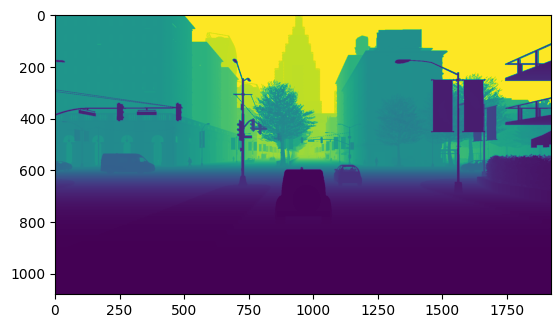

In [11]:
plt.imshow(test_depth)
plt.show()

In [56]:
adv_depth = test_depth
adv_depth = adv_depth[220:800, 250:1500]
adv_depth = cv2.resize(adv_depth, (512, 256))
adv_depth = np.clip(adv_depth, 1.0, 100.0)
adv_depth = 1 / adv_depth

In [57]:
adv_depth

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.2 , 0.2 , 0.2 , ..., 0.2 , 0.2 , 0.2 ],
       [0.2 , 0.2 , 0.2 , ..., 0.2 , 0.2 , 0.2 ],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]])

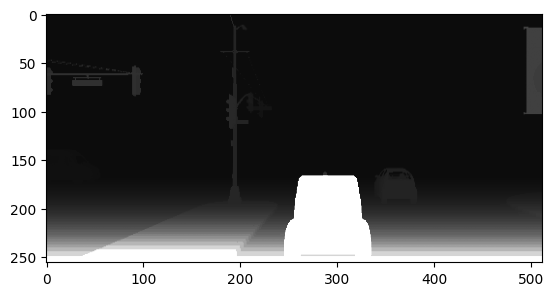

In [45]:
plt.imshow(adv_depth, cmap='gray', vmin=0, vmax=0.2)
plt.show()

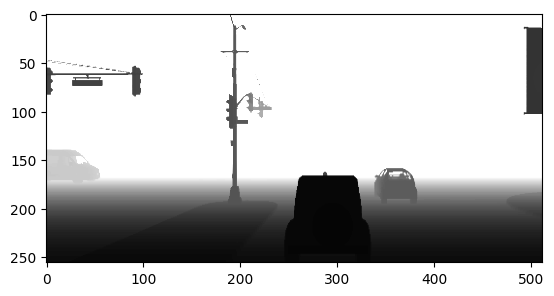

In [39]:
plt.imshow(adv_depth, cmap='gray', vmin=0, vmax=100)
plt.show()

In [29]:
mask = adv_depth > 2

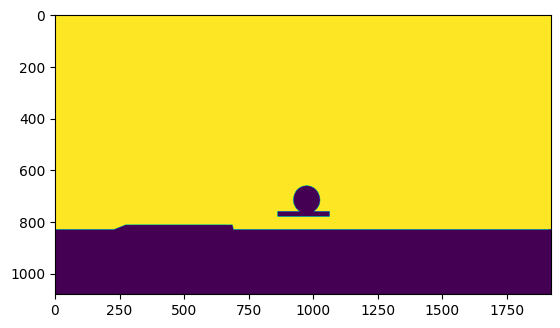

In [30]:
plt.imshow(mask)
plt.show()

In [113]:
def find_min_y_coordinate(image):
    min_y = float('inf')  # Initialize min_y to a large value

    # Iterate through the rows of the image
    for y, row in enumerate(image):
        # Iterate through the columns of the row
        for x, value in enumerate(row):
            # Check if the pixel value is 0
            if value == 0:
                # Update min_y if the current y-coordinate is lower
                min_y = min(min_y, y)

    return min_y

In [114]:
find_min_y_coordinate(mask)

880

In [136]:
adv_depth

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [51]:
def disp_to_depth(disp, min_depth, max_depth):
    min_disp = 1 / max_depth  # 0.01
    max_disp = 1 / min_depth  # 10
    scaled_disp = min_disp + (max_disp - min_disp) * disp  # (10-0.01)*disp+0.01
    depth = 1 / scaled_disp
    return scaled_disp, depth

In [65]:
disp_to_depth(adv_depth, 0.1, 100)

(array([[0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        [0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        [0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        ...,
        [2.008 , 2.008 , 2.008 , ..., 2.008 , 2.008 , 2.008 ],
        [2.008 , 2.008 , 2.008 , ..., 2.008 , 2.008 , 2.008 ],
        [2.5075, 2.5075, 2.5075, ..., 2.5075, 2.5075, 2.5075]]),
 array([[9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        [9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        [9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        ...,
        [0.49800797, 0.49800797, 0.49800797, ..., 0.49800797, 0.49800797,
         0.49800797],
        [0.49800797, 0.49800797, 0.49800797, ..., 0.49800797, 0.49800797,
         0.49800797],
        [0.39880359, 0.39880359, 0.39880359, ..., 0.39880359, 0.39880359,
         0.39880359]]))

In [48]:
test_depth

array([[133, 133, 133, ..., 255, 255, 255],
       [133, 133, 133, ..., 255, 255, 255],
       [133, 133, 133, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# Crop Image

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
img = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/rgb/1418756093820316.png")

In [83]:
class CenterCrop:
    """
    Center crop a given image
    """

    def __init__(self, *size):
        """
        Initialize
        :param width: crop width
        :param height: crop height
        """
        self.w, self.h = size

    def __call__(self, *imgs, inplace=False, unpack=True):
        """
        Process
        :param imgs: 'channel last' images to process
        :param inplace: whether to process image in place
        :param unpack:
        :return:
        """
        # assert
        assert len(imgs) > 0
        # shape
        h, w = imgs[0].shape[:2]
        # h range
        h_start = max((w - self.w) // 2, 0)
        h_end = min(h_start + self.w, w)
        # v range
        v_start = max((h - self.h) // 2, 0)
        v_end = min(v_start + self.h, h)
        # store results
        results = []
        # process others
        for img in imgs:
            # img result
            if inplace:
                img_result = img[v_start: v_end, h_start: h_end]
            else:
                img_result = img[v_start: v_end, h_start: h_end].copy()
            # append to result
            results.append(img_result)
        # handle results
        if unpack and len(results) == 1:
            results = results[0]
        # return
        return results


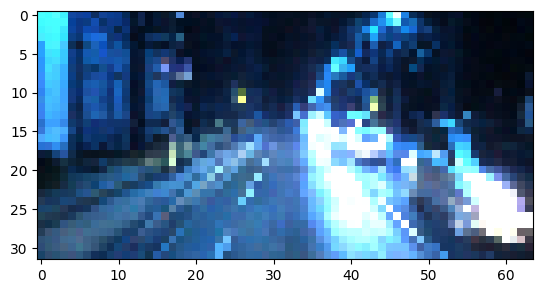

In [103]:
CROP_SIZE = (1140, 512)

crop = CenterCrop(*CROP_SIZE)
img_crop = crop(img)
img_crop = cv2.resize(img_crop, (256,128), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_crop)

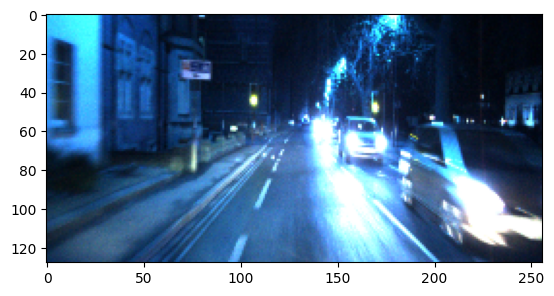

In [97]:
CROP_SIZE = (1280, 512)

crop = CenterCrop(*CROP_SIZE)
img_crop = crop(img)
img_crop = cv2.resize(img_crop, (256,128), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_crop)

# Test seed dataset

In [2]:
from datasets import build_dataset
import random
import numpy as np
import torch
from pytorch_lightning import seed_everything
from mmcv import Config
import os.path as osp
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

/home/aiteam/.virtualenvs/depth-estimation/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [11]:
seed = 1024
# configure seed
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
seed_everything(seed)


Global seed set to 1024


1024

In [14]:
random.random()

0.3894278133155098

In [9]:
# cfg = Config.fromfile(osp.join(f'configs/steps_rc.yaml'))
cfg = Config.fromfile(osp.join(f'configs/mono2_rc_day.yaml'))
cfg.test = True
cfg.seed = seed

#prepare data loader
dataset = build_dataset(cfg.dataset)
loader = DataLoader(dataset, 16, shuffle=False, num_workers=6, drop_last=False)

Root: day, Frames: [0], Augment: True, DownScale: True, Equ_Limit: 0.008.
Total items: 21302.


In [3]:
# Display a few images from the dataset
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [4]:
dataiter = iter(loader)


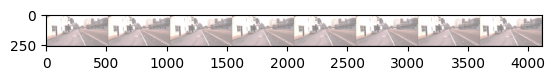

NameError: name 'stop' is not defined

In [17]:
for data in dataiter:
#     print(data['day']['color_aug', 0, 0].shape)
#     imshow(torchvision.utils.make_grid(data['day']['color_aug', 0, 0]))
    imshow(torchvision.utils.make_grid(data['color_aug', 0, 0]))
    stop

In [20]:
for data in dataiter:
#     print(data)
#     count = 0
    print(data['file_path'])
#     print(data['day']['color_aug', 0, 0])
#     imshow(torchvision.utils.make_grid(data['day']['color_aug', 0, 0]))
#     stop


['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132439921278', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440046268', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440108756', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440171244', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440233735', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440296223', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440421211', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440483701']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440546193', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440608682', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440733671

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446732966', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446795458', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446857947', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446920436', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446982924', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447045417', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447107903', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447170393']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447232882', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447295371', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447357861

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452732130', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452794619', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452857108', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452919598', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452982088', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453044577', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453107066', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453169555']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453232046', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453294537', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453357025

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458856191', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458918682', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458981172', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459043662', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459168651', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459231142', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459293632', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459356121']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459418611', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459543605', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459606092

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465480421', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465542918', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465605416', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465667904', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465730397', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465792890', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465855378', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465917874']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465980365', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466042854', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466105341

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472104378', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472166869', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472229359', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472291846', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472416837', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472479325', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472541817', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472604306']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472666795', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472729283', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472854275

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479290890', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479353382', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479478370', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479540859', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479603347', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479665839', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479728327', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479790817']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479915808', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479978296', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480040784

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486102455', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486164945', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486227435', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486352424', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486414915', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486477404', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486539897', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486602385']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486727375', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486789865', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486852355

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497601032', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497663520', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497726009', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497788499', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497850988', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497913476', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497975966', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498038454']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498100946', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498163433', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498225922

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503725157', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503787656', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503850156', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503912648', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503975144', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504037644', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504100135', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504162631']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504225124', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504287615', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504350106

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509724288', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509786785', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509849284', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509911776', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509974272', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510036773', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510099263', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510161760']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510224258', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510286748', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510349247

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523284901', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523347392', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523409891', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523534889', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523597379', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523659878', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523722378', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523784867']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523847366', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523972366', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524034855

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529409086', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529471575', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529534065', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529596555', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529659045', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529721535', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529784025', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529846517']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529909006', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529971495', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530033985

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536595538', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536658029', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536720517', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536783006', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536845496', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536970486', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537032975', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537095464']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537157954', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537282943', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537345433

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545656915', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545719404', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545781895', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545844394', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545906891', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545969383', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546031880', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546094378']
['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546156870', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546219359', '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546281849

KeyboardInterrupt: 

# Run model day net 

In [5]:
from pytorch_lightning import LightningModule
from models.registry import MODELS

In [6]:
def build_disp_net(option, check_point_path):
    # create model
    model: pytorch_lightning.LightningModule = MODELS.build(name=option.model.name, option=option)
    model.load_state_dict(torch.load(check_point_path, map_location='cpu')['state_dict'])
    model.freeze()
    model.eval()

    # return
    return model


In [7]:
device = 'cuda'

day_dispnet = build_disp_net(
    Config.fromfile('/media/aiteam/DataAI/STEPS/configs/mono2_rc_day.yaml'),
    "/media/aiteam/DataAI/STEPS/checkpoints/mono2_rc_day/checkpoint_epoch=5.ckpt"
).to(device)

In [8]:
day_dispnet.eval()
with torch.no_grad():
    for day_inputs in tqdm(dataiter):
        day_inputs['color_aug', 0, 0] = day_inputs['color_aug', 0, 0].to(device)
#         print(day_inputs['color_aug', 0, 0].shape)
        day_disp = day_dispnet(day_inputs)['disp', 0, 0]
        for disp, path in zip(day_disp, day_inputs['file_path']):
            print(path)
#             print(disp.cpu())
            torch.save(disp.cpu(), path.replace("rgb", "depth_rgb") + ".pt")
            time.sleep(0.05)

  0%|                                                                       | 0/1332 [00:00<?, ?it/s]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132439921278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440046268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440108756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440171244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440233735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440296223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440421211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440483701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440546193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132440608682_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|                                                             | 1/1332 [00:03<1:09:32,  3.13s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441046128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441108618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441171108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441233595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441358585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441421073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441483564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441546051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441671042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132441733531_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|                                                               | 2/1332 [00:04<43:38,  1.97s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442170967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442295956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442358446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442420935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442483423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442608414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442670902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442733401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442795900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132442920892_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|▏                                                              | 3/1332 [00:05<35:42,  1.61s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443420865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443545865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443608353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443670852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443733351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443858343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443920839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132443983338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444045828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444108317_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|▏                                                              | 4/1332 [00:06<31:38,  1.43s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444545782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444608274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444670770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444733269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444795760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444858257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444920751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132444983241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445045734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445108226_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|▏                                                              | 5/1332 [00:07<29:48,  1.35s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445670639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445733128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445795618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445858108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445920598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132445983088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446045578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446108070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446170559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446233049_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  0%|▎                                                              | 6/1332 [00:08<28:07,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446545499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446607987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446670476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446732966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446795458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446857947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446920436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132446982924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447045417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447107903_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▎                                                              | 7/1332 [00:10<27:28,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447545329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447607819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447670308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447732797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447795287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447857779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447920269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132447982756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448045246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448107735_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▍                                                              | 8/1332 [00:11<27:12,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448545197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448607689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448670186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448732686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448795174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448857673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448920173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132448982662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449045151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449107640_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▍                                                              | 9/1332 [00:12<26:53,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449732589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449795077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449857566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449920064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132449982557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450045047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450107537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450170023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450232513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450295004_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▍                                                             | 10/1332 [00:13<26:43,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450544961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450607452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450669939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450732429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450794920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450857407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450919897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132450982387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451044876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451107366_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▌                                                             | 11/1332 [00:14<26:24,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451544804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451607301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451669789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451732289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451794788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451857277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451919766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132451982256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452044745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452107234_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▌                                                             | 12/1332 [00:16<26:15,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452544661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452607150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452669640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452732130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452794619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452857108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452919598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132452982088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453044577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453107066_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▌                                                             | 13/1332 [00:17<26:09,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453669475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453731966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453794465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453856964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453919469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132453981944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454044433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454106924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454169417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454231913_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▋                                                             | 14/1332 [00:18<26:08,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454544391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454606880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454669370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454731862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454794350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454856841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454919330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132454981820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455044311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455106802_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▋                                                             | 15/1332 [00:19<26:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455544227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455606716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455669206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455731697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455794185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455856674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455919164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132455981656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456044143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456106632_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▋                                                             | 16/1332 [00:20<25:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456544062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456606550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456669041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456731543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456794021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456856509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456918998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132456981488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457043977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457106466_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▊                                                             | 17/1332 [00:21<25:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457543888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457606379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457668866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457731356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457793848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457856334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457918824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132457981314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458043803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458106296_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▊                                                             | 18/1332 [00:23<25:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458606222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458668714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458731203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458856191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458918682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132458981172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459043662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459168651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459231142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132459293632_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  1%|▉                                                             | 19/1332 [00:24<25:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460043541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460106042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460168532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460231023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460356010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460418501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460480992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460543480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460605970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132460668460_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|▉                                                             | 20/1332 [00:25<26:02,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461168399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461230898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461293388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461355877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461418368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461480860_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461543347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461605838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461668330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132461730818_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|▉                                                             | 21/1332 [00:26<25:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462043278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462105768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462168258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462230748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462293239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462355729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462418221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462480709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462543198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132462605689_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█                                                             | 22/1332 [00:27<25:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463043112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463105602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463168091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463293081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463355571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463418069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463480568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463543058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463605556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132463730556_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█                                                             | 23/1332 [00:29<25:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464480507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464543006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464605506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464667996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464730488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464792976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464855466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464917956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132464980455_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465042954_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█                                                             | 24/1332 [00:30<25:42,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465480421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465542918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465605416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465667904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465730397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465792890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465855378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465917874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132465980365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466042854_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▏                                                            | 25/1332 [00:31<25:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466480278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466542768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466605259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466667746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466730236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466792728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466855216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466917706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132466980194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467042683_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▏                                                            | 26/1332 [00:32<25:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467292643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467355130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467417621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467480110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467542599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467605091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467667578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467730068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467792558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132467855046_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▎                                                            | 27/1332 [00:33<25:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468292475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468354965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468417455_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468479945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468542435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468604925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468667415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468729905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468792397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132468854885_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▎                                                            | 28/1332 [00:34<25:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469292315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469354805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469417295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469479786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469542275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469604766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469667259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469729746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469792235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132469854725_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▎                                                            | 29/1332 [00:36<25:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470292152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470354640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470417130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470479620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470542123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470604599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470667091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470729577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470792070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132470854558_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▍                                                            | 30/1332 [00:37<25:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471479461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471604448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471666938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471729430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471791918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471916908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132471979398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472041888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472104378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472166869_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▍                                                            | 31/1332 [00:38<25:33,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472479325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472541817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472604306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472666795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472729283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472854275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472916764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132472979254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473041745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473104233_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▍                                                            | 32/1332 [00:39<25:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473666658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473729149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473791639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473916628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132473979118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132474041610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132474104099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132474166588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132474229078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132474354071_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  2%|█▌                                                            | 33/1332 [00:40<25:42,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475103967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475166456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475228947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475291437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475353925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475478915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475541404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475603896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475666383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132475728873_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▌                                                            | 34/1332 [00:42<25:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476291299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476353788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476416278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476478767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476603757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476666248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476728736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476791226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476853715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132476978706_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▋                                                            | 35/1332 [00:43<25:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477291163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477353652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477416142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477478633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477541121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477666112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477728600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477791092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477853579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132477978569_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▋                                                            | 36/1332 [00:44<25:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132478728471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132478790960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132478853450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132478978440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479040930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479103420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479165911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479228401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479290890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479353382_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▋                                                            | 37/1332 [00:45<25:36,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479665839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479728327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479790817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479915808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132479978296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480040784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480103271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480165763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480228252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132480353240_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▊                                                            | 38/1332 [00:46<25:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481103135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481165625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481290614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481353104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481415602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481478104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481540591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481665590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481728089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132481790579_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▊                                                            | 39/1332 [00:47<25:19,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482103037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482165525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482290517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482353005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482415503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482478002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482540492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482602990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482665488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132482727979_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▊                                                            | 40/1332 [00:49<25:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483165405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483227894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483290381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483352872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483415361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483477852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483540340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483602830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483665321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132483727811_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▉                                                            | 41/1332 [00:50<25:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484290215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484352704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484415195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484477683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484540174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484602662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484665153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484727641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484790131_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132484852620_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|█▉                                                            | 42/1332 [00:51<25:32,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485227568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485352557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485415047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485477537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485540025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485665015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485727505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485789994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485852484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132485914975_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|██                                                            | 43/1332 [00:52<25:24,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486477404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486539897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486602385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486727375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486789865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486852355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132486914846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487039835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487102325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487164815_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|██                                                            | 44/1332 [00:53<25:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487664763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487727255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487789744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487914733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132487977223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488039713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488102203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488164692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488227182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488352172_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|██                                                            | 45/1332 [00:55<25:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488914576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132488977065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489039554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489102044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489164533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489227023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489289512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489352001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489476991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132489539480_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  3%|██▏                                                           | 46/1332 [00:56<25:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490164396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490226885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490289375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490351867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490476855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490539343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490601834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490664325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490789313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132490851804_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▏                                                           | 47/1332 [00:57<25:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491351727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491476718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491539206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491601697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491664185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491789175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491851665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491914154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132491976643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132492101633_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▏                                                           | 48/1332 [00:58<25:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132492351592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132492476580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132492539070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497101074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497163575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497226072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497288565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497351062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497413558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132497476046_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▎                                                           | 49/1332 [00:59<25:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498100946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498163433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498225922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498288412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498350901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498413390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498475881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498538372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498600861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498663350_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▎                                                           | 50/1332 [01:00<25:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498913306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132498975796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499038287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499100775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499163264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499225753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499288244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499350734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499413221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132499475711_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▎                                                           | 51/1332 [01:02<27:55,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500038115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500100604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500163095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500225583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500288073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500350562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500413052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500475541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500538031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500600519_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▍                                                           | 52/1332 [01:03<27:06,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500912967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132500975459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501037947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501100437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501162927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501225417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501287907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501350397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501412887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501475377_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▍                                                           | 53/1332 [01:04<26:19,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501912807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132501975296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502037787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502100276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502162776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502225274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502287764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502350264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502412763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502475252_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▌                                                           | 54/1332 [01:06<25:52,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132502975226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503037726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503100217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503225213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503287713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503350203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503412692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503475180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503537671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132503600169_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▌                                                           | 55/1332 [01:07<26:14,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504225124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504287615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504350106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504412599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504475088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504537582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504600073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504662562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504725052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132504787541_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▌                                                           | 56/1332 [01:08<25:49,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505037511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505100001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505162488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505224979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505287469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505349957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505412447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505474939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505537424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132505599916_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▋                                                           | 57/1332 [01:09<25:14,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506037339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506099831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506162320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506224810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506287300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506349792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506412280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506474771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506537261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132506599750_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▋                                                           | 58/1332 [01:10<25:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507224645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507287136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507349624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507412114_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507474603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507537093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507599583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507662072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507724562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132507787052_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  4%|██▋                                                           | 59/1332 [01:11<25:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508224477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508286967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508349457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508411946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508474436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508536925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508599414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508661904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508724393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132508786883_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|██▊                                                           | 60/1332 [01:13<24:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509224320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509286820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509349310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509411809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509474308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509536798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509599297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509661796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509724288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132509786785_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|██▊                                                           | 61/1332 [01:14<24:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510224258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510286748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510349247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510411746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510474238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510536726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510599214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510661703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510724195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132510786692_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|██▉                                                           | 62/1332 [01:15<24:48,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511224164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511286654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511349144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511411639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511474132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511536621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511599115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511661607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511724094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132511786584_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|██▉                                                           | 63/1332 [01:16<24:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512224006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512286496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512348988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512411476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512473968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512536456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512598948_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512661439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512723926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132512786417_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|██▉                                                           | 64/1332 [01:17<24:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513036375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513098865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513161356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513223846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513286334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513348822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513411313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513473802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513536291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132513598782_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███                                                           | 65/1332 [01:18<24:48,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521535104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521597594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521660087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521722574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521785066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521910055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132521972545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522035035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522097525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522160015_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███                                                           | 66/1332 [01:20<24:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522722445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522784935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522847426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522909915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132522972415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523097414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523159903_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523222403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523284901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523347392_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███                                                           | 67/1332 [01:21<24:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523847366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132523972366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524034855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524097354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524159853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524222343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524284842_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524347341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524409832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524472322_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▏                                                          | 68/1332 [01:22<24:53,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524909786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132524972284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525034775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525097264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525159757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525222249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525284738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525347226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525409715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525472206_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▏                                                          | 69/1332 [01:23<24:04,  1.14s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525722163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525784652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525847142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525909631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132525972120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526034619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526097119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526159607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526222106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526284603_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▎                                                          | 70/1332 [01:24<24:05,  1.15s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526722034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526784524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526847016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526909503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132526971993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527034481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527096972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527159460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527221950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527284439_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▎                                                          | 71/1332 [01:25<24:18,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527721866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527784355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527846845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527909336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132527971825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528034313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528096804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528159295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528221784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528284276_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▎                                                          | 72/1332 [01:27<24:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528909169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132528971658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529034149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529096638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529159130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529221617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529284106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529346595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529409086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529471575_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  5%|███▍                                                          | 73/1332 [01:28<25:17,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529846517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529909006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132529971495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530033985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530096476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530158966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530221456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530283946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530346435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530408926_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▍                                                          | 74/1332 [01:29<25:12,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530908841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132530971330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531033820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531096309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531158799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531221289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531283779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531346269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531408759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531471250_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▍                                                          | 75/1332 [01:30<24:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531721209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531783700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531846193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132531908680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532033669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532096160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532158649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532221139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532346130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132532408620_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▌                                                          | 76/1332 [01:31<24:54,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533033530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533096020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533221011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533283500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533345990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533408480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533470970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533533460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533658451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132533720940_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▌                                                          | 77/1332 [01:33<24:51,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534033388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534158377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534220867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534283356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534345845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534408345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534470844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534595834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534658323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132534720812_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▋                                                          | 78/1332 [01:34<25:35,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535408218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535470708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535533198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535595686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535658175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535720666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535783156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535845644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535908133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132535970623_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▋                                                          | 79/1332 [01:35<25:13,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536345570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536408059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536470551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536595538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536658029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536720517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536783006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536845496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132536970486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537032975_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▋                                                          | 80/1332 [01:36<24:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537595401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537657894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537720383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537782871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537907861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132537970351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538032842_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538095334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538157823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538282812_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▊                                                          | 81/1332 [01:37<24:54,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538782742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538845232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132538970222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539032712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539095203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539157692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539220182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539282672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539407662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132539470152_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▊                                                          | 82/1332 [01:39<25:19,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540157547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540282537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540345028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540407516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540470005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540532495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540594985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540719973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540782463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132540844952_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▊                                                          | 83/1332 [01:40<25:00,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541157411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541219900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541282390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541407380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541469870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541532360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541594850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541719850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541782350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132541844838_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▉                                                          | 84/1332 [01:41<24:48,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542407313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542469812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542532302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542594801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542657300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542782290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542844789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542907288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132542969779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543032268_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|███▉                                                          | 85/1332 [01:42<24:45,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543469731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543532223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543594719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543657218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543719708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543782208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543844699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543907189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132543969682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544032174_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  6%|████                                                          | 86/1332 [01:43<24:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544469606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544532098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544594586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544657076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544719567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544782056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544844548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544907036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132544969526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545032017_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████                                                          | 87/1332 [01:45<24:35,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545469447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545531937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545594427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545656915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545719404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545781895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545844394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545906891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132545969383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546031880_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████                                                          | 88/1332 [01:46<24:25,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546469316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546531805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546594296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546656784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546719274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546781763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546844252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546906742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132546969233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547031720_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▏                                                         | 89/1332 [01:47<24:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547469146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547531638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547594125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547656615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547719104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547781595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547844084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547906576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132547969063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548031554_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▏                                                         | 90/1332 [01:48<24:27,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548468982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548531470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548593957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548656446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548718938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548781427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548843916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548906405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132548968895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549031385_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▏                                                         | 91/1332 [01:49<24:26,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549468811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549531300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549593790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549656281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549718768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549781258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549843749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549906237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132549968727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550031216_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▎                                                         | 92/1332 [01:51<24:20,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550468643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550531132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550593622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550656113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550718601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550781090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550906080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132550968572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551031060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551093550_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▎                                                         | 93/1332 [01:52<24:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551655980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551718472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551780960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551905950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132551968440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552030930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552093420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552155910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552280900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552343390_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▍                                                         | 94/1332 [01:53<24:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552843318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552905811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132552968297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553030790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553155777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553218268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553280755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553343248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553405735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132553468225_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▍                                                         | 95/1332 [01:54<24:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554030655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554093146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554155635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554280625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554343116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554405605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554468097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554530587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554655576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132554718068_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▍                                                         | 96/1332 [01:55<24:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605336128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605398617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605523607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605586098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605648588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605711075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605773565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605898556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132605961046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606023534_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▌                                                         | 97/1332 [01:56<24:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606585961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606648452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606710939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606773431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606898421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132606960907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607023397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607085888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607210877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607273365_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▌                                                         | 98/1332 [01:58<27:38,  1.34s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607898281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132607960772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608023261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608085752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608210739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608273229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608335720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608398209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608460700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132608585689_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  7%|████▌                                                         | 99/1332 [01:59<26:41,  1.30s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609085614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609210603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609273092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609335581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609398071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609460561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609585551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609648043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609710531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132609773022_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▌                                                        | 100/1332 [02:01<26:00,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610397941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610522931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610585422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610647913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610710402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610772891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610835379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132610960369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611022859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611085347_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▋                                                        | 101/1332 [02:02<25:26,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611647784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611710282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611835282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611897772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132611960270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612022769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612147760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612210248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612272739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612335229_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▋                                                        | 102/1332 [02:03<24:51,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612647684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612710176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612772663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612835153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612897644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132612960134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613022621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613085110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613147602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613210091_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▋                                                        | 103/1332 [02:04<24:33,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613647520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613710010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613772501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613834991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613897480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132613959971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614022461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614084950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614147440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614209929_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▊                                                        | 104/1332 [02:05<25:00,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614647354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614772342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614834831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614897322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132614959810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615022300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615147289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615209778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615272268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615334761_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▊                                                        | 105/1332 [02:06<24:46,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615897185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132615959675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616022165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616147154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616209643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616272133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616334623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616459613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616522101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132616584591_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▊                                                        | 106/1332 [02:08<24:29,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617147017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617209507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617271999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617334491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617396978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617521968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617584457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617646949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617709438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132617834429_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▉                                                        | 107/1332 [02:09<24:36,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618334354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618396844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618521833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618584325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618646813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618709301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618771791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618834288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132618896787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619021778_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▉                                                        | 108/1332 [02:10<24:28,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619521752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619584250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619709241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619771738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619834240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132619959229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620021726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620084225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620146714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620209203_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|████▉                                                        | 109/1332 [02:11<24:20,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620646670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620709170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620771666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620834157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620896654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132620959148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621021637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621084127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621146623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621209113_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|█████                                                        | 110/1332 [02:12<24:12,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621646539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621709029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621771519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621834008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621896497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132621958986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622021490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622083964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622146457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622208944_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|█████                                                        | 111/1332 [02:14<23:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622646375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622708865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622771355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622833845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622896335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132622958825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623021316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623083806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623146296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623208800_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|█████▏                                                       | 112/1332 [02:15<23:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623646215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623708704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623771196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623833685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623896173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132623958661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624021152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624083641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624146130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624208623_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  8%|█████▏                                                       | 113/1332 [02:16<23:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624646085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624708584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624771082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624833572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624896061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132624958551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625021040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625083530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625146020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625208508_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▏                                                       | 114/1332 [02:17<23:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625645973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625708465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625770952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625833442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625895932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132625958422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626020912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626083402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626145891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626208381_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▎                                                       | 115/1332 [02:18<23:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626645810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626708300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626770790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626833280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626895770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132626958260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627020750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627083240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627145730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627208220_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▎                                                       | 116/1332 [02:19<23:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627645650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627708140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627770630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627833120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627895610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132627958100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628020590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628083082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628145572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628208060_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▎                                                       | 117/1332 [02:21<23:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628645490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628707980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628770470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628832960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628895450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132628957943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629020430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629082920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629145410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629207900_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▍                                                       | 118/1332 [02:22<23:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629645328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629707818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629770308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629832796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629895286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132629957777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630020265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630082766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630145264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630207753_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▍                                                       | 119/1332 [02:23<23:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630832717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132630957708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631020198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631082688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631145178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631207669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631270157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631332648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631395139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631457637_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▍                                                       | 120/1332 [02:24<23:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132631957604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632020100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632082599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632145089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632207587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632270087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632332577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632395076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632457574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632520065_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▌                                                       | 121/1332 [02:25<23:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632770028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632832519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632895008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132632957511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633019989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633082479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633144967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633207459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633269947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633332434_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▌                                                       | 122/1332 [02:27<23:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633894840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132633957332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634019833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634082310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634144800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634207290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634269780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634332270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634394761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634457251_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▋                                                       | 123/1332 [02:28<23:59,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634769698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634832188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634894676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132634957168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635019655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635082145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635144635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635207134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635269633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635332124_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▋                                                       | 124/1332 [02:29<23:48,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635769598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635832097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635894587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132635957077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636019567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636082058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636144547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636207037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636269527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636332017_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▋                                                       | 125/1332 [02:30<23:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636769445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636831935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636894424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636956914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637019404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637081894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637144382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637206871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637269360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637331852_augment
/media/aiteam/DataAI/depth_datasets/oxfo

  9%|█████▊                                                       | 126/1332 [02:31<23:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637769276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637831766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637894255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132637956745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638019234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638081724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638144214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638206703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638269192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638331685_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|█████▊                                                       | 127/1332 [02:32<23:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132638956615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639019105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639081604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639144103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639206593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639269092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639331592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639394081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639456580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639519079_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|█████▊                                                       | 128/1332 [02:34<23:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132639956527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640019018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640081507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640143997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640206488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640268977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640331467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640393957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640456447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640518939_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|█████▉                                                       | 129/1332 [02:35<23:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640768895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640831385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640893874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132640956364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641018854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641081346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641143834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641206322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641268814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641331303_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|█████▉                                                       | 130/1332 [02:36<25:46,  1.29s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641893706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132641956196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642018687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642081176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642143665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642206154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642268644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642331133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642393622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642456112_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|█████▉                                                       | 131/1332 [02:38<25:13,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642768560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642831049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642893539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132642956030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643018518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643081007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643143496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643205986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643268475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643330965_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████                                                       | 132/1332 [02:39<24:37,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643768391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643830881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643893370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132643955859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644018349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644080838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644143328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644205817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644268307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644330796_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████                                                       | 133/1332 [02:40<24:20,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644830725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132644955714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645018205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645080694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645143185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645268174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645330664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645393154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645455644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132645580634_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▏                                                      | 134/1332 [02:41<24:12,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646268062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646393060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646455553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646518050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646580549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646643041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646705537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646830536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646893026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132646955526_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▏                                                      | 135/1332 [02:42<23:55,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647455492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647517990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647580480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647642980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647705479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647767968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647830468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647892965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132647955453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648017948_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▏                                                      | 136/1332 [02:43<23:50,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648267914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648330401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648392893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648455381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648517873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648580360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648642851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648705340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648767830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132648830320_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▎                                                      | 137/1332 [02:45<23:36,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649267746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649330237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649392724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649455213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649517705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649580193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649642685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649705174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649767662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132649830151_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▎                                                      | 138/1332 [02:46<23:20,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650267577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650330064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650392554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650455043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650517535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650580024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650642514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650705001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650767492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132650829980_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 10%|██████▎                                                      | 139/1332 [02:47<23:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651267407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651329897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651392385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651454878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651517366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651579853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651642345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651704832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651767322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132651829811_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▍                                                      | 140/1332 [02:48<23:17,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652267243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652329731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652392221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652454712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652517201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652579691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652642181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652704670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652767160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132652829649_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▍                                                      | 141/1332 [02:49<23:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653267106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653329605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653392096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653517094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653579594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653642084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653704584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653767084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653892072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132653954570_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▌                                                      | 142/1332 [02:50<23:15,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654392044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654454535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654517025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654579512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654642001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654704493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654766981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654829470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654891960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132654954449_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▌                                                      | 143/1332 [02:52<23:13,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655391876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655454365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655516854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655579344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655641834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655704323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655766812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655829302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655891792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132655954282_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▌                                                      | 144/1332 [02:53<23:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656579184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656641683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656704180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656766670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656829169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656891668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132656954157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657016658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657079156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657141644_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▋                                                      | 145/1332 [02:54<23:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657391631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657454131_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657516620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657579111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657641601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657704089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657766580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657829067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657891566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132657954066_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▋                                                      | 146/1332 [02:55<23:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658391526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658454017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658516512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658579004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658641493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658703981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658766471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658828964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658891452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132658953943_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▋                                                      | 147/1332 [02:56<23:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659391389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659453879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659516375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659578867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659641358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659703845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659766337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659828827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659891315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132659953807_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▊                                                      | 148/1332 [02:57<23:05,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660391235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660453725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660516215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660578707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660641197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660703687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660766176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660828666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660891156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132660953646_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▊                                                      | 149/1332 [02:59<23:04,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661391073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661453563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661516052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661578541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661641031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661703519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661766009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661828498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661890988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132661953477_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▊                                                      | 150/1332 [03:00<23:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662578370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662640860_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662703349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662765838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662828328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662890821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132662953307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663015798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663078287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663140775_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▉                                                      | 151/1332 [03:01<23:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663390735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663453223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663515712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663578202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663640691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663703180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663765670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663828162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663890651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132663953138_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|██████▉                                                      | 152/1332 [03:02<23:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664390566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664453054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664515542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664578032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664640522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664703013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664765500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664827993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132664890482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665015482_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 11%|███████                                                      | 153/1332 [03:03<23:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665515399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665640389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665702879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665765370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665827859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132665952849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666015339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666077829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666140319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666202809_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████                                                      | 154/1332 [03:05<23:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666765239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666827729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666890220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132666952709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667015200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667140189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667202680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667265170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667327661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132667390150_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████                                                      | 155/1332 [03:06<23:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668140049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668202539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668265029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668327519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668390009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668515000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668577489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668639979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668702469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132668764962_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▏                                                     | 156/1332 [03:07<23:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669202397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669327395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669389893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669452382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669514882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669577380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669639870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669764869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669827369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132669889858_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▏                                                     | 157/1332 [03:08<23:17,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670452302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670514792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670577281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670639771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670702260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670764759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670827258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670889761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132670952247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671014745_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▏                                                     | 158/1332 [03:09<23:27,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671452210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671514710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671577209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671639714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671702189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671764688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671827186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671889676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132671952176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672014667_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▎                                                     | 159/1332 [03:11<23:16,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672514579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672577069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672639560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672702048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672764539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672827027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672889517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132672952006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673014496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673076985_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▎                                                     | 160/1332 [03:12<23:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673514411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673576901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673639393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673701880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673764371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673826859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673889349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132673951839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674014329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674076819_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▎                                                     | 161/1332 [03:13<23:29,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674451758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674514247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674576738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674639227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674701716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674764207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674826695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674889184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132674951674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675014177_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▍                                                     | 162/1332 [03:14<23:19,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675326613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675389101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675451593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675514082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675576571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675639057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675701547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675764039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675826526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132675889016_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▍                                                     | 163/1332 [03:15<23:11,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676513911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676576400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676638904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676701380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676763871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676826359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676888851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132676951340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677013830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677076320_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▌                                                     | 164/1332 [03:16<23:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677638747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677701238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677763726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677888715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132677951205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678013697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678076184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678138674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678201163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678263652_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▌                                                     | 165/1332 [03:18<22:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678576110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678701101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678763592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678826079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678888567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132678951057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132679076046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132679138536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132679201035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132679263534_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 12%|███████▌                                                     | 166/1332 [03:19<22:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680075930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680138419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680200910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680325898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680388388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680450878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680513365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680575863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680638363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680700854_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▋                                                     | 167/1332 [03:20<22:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132680950839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681013338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681075830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681138327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681263326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681325818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681388306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681450798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681575789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132681638276_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▋                                                     | 168/1332 [03:21<22:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682075705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682138194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682200681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682263183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682325680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682388171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682450667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682513167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682575655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132682638145_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▋                                                     | 169/1332 [03:22<22:38,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683263040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683325531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683388020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683450510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683512998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683575489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683637976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683700465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683762955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132683825444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▊                                                     | 170/1332 [03:24<22:53,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684200383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684262872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684325361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684387850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684450339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684512828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684575318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684637808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684700298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132684762788_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▊                                                     | 171/1332 [03:25<22:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685075239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685137726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685200216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685262707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685325196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685387686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685450176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685575166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685637656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132685700149_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▉                                                     | 172/1332 [03:26<23:00,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686200076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686325066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686387557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686450047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686512540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686575026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686637516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686762508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686824998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132686887487_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▉                                                     | 173/1332 [03:27<23:04,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687512396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687637388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687699877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687762367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687824855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687887344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132687949835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688074824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688137315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688199802_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|███████▉                                                     | 174/1332 [03:28<22:59,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688762222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688824712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132688949702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689012193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689074683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689137171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689262159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689324649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689387138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689449628_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|████████                                                     | 175/1332 [03:29<22:49,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689762086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689824575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132689887065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690012055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690074544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690137033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690199524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690262013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690387003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132690449492_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|████████                                                     | 176/1332 [03:31<22:50,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691199395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691324394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691386883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691449383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691511882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691574370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691699369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691761869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691824359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132691886858_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|████████                                                     | 177/1332 [03:32<22:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692199345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692261834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692386834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692449333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692511825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692574322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692636821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692699313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692761809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132692824309_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|████████▏                                                    | 178/1332 [03:33<22:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693261759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693324254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693386745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693449233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693511722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693574211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693636703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693699192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693761680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132693824169_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 13%|████████▏                                                    | 179/1332 [03:34<22:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694261595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694324085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694386574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694449064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694511554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694574043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694636533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694699021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694761513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132694824001_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▏                                                    | 180/1332 [03:35<22:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695448901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695511392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695573880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695636372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695698869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695761370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695823858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695886356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132695948855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696011344_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▎                                                    | 181/1332 [03:37<22:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696386321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696448813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696511302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696573791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696636289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696698789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696761279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696823776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696886267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132696948754_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▎                                                    | 182/1332 [03:38<22:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697261203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697323694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697386186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697448683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697511182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697573672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697636164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697698656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697761144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132697823634_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▍                                                    | 183/1332 [03:39<23:42,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698323569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698386056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698448546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698511038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698573526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698636015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698698506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698760996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698823484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132698885972_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▍                                                    | 184/1332 [03:40<23:12,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699448377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699510868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699573356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699635845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699698335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699760824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699823314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699885803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132699948295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700010791_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▍                                                    | 185/1332 [03:41<23:09,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700448265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700510755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700573254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700635753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700698242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700760734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700823229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700885720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132700948209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701010697_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▌                                                    | 186/1332 [03:43<22:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701260658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701323146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701385637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701448126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701510615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701573103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701635595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701698082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701760573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132701823063_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▌                                                    | 187/1332 [03:44<22:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702447963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702510451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702572939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702635429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702697921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702760411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702822898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702885390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132702947879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703010368_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▌                                                    | 188/1332 [03:45<22:45,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703447800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703510288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703572779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703635269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703697759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703760249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703822740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703885229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132703947718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704010208_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▋                                                    | 189/1332 [03:46<22:46,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704447638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704510128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704572619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704635109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704697598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704760086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704822576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704885067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132704947554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705010045_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▋                                                    | 190/1332 [03:47<22:44,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705260001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705322490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705384980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705447470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705509959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705572450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705634947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705697447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705759936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132705822438_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▋                                                    | 191/1332 [03:49<22:35,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706447339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706572328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706634818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706697307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706759798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706822295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706884794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132706947284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707009776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707072265_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▊                                                    | 192/1332 [03:50<22:35,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707509693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707572184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707634674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707697164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707759653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707822143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707884632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132707947122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708009612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708072101_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 14%|████████▊                                                    | 193/1332 [03:51<22:30,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708322060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708384550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708447039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708509528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708572018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708634508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708696999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708759490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708884478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132708946968_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|████████▉                                                    | 194/1332 [03:52<22:42,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709571888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709634378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709696871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709759359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709821848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132709946836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710009325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710071815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710134306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710196796_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|████████▉                                                    | 195/1332 [03:53<22:33,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710634233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710696722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710821711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710884201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132710946690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132711009179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132711071669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132711196658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132711259159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132711321656_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|████████▉                                                    | 196/1332 [03:55<22:21,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712071610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712196608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712259105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712321598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712384096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712446595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712509087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712571582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712634081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712696571_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████                                                    | 197/1332 [03:56<22:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132712946549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713009040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713071539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713134038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713196528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713259026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713321521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713384010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713446498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132713508995_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████                                                    | 198/1332 [03:57<22:25,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714133893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714196380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714258873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714321361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714383851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714446341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714508831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714571321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714633812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132714696301_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████                                                    | 199/1332 [03:59<25:50,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715071259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715133752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715196254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715258730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715321220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715383709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715446200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715508689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715571182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715633671_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▏                                                   | 200/1332 [04:00<24:53,  1.32s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132715946119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716008609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716071100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716133589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716196079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716258569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716321059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716383549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716446040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132716508530_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▏                                                   | 201/1332 [04:01<24:01,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717133484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717195974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717258473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717320971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717383461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717445952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717508441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717570931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717633422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132717695911_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▎                                                   | 202/1332 [04:02<23:29,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718133342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718195832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718258325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718320812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718383303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718445792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718508283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718570773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718633262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718695753_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▎                                                   | 203/1332 [04:03<23:09,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132718945713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719008204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719070693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719133184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719195673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719258164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719320654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719383143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719445635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132719508123_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▎                                                   | 204/1332 [04:05<22:56,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720133025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720195515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720258005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720320497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720382985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720445475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720507965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720570456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720632945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132720695436_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▍                                                   | 205/1332 [04:06<22:35,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721132866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721195358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721257846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721320339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721382825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721445315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721507804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721570294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721632783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132721695273_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 15%|█████████▍                                                   | 206/1332 [04:07<22:26,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722132699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722195189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722257678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722320168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722382657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722445148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722507640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722570128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722632617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132722695108_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▍                                                   | 207/1332 [04:08<22:25,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723132538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723195028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723257518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723320008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723382498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723444988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723507478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723632468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723694958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132723757448_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▌                                                   | 208/1332 [04:09<22:21,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724069905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724132396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724194885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724257374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724319863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724382353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724507343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724569833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724632325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132724694813_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▌                                                   | 209/1332 [04:11<22:16,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725257241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725319732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725382221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725444713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725507201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725632191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725694682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725757172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725819659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132725882149_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▌                                                   | 210/1332 [04:12<22:14,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132726632043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132726694532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132726819522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132726882010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132726944500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727006990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727131979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727194468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727256968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727319467_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▋                                                   | 211/1332 [04:13<22:08,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727819422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727881912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132727944401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728069391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728131881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728194370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728256859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728319351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728444339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728506829_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▋                                                   | 212/1332 [04:14<22:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132728944260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729006750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729069240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729131730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729194222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729256711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729319200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729381690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729444180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729506670_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▊                                                   | 213/1332 [04:15<22:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729819120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729881612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132729944100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730006592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730069083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730194072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730256561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730319051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730381541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132730444031_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▊                                                   | 214/1332 [04:16<21:59,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731193932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731256423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731318911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731381402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731506391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731568882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731631372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731693861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731756353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132731818841_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▊                                                   | 215/1332 [04:18<22:05,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732381317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732443816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732506307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732568804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732631303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732693793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732818792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732881291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132732943783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733006280_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▉                                                   | 216/1332 [04:19<22:02,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733443717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733506207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733568694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733631184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733693674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733756163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733818652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733881141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132733943632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734006121_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▉                                                   | 217/1332 [04:20<22:04,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734443548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734506039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734568526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734631016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734693505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734755994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734818484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734880974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132734943463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735005953_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|█████████▉                                                   | 218/1332 [04:21<22:05,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735443400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735505889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735568388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735630887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735693377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735755877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735818376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735880865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132735943364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736005863_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 16%|██████████                                                   | 219/1332 [04:22<21:57,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736255839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736318340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736380838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736443326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736505817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736568308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736630804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736693303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736755794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132736818291_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████                                                   | 220/1332 [04:24<21:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737443218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737505708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737568200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737630688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737693180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737755671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737818157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737880648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132737943137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738005628_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████                                                   | 221/1332 [04:25<21:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738255587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738318077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738380569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738443057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738505547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738568038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738630528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738693019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738755507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132738817996_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▏                                                  | 222/1332 [04:26<21:49,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739255426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739317916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739380406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739442896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739505386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739567876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739630366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739692856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739755346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132739817836_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▏                                                  | 223/1332 [04:27<21:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740255268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740317757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740380246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740442736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740505226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740567716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740630206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740692696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740755185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132740817675_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▎                                                  | 224/1332 [04:28<21:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741255108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741317595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741380086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741442576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741505067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741567555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741630045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741692535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741755026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132741817515_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▎                                                  | 225/1332 [04:29<21:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742442447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742504945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742567444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742629934_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742692433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742754931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742817421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742879920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132742942419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743004911_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▎                                                  | 226/1332 [04:31<21:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743254885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743317376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743379865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743442363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743504862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743567354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743629851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743692349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743754838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132743817338_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▍                                                  | 227/1332 [04:32<21:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744254794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744317282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744379776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744442268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744504756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744567244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744629733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744692223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744754716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132744817202_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▍                                                  | 228/1332 [04:33<21:43,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745254626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745317116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745379606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745442095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745504585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745567073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745629562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745692052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745754542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132745817045_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▍                                                  | 229/1332 [04:34<21:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746379435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746441924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746504416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746566903_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746629393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746691882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746754388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746816861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746879352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132746941842_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▌                                                  | 230/1332 [04:35<21:48,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747441761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747504251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747566741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747629231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747691721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747754212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747816702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747879192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132747941682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748004171_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▌                                                  | 231/1332 [04:37<21:46,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748441598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748504089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748566577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748629068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748691559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748754045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748816536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748879026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132748941515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749004005_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▌                                                  | 232/1332 [04:38<21:47,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749441428_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749503917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749566407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749691398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749753887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749816376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132749878865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750003855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750066343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750128834_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 17%|██████████▋                                                  | 233/1332 [04:39<21:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750691306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750753805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750816295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132750941294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751003793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751066282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751128781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751253780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751316271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751378769_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▋                                                  | 234/1332 [04:40<21:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751816227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751878726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132751941225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752003714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752066213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752128713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752191206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752253701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752316193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752378681_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▊                                                  | 235/1332 [04:42<26:07,  1.43s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752753623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752816111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752878601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132752941090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753003582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753066070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753128561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753191050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753253539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753316026_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▊                                                  | 236/1332 [04:43<24:50,  1.36s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753628474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753690963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753753453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753815943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753878430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132753940920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754003409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754065898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754128388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754190877_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▊                                                  | 237/1332 [04:45<23:52,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754753284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754815773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754878262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132754940752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755003242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755065731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755128221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755190713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755253200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755315689_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▉                                                  | 238/1332 [04:46<23:16,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755753116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755815604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755878096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132755940586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756003074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756065565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756128057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756190545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756253037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756315525_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▉                                                  | 239/1332 [04:47<23:24,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756815446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756877939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132756940425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757002914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757065404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757127894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757190382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757252871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757315361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757377852_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|██████████▉                                                  | 240/1332 [04:48<22:35,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757627809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757752797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757815287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757877777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132757940266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758002756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758127746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758190235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758252724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758315214_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████                                                  | 241/1332 [04:49<22:19,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758877654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132758940130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759002624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759127609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759190099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759252588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759315077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759440067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759502556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132759565047_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████                                                  | 242/1332 [04:51<22:06,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760314946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760377437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760502426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760564913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760627405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760689892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760814884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760877371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132760939862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761002350_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████▏                                                 | 243/1332 [04:52<21:53,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761564776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761627268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761689756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761752244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761814734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132761939723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762002214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762064702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762127193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762252180_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████▏                                                 | 244/1332 [04:53<21:39,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762752106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762877098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132762939589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763002075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763064580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763127057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763252044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763314534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763377023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763502012_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████▏                                                 | 245/1332 [04:54<21:43,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132763939452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764001939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764064428_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764189419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764251908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764314398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764376890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764439377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764564366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132764626855_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 18%|███████████▎                                                 | 246/1332 [04:55<21:39,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765126782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765251772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765314262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765376753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765439242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765564233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765626723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765689216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765751703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132765876693_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▎                                                 | 247/1332 [04:56<21:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766439115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766501604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766626594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766689084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766751574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766814064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766876556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132766939045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767064034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767126526_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▎                                                 | 248/1332 [04:58<21:20,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767626455_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767688944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767751435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767813926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132767938914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768001406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768063894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768126382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768188873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768251361_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▍                                                 | 249/1332 [04:59<21:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768688800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768813787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768876279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132768938767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769001257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769063746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769126237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769251225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769313715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132769376204_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▍                                                 | 250/1332 [05:00<21:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770001148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770063646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770126135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770251135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770313634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770376123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770438622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770563621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770626111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132770688610_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▍                                                 | 251/1332 [05:01<21:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771001098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771063587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771126076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771188566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771251065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771313564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771376054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771438553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771501053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132771563542_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▌                                                 | 252/1332 [05:02<21:08,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772188472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772250962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772313454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772375952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772438444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772500932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772563419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772625909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772688401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132772750888_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▌                                                 | 253/1332 [05:03<21:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773000846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773063337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773125826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773188316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773250805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773313296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773375801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773438276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773500768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132773563258_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▋                                                 | 254/1332 [05:05<21:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774000682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774063172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774125662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774188153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774250642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774313132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774375622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774438113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774500602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132774563091_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▋                                                 | 255/1332 [05:06<21:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775187987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775250478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775312967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775375456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775437947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775500437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775562927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775625418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775687907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132775750406_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▋                                                 | 256/1332 [05:07<21:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776000393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776062883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776125382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776187882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776250371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776312870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776375369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776437873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776500359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132776562857_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▊                                                 | 257/1332 [05:08<20:56,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777000287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777062780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777125268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777187757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777250248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777312737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777375227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777437717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777500209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132777562697_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▊                                                 | 258/1332 [05:09<21:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778187598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778250088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778312579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778375068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778437558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778500046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778562536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778625026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778687516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132778750007_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 19%|███████████▊                                                 | 259/1332 [05:11<21:01,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779187439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779249927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779312417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779374907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779437398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779499896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779562395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779624885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779687385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132779749883_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|███████████▉                                                 | 260/1332 [05:12<21:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780187331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780249821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780312312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780374803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780437292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780499781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780562272_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780624763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780687250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132780749741_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|███████████▉                                                 | 261/1332 [05:13<23:33,  1.32s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781124682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781187172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781249662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781312159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781374657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781437147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781499646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781562145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781624636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132781687134_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|███████████▉                                                 | 262/1332 [05:15<22:38,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782187097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782249597_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782312093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782374584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782437076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782499569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782562057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782624547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782687035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132782749526_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████                                                 | 263/1332 [05:16<22:07,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783186954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783249442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783311932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783374423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783436913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783499402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783561893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783624385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783686875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132783749365_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████                                                 | 264/1332 [05:17<21:47,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784186793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784249283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784311775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784374263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784436753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784499241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784561732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784624218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784686723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132784749199_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▏                                                | 265/1332 [05:18<21:43,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785186625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785249123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785311622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785374115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785436612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785499110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785561599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785624099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785686598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132785749089_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▏                                                | 266/1332 [05:19<21:49,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786124062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786186552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786249052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786311548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786374037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786436530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786499020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786561512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786624005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132786686497_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▏                                                | 267/1332 [05:21<21:28,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787186414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787248905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787311394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787373885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787436375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787498865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787561355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787623847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787686335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787748825_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▎                                                | 268/1332 [05:22<21:17,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132787998784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788061273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788123763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788186254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788248742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788311233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788373722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788436212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788498703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132788561191_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▎                                                | 269/1332 [05:23<21:06,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789186098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789248598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789311087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789373586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789436085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789498575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789561074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789623573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789686064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132789748563_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▎                                                | 270/1332 [05:24<21:15,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790186018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790248510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790311000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790373489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790435976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790498465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790560955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790623445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790685937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790748424_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▍                                                | 271/1332 [05:25<20:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132790998382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791060871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791123361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791185850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791248339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791310831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791373319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791435808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791498299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791560787_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▍                                                | 272/1332 [05:26<20:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132791998217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792060706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792123195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792185689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792248175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792310664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792373155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792435643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792498132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132792560622_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 20%|████████████▌                                                | 273/1332 [05:28<20:56,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793185519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793248006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793310495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793372986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793435475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793497965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793560454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793622942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793685431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793747921_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▌                                                | 274/1332 [05:29<20:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132793997880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794060368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794122859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794185349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794247840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794310328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794372817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794435307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794497797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132794560288_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▌                                                | 275/1332 [05:30<20:42,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795185240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795247740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795310239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795435231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795497727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795560227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795622716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795685216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795747715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132795810204_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▋                                                | 276/1332 [05:31<20:42,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796247671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796310161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796372659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796435158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796497648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796560148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796622640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796685129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796747622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132796810114_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▋                                                | 277/1332 [05:32<20:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797247547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797310037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797372529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797435025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797497520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797560006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797622503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797684995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797747484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132797809971_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▋                                                | 278/1332 [05:34<20:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798059928_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798122418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798184907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798247397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798309887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798372376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798434866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798497355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798559845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132798622337_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▊                                                | 279/1332 [05:35<20:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799247236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799309725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799372213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799434703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799497192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799559683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799622171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799684661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799747150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132799809648_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▊                                                | 280/1332 [05:36<20:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800059635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800122126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800184623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800247123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800309612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800372111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800434610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800497099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800559589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132800622078_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▊                                                | 281/1332 [05:37<20:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801059505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801121995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801184483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801246974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801309462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801371955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801434441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801496932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801559420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132801621910_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▉                                                | 282/1332 [05:38<20:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802246816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802309315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802371805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802434305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802496804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802559295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802621793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802684291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802746782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132802809271_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|████████████▉                                                | 283/1332 [05:39<20:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803246701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803309189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803371678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803434168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803496658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803559147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803621636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803684128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803746625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132803809124_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|█████████████                                                | 284/1332 [05:41<20:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804059101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804121599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804184099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804246589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804309087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804371581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804434069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804496558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804559055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132804621547_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|█████████████                                                | 285/1332 [05:42<20:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805246461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805308950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805371445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805433935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805496423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805558912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805621402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805683891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805746383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132805808872_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 21%|█████████████                                                | 286/1332 [05:43<20:39,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806246323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806308810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806371300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806433789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806496292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806558769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806621258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806683750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806746238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132806808728_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▏                                               | 287/1332 [05:44<20:45,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807246159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807308646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807371136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807433624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807496117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807558606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807621093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807683582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807746072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132807808564_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▏                                               | 288/1332 [05:45<20:51,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808058520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808121018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808183518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808246007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808308507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808371005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808433495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808495994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808558493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132808620982_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▏                                               | 289/1332 [05:47<20:44,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809245876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809308366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809370855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809433345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809495836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809558324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809620813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809683303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809745792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132809808282_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▎                                               | 290/1332 [05:48<20:38,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810058239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810120728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810183218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810245707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810308201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810370688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810433178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810495667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810558158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132810620657_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▎                                               | 291/1332 [05:49<20:36,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811058132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811120623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811183122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811245620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811308110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811370603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811433089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811495579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811558070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132811620561_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▎                                               | 292/1332 [05:50<20:46,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812245460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812307950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812370440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812432930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812495421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812557911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812620401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812682891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812745381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132812807880_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▍                                               | 293/1332 [05:51<20:38,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132813057867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132813120357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132813182855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132813245355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132813307848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132814870101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132814932591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132814995082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815057571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815120063_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▍                                               | 294/1332 [05:53<20:25,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815557492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815619982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815682475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815744962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815807452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815869941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815932432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132815994922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816057411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816119902_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▌                                               | 295/1332 [05:54<20:23,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816557327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816619817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816682305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816744794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816807284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816869776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816932263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132816994753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817057244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817119731_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▌                                               | 296/1332 [05:55<20:29,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817744693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817807192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817869682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817932181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132817994679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818057169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818119672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818182148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818244637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818307127_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▌                                               | 297/1332 [05:56<20:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818557104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818619593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818682093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818744591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818807083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818869580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818932079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132818994568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819057067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819119566_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▋                                               | 298/1332 [05:57<20:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819557005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819619498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819681989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819744478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819806972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819869464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819931951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132819994447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820056939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820119427_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 22%|█████████████▋                                               | 299/1332 [05:59<21:37,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820556861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820619349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820681839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820744329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820806817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820869306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820931796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132820994285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821056774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821119264_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▋                                               | 300/1332 [06:00<21:14,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821556693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821619180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821681669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821744159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821806651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821869138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821931627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132821994118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822056606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822119095_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▊                                               | 301/1332 [06:01<21:06,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822744011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822806500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822868988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822931478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132822993968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823056458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823118949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823181446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823243946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823306436_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▊                                               | 302/1332 [06:02<20:39,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823556421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823618920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823681411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823743908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823806408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823868898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823931396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132823993895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824056384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824118875_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▉                                               | 303/1332 [06:03<20:31,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824556319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824618811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824681301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824743789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824806281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824868768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824931259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132824993749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825056241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825118729_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▉                                               | 304/1332 [06:05<20:26,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825743630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825806120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825868610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825931101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132825993592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826056080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826118568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826181059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826243547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826306036_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|█████████████▉                                               | 305/1332 [06:06<20:27,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826555995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826618482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826680973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826743463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826805950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826868440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826930929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132826993419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827055910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827118398_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████                                               | 306/1332 [06:07<20:25,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827743294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827805782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827868272_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827930762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132827993252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828055743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828118240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828180739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828243229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828305728_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████                                               | 307/1332 [06:08<20:20,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828555715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828618205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828680704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828743203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828805695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828868192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828930691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132828993181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829055679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829118180_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████                                               | 308/1332 [06:09<20:15,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829555623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829618113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829680604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829743094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829805583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829868074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829930562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132829993052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830055541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830118031_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████▏                                              | 309/1332 [06:10<20:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830555461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830617951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830680443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830742930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830805419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830867909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830930400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132830992890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132831055379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132831117868_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████▏                                              | 310/1332 [06:12<20:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132831555297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132831617787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132831680277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857239205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857364197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857426685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857489175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857551665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857676656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132857739147_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████▏                                              | 311/1332 [06:13<20:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858239076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858301568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858364056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858489046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858551536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858614026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858676516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858739008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858801497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132858926486_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████▎                                              | 312/1332 [06:14<19:56,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859426418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859488908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859551398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859613888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859676378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859801369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859863858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859926347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132859988837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132860051328_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 23%|██████████████▎                                              | 313/1332 [06:15<19:58,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132860801224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132860863714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132860926204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132860988693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861113682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861176172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861238662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861301151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861363641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861426130_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▍                                              | 314/1332 [06:16<20:01,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861738588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861801077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861926067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132861988557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862051046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862113539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862238526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862301014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862363504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862425994_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▍                                              | 315/1332 [06:18<19:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132862988420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863050910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863113400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863238389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863300878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863363369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863425858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863488347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863613338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132863675829_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▍                                              | 316/1332 [06:19<19:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864238303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864300802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864363291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864425790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864488289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864613293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864675778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864738279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864800768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132864863265_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▌                                              | 317/1332 [06:20<19:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865300733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865363231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865425721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865488220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865550719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865613207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865675706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865738200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865800688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132865863178_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▌                                              | 318/1332 [06:21<19:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866300620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866363106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866425597_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866488085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866550575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866613065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866675556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866738047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866800534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132866863024_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▌                                              | 319/1332 [06:22<19:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867487918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867550409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867612913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867675388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867737878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867800368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867862858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867925349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132867987840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868050328_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▋                                              | 320/1332 [06:23<19:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868300285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868362778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868425266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868487756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868550246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868612737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868675226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868737718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868800209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132868862697_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▋                                              | 321/1332 [06:25<19:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869300124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869362612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869425102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869487591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869550082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869612570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869675059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869737549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869800041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132869862537_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▋                                              | 322/1332 [06:26<19:49,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870487499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870549991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870612488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870674989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870737477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870799967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870862457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870924947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132870987436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871049926_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▊                                              | 323/1332 [06:27<19:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871424867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871487356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871549847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871612337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871674826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871737314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871799806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871862295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871924784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132871987274_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▊                                              | 324/1332 [06:28<19:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872299723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872362215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872424702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872487194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872549684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872612173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872674662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872737151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872799642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132872862133_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▉                                              | 325/1332 [06:29<19:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873299557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873362047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873424536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873487025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873549515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873612007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873674494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873736993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873799492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132873861983_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 24%|██████████████▉                                              | 326/1332 [06:31<19:48,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874299450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874361917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874424407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874486899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874549389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874611877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874674368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874736857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874799347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132874861837_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|██████████████▉                                              | 327/1332 [06:32<19:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875299268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875361758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875424247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875486737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875549229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875611718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875674207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875736697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875799189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132875861677_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████                                              | 328/1332 [06:33<19:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876299108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876361597_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876486589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876549078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876611568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876674058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876736548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876799035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876924026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132876986516_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████                                              | 329/1332 [06:34<19:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877486447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877548936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877611426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877673915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877798906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877861395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877923884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132877986371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878111363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878173850_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████                                              | 330/1332 [06:35<19:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878673779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878736269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878798758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878923748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132878986237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879048726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879111214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879236203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879298693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879361182_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▏                                             | 331/1332 [06:36<19:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879923610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132879986101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880048590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880111080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880236070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880298557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880361048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880423535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880548527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132880611015_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▏                                             | 332/1332 [06:38<19:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881360912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881423399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881485888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881610878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881673370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881735857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881798349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881923337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132881985827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882048317_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▎                                             | 333/1332 [06:39<19:19,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882360774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882423263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882548252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882610741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882673232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882735720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882798210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882923199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132882985689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883048178_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▎                                             | 334/1332 [06:40<19:20,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883610605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883673094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883735584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883798073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883923063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132883985552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884048042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884110531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884235521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884298010_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▎                                             | 335/1332 [06:41<19:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884797937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884922925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132884985415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885047906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885110395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885235383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885297872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885360364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885422852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132885547841_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▍                                             | 336/1332 [06:42<19:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886047769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886172770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886235246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886297737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886360226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886422716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886547703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886610194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886672684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132886735173_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▍                                             | 337/1332 [06:43<19:19,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887297600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887360089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887485080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887547569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887610057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887672548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887735036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887860025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887922515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132887985004_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▍                                             | 338/1332 [06:45<19:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132888734898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132888859887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132888922378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132888984865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889047355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889172345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889234833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889297326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889422312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889484815_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 25%|███████████████▌                                             | 339/1332 [06:46<19:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889797260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889859749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889922238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132889984728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890109718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890172208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890234698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890297186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890422176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132890484667_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▌                                             | 340/1332 [06:48<22:41,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891172071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891234560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891297049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891422040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891484528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891547018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891609507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891734498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891796986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132891859475_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▌                                             | 341/1332 [06:49<21:41,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892234422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892296913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892421901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892484392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892546881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892609371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892734362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892796851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892859339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132892921829_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▋                                             | 342/1332 [06:50<21:01,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893484255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893546744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893609233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893734226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893796714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893859202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132893921693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894046683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894109171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894171660_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▋                                             | 343/1332 [06:51<20:25,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894734093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894796581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894859071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132894921560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895046576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895109040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895171531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895234021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895359011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132895421501_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▊                                             | 344/1332 [06:52<20:37,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896108901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896233891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896296382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896358882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896421380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896483869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896546369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896671368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896733857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132896796356_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▊                                             | 345/1332 [06:54<20:22,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897296296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897358785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897421276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897483767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897546256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897608745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897671235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897733725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897796217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132897858705_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▊                                             | 346/1332 [06:55<19:56,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898296136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898358625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898421115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898483607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898546095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898608586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898671076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898733566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898796057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132898858547_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▉                                             | 347/1332 [06:56<19:44,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899295978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899358466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899420970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899483446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899545936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899608426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899670916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899733408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899858396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132899920886_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▉                                             | 348/1332 [06:57<19:35,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900170846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900295838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900358327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900420816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900483309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900545797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900608287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900733277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900795769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132900858257_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|███████████████▉                                             | 349/1332 [06:58<19:30,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132929916784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132929979274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930041764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930104255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930166743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930291733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930354222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930416712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930479201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132930604191_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|████████████████                                             | 350/1332 [06:59<19:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931104121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931166611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931291604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931354092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931416581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931479073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931604061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931666551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931729041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132931791532_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|████████████████                                             | 351/1332 [07:01<19:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932291459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932416448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932478938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932541427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932603916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932666406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932728895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932853884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932916374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132932978865_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 26%|████████████████                                             | 352/1332 [07:02<19:05,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933478789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933603779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933666269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933728758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933791247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933916237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132933978727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934041216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934103705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934228694_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▏                                            | 353/1332 [07:03<19:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934728622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934791110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934916101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132934978588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935041077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935103571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935228557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935291048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935353536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935416026_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▏                                            | 354/1332 [07:04<19:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132935978450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936040940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936165930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936228419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936290909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936353398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936478389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936540877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936603366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132936665859_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▎                                            | 355/1332 [07:05<19:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937228284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937290771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937353262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937478252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937540739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937603228_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937665720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937790708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937853197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132937915686_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▎                                            | 356/1332 [07:06<19:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938478112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938540602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938603091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938728082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938790570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938853058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938915551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132938978039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939103029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939165520_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▎                                            | 357/1332 [07:08<19:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939727951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939790439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939852929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132939915422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940040409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940102899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940165390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940227878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940290369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940415357_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▍                                            | 358/1332 [07:09<19:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940915286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132940977773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941040262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941102752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941165241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941290231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941352719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941415209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941477701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132941602688_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▍                                            | 359/1332 [07:10<19:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942352581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942415071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942477560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942602550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942665039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942727528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942790018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942915007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132942977497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943039986_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▍                                            | 360/1332 [07:11<19:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943352443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943414935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943539923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943602414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943664904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943727395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943852384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943914874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132943977364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944039853_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▌                                            | 361/1332 [07:12<19:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944602284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944664774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944727265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944852254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944914744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132944977235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945039725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945102213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945164703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945289709_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▌                                            | 362/1332 [07:14<19:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945789624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945852113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945914603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132945977093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946039583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946164574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946227064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946289553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946352043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946414531_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▌                                            | 363/1332 [07:15<18:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132946976958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947039447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947101937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947164427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947226916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947289406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947414398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947476884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947539374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132947601863_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▋                                            | 364/1332 [07:16<19:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948164290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948226779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948289268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948414257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948476747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948539238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948601728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948726719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948789207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132948851697_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▋                                            | 365/1332 [07:17<19:07,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949414126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949476615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949539106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949601595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949726585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949789076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949851563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949914053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132949976542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950039031_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 27%|████████████████▊                                            | 366/1332 [07:18<19:11,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950601459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950663947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950726438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950851427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950913916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132950976406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951038895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951101384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951226373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951288865_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|████████████████▊                                            | 367/1332 [07:19<19:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951851290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951913781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132951976271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952038758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952101247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952226238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952288728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952351216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952413705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132952538695_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|████████████████▊                                            | 368/1332 [07:21<19:13,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953038621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953163609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953226099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953288589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953351080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953476070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953538557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953601047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953663538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132953788525_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|████████████████▉                                            | 369/1332 [07:22<19:01,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954288454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954350942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954475930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954538420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954600909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954663398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954788388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954850878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954913368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132954975855_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|████████████████▉                                            | 370/1332 [07:23<18:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955538282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955600774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955663263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955788250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955850743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955913231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132955975721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132956100712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132956163201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132956225691_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|████████████████▉                                            | 371/1332 [07:24<19:22,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132956913094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132956975584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957100574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957163064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957225567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957288051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957350550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957475540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957538039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957600538_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████                                            | 372/1332 [07:25<19:14,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132957975514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958100513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958163002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958225501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958288000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958350493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958475488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958537987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958600477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132958662967_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████                                            | 373/1332 [07:27<19:07,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959100412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959162901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959225401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959287899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959350390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959412889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959475388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959537877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959600367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132959662857_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▏                                           | 374/1332 [07:28<18:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960100313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960162801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960225290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960287780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960350271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960412761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960475249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960537739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960600229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132960662719_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▏                                           | 375/1332 [07:29<19:34,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961162640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961225133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961287620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961350107_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961412596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961475086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961537579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961600066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961662556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132961725046_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▏                                           | 376/1332 [07:30<19:19,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962099986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962162479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962224966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962287456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962349943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962412434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962474923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962537413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962599902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132962662393_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▎                                           | 377/1332 [07:32<19:13,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963099819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963162309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963224797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963287289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963349779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963412268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963474758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963537250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963599738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132963662230_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▎                                           | 378/1332 [07:33<18:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964099703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964162201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964224692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964287190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964349689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964412179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964474679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964537177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964599671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132964662166_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 28%|█████████████████▎                                           | 379/1332 [07:34<18:52,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965099631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965162125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965224613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965287108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965349599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965412088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965474582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965537073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965599563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132965662050_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▍                                           | 380/1332 [07:35<18:54,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966099497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966161986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966224473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966286963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966349452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966411942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966474431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966536920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966599410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132966661899_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▍                                           | 381/1332 [07:36<18:51,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967099325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967161815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967224307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967286794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967349284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967411777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967474275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967536773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967599262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132967661761_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▍                                           | 382/1332 [07:37<18:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968099218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968161708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968224198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968286688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968349179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968411670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968474161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968536649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968599140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132968661630_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▌                                           | 383/1332 [07:39<18:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969099057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969161546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969224036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969286527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969349015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969411505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969473995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969536485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969598975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132969661465_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▌                                           | 384/1332 [07:40<18:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970098894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970161384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970223873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970286364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970348854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970411344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970473833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970536324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970598810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132970661299_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▋                                           | 385/1332 [07:41<18:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971286203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971348702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971411191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971473691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971536189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971598680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971661179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971723677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971786167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132971848666_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▋                                           | 386/1332 [07:42<18:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972098653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972161146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972223642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972286141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972348631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972411123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972473620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972536118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972598607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132972661101_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▋                                           | 387/1332 [07:43<18:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973098527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973161015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973223506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973285996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973348484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973410974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973473464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973535953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973598444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132973660935_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▊                                           | 388/1332 [07:44<18:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974098364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974160854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974223344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974285834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974348328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974410814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974473305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974535794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974598285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132974660775_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▊                                           | 389/1332 [07:46<18:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975098204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975160694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975223184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975285675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975348164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975410655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975473144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975535635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975598125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132975660615_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▊                                           | 390/1332 [07:47<18:20,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976098044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976160534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976223024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976285514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976348003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976410492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976472981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976535471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976597960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132976660451_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▉                                           | 391/1332 [07:48<18:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977097877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977160364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977222853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977285342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977347833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977410321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977472811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977535300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977597789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132977660279_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 29%|█████████████████▉                                           | 392/1332 [07:49<18:27,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978097705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978160194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978222684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978285175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978410165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978472654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978535145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978597635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978722624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132978785114_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|█████████████████▉                                           | 393/1332 [07:51<19:31,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979535013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979597503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979659993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979784983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979847473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979909963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132979972453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980034943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980159933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980222424_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████                                           | 394/1332 [07:52<19:09,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980472383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980597370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980659860_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980722351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980784841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980847328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132980909818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981034807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981097295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981159785_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████                                           | 395/1332 [07:53<18:58,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981659712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981784701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981847191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981909680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132981972170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982097159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982159649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982222138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982284628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982409617_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▏                                          | 396/1332 [07:54<18:45,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982909547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132982972036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983097027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983159517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983222007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983284499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983409487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983471977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983534467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132983596958_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▏                                          | 397/1332 [07:55<18:31,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984159387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984221877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984284367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984346857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984409347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984471838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984596828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984659318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984721807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132984784300_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▏                                          | 398/1332 [07:56<18:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985284224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985346714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985471707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985534193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985596682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985659172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985721663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985846651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985909141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132985971630_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▎                                          | 399/1332 [07:58<19:15,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986471562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986596552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986659038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986721529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986784017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986909009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132986971498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987033985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987096476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987158965_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▎                                          | 400/1332 [07:59<18:57,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987721393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987783880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987846368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132987908858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988033847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988096337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988158827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988221317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988346305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988408795_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▎                                          | 401/1332 [08:00<18:44,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132988971218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989033708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989096198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989158687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989283678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989346167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989408658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989471144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989596137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132989658625_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▍                                          | 402/1332 [08:01<18:34,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990221055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990283545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990346035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990408525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990533514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990596004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990658494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990720984_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990845974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132990908463_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▍                                          | 403/1332 [08:03<18:29,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991408388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991470878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991533368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991595857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991720850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991783336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991845825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991908315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132991970804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132992095793_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▌                                          | 404/1332 [08:04<18:34,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002281899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002406889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002469381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002531867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002594358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002719347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002781837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002844324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133002906815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003031802_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▌                                          | 405/1332 [08:05<18:23,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003469239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003531730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003594219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003656709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003781700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003844190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133003906680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004031670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004094160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004156651_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 30%|██████████████████▌                                          | 406/1332 [08:06<18:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004531599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004656589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004719081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004781569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004844058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004906547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133004969040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005094027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005156516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005219006_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▋                                          | 407/1332 [08:07<18:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005718932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005781420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005906411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133005968898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006031387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006093877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006156366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006281356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006343847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133006406336_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▋                                          | 408/1332 [08:09<18:46,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007218729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007281217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007343706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007406194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007531183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007593673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007656164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007718652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007843641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133007906133_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▋                                          | 409/1332 [08:10<18:37,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008218589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008281078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008343567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008468558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008531047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008593536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008718527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008781015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008843504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133008905994_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▊                                          | 410/1332 [08:11<18:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009468420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009530909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009593399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009718389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009780879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009843367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133009905856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133010030847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133010093350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133010155826_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▊                                          | 411/1332 [08:12<18:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133010905728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011030717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011093205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011155693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011218184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011343172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011405661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011468151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011530641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011593131_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▊                                          | 412/1332 [08:13<18:07,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011905591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133011968080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012030571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012155561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012218051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012280540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012343031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012468021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012530511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133012593001_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▉                                          | 413/1332 [08:14<18:10,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013092930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013155419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013280409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013342900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013405390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013467880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013530369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013655360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013717850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133013780339_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|██████████████████▉                                          | 414/1332 [08:16<17:59,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014280269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014342759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014467749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014530238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014592728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014655217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014717707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014780197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014905186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133014967675_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|███████████████████                                          | 415/1332 [08:17<17:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015467601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015530091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015592580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015717572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015780060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015842550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133015905040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133016030031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133016092522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133016155010_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|███████████████████                                          | 416/1332 [08:18<17:57,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133016904910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017029900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017092390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017154881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017217370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017279862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017342359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017467358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017529848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017592350_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|███████████████████                                          | 417/1332 [08:19<17:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017904834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133017967327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018029823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018092322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018154814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018217312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018342311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018404800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018467300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133018529797_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|███████████████████▏                                         | 418/1332 [08:20<17:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019154730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019217229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019279728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019342219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019404716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019467212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019529700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019592194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019654686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133019717176_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 31%|███████████████████▏                                         | 419/1332 [08:22<18:03,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020154606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020217097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020279584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020342074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020404563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020467053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020529542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020592032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020654524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020717011_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▏                                         | 420/1332 [08:23<17:58,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133020966969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021029458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021091949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021154438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021216927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021279419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021341907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021404396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021466888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021529376_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▎                                         | 421/1332 [08:24<17:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133021966805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022029292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022091785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022154273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022216764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022279254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022341742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022404232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022466724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022529212_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▎                                         | 422/1332 [08:25<17:53,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133022966639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023029129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023091619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023154109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023216601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023279088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023341580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023404069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023466558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023529047_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▎                                         | 423/1332 [08:26<17:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133023966476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024028967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024091456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024153946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024216436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024278926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024341416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024403906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024466397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024528887_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▍                                         | 424/1332 [08:27<17:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133024966316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025028808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025091298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025153787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025216274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025278764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025403753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025466241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025528730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133025591220_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▍                                         | 425/1332 [08:29<17:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026091150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026216139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026278629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026341119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026403609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026528600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026591092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026653589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026716088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133026841078_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▌                                         | 426/1332 [08:30<17:42,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027341045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027403533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027466024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027528514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027653505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027715993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027778484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027840973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027903463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133027965952_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▌                                         | 427/1332 [08:31<17:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028403381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028465880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028528379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028590870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028653368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028715868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028778358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028840855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028903355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133028965844_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▌                                         | 428/1332 [08:32<17:38,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029403319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029465818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029528308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029590800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029653288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029715787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029778286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029840775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029903274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133029965772_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▋                                         | 429/1332 [08:33<17:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030403219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030465708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030528202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030590693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030653183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030715676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030778168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030840656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030903145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133030965636_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▋                                         | 430/1332 [08:34<17:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031403061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031465552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031528049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031590547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031653038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031715538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031778031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031840520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031903009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133031965500_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▋                                         | 431/1332 [08:36<17:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032402929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032465416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032527906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032590396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032652884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032715375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032777864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032840353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032902845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133032965343_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 32%|███████████████████▊                                         | 432/1332 [08:37<17:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033402809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033465298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033527787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033590276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033652768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033715255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033777747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033840234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033902724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133033965213_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|███████████████████▊                                         | 433/1332 [08:38<17:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034402644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034465132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034527623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034590110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034652603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034715092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034777580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034840072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034902560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133034965050_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|███████████████████▉                                         | 434/1332 [08:39<17:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035464967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035527458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035589946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035652436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035714925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035777417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035839904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035902395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133035964888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036027375_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|███████████████████▉                                         | 435/1332 [08:40<17:46,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036402311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036464801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036527290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036589782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036652269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036714762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036777249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036839739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036902230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133036964717_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|███████████████████▉                                         | 436/1332 [08:41<17:35,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037402146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037464635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037527124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037589615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037652104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037714595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037777084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037839572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037902063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133037964552_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████                                         | 437/1332 [08:43<17:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038589448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038651939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038714438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038839437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038901927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133038964425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039026923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039089415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039214415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039276912_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████                                         | 438/1332 [08:44<17:35,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039776878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039901877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133039964374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040026866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040089356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040151845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040214333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040276831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040339330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040401822_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████                                         | 439/1332 [08:45<17:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040839295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040901786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133040964276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041026768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041089260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041151749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041214243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041276734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041339224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041401713_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▏                                        | 440/1332 [08:46<17:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041651679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041714170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041776660_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041839155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041901649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133041964138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042026632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042089124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042151613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042214103_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▏                                        | 441/1332 [08:47<17:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042651527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042714018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042776506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042838996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042901487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133042963977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043026464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043088953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043151444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043213933_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▏                                        | 442/1332 [08:49<17:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043651368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043713868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043776360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043838857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043901356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133043963848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044026345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044088844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044151337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044213833_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▎                                        | 443/1332 [08:50<17:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044651265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044713755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044776245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044838734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044901227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133044963716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045026205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045088695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045151186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045213677_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▎                                        | 444/1332 [08:51<17:19,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045651104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045713594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045776082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045838571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045901063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133045963552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046026043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046088533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046151022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046213512_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▍                                        | 445/1332 [08:52<17:16,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046650976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046713480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046775965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046838464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046900955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133046963443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047025933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047088437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047150915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047213405_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 33%|████████████████████▍                                        | 446/1332 [08:53<17:17,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047650835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047713324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047775812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047838300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047900792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133047963280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048025769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048088259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048150748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048213238_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▍                                        | 447/1332 [08:54<17:13,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048650667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048713154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048775644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048838135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048900625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133048963115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049025604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049088096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049150583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049213072_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▌                                        | 448/1332 [08:56<17:07,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049650503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049712992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049775483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049837973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049900462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133049962952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050025442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050087932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050150425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050212912_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▌                                        | 449/1332 [08:57<17:07,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050650388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050712886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050775377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050837874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050900372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133050962862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051025362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051087860_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051150351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051212850_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▌                                        | 450/1332 [08:58<17:05,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051650316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051712810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051775297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051837793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051900284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133051962774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052025268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052087759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052150249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052212737_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▋                                        | 451/1332 [08:59<17:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052650167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052712659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052775147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052837637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052900127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133052962632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053025116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053087616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053150105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053212603_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▋                                        | 452/1332 [09:00<17:04,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053650034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053712522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053775010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053837499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053899989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133053962478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054024968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054087457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054149947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054212436_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▋                                        | 453/1332 [09:01<17:02,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054837360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054899858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133054962348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055024845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055087346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055149833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055212322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055274813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055337301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055399791_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▊                                        | 454/1332 [09:03<17:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055649752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055712242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055774729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055837218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055899708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133055962197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056024687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056087177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056149668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056212157_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▊                                        | 455/1332 [09:04<17:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056649582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056712072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056774561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056837061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056899562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133056962052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057024549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057087048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057149538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057212036_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▉                                        | 456/1332 [09:05<17:08,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057836940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057899430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133057961921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058024409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058086898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058149388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058211877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058274367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058336856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058399346_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▉                                        | 457/1332 [09:06<17:05,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058836777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058899267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133058961757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059024247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059086739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059149229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059211719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059274208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059336698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059399188_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|████████████████████▉                                        | 458/1332 [09:07<17:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059649148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059711638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059774128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059836618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059899108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133059961598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060024088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060086579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060149082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060211559_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 34%|█████████████████████                                        | 459/1332 [09:08<17:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060648991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060711477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060773976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060836475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060898965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133060961464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061023962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061086453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061148951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061211450_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████                                        | 460/1332 [09:10<17:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061648915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061711414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061773913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061836403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061898894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133061961391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062023889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062086381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062148878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062211378_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████                                        | 461/1332 [09:11<17:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062648815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062711305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062773794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062836287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062898774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133062961264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063023754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063086245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063148736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063211224_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▏                                       | 462/1332 [09:12<17:11,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063648656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063711144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063773634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063836125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063898614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133063961106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064023596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064086085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064148573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064211062_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▏                                       | 463/1332 [09:13<17:10,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064835959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064898447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133064960938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065023426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065085928_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065148405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065210896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065273385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065335876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065398363_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▏                                       | 464/1332 [09:14<17:12,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065648320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065710819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065773318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065835808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065898306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133065960806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066023295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066085795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066148294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066210784_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▎                                       | 465/1332 [09:16<17:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066648232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066710721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066773221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066835720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066898210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133066960709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067023208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067085698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067148190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067210679_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▎                                       | 466/1332 [09:17<17:09,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067835601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067898089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133067960579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068023068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068085557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068148047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068210536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068273027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068335515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068398006_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▍                                       | 467/1332 [09:18<17:12,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068647965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068710454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068772942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068835432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068897923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133068960410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133069022900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133069085391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133069147879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133069210370_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▍                                       | 468/1332 [09:19<17:08,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133078583989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133078708978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133078771468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133078833958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133078896449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079021439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079083929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079146418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079208909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079271399_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▍                                       | 469/1332 [09:20<16:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079771331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079896319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133079958809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080021301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080083799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080146299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080208788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080333785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080396285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080458774_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▌                                       | 470/1332 [09:21<16:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133080958749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081021250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081083739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081208736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081271235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081333727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081396224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081458723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081521213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133081583701_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▌                                       | 471/1332 [09:23<16:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082021165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082083663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082146157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082208644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082271136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082333630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082396122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082458609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082521102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133082583590_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 35%|█████████████████████▌                                       | 472/1332 [09:24<16:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083021036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083083527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083146016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083208506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083270995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083333485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083395974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083458463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083520953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133083583443_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▋                                       | 473/1332 [09:25<16:46,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084020869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084083358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084145848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084208348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084270848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084333335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084395835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084458334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084520826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133084583322_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▋                                       | 474/1332 [09:26<16:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085020754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085083245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085145734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085208222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085270714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085333201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085395690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085458180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085520670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133085583158_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▊                                       | 475/1332 [09:27<16:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086020585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086083074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086145565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086208052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086270541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086333031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086395520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086458009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086520501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133086582990_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▊                                       | 476/1332 [09:28<16:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087207916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087270417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087332906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087395405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087457904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087520393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087582892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087645392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087707882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133087770374_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▊                                       | 477/1332 [09:30<16:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088020333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088082823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088145314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088207804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088270293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088332784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088395273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088457759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088520249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133088582742_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▉                                       | 478/1332 [09:31<16:33,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089020164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089082654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089145142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089207631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089270124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089332612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089395102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089457588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089520077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133089582569_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▉                                       | 479/1332 [09:32<16:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090019993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090082483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090144972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090207464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090269951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090332442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090394931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090457423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090519912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133090582408_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|█████████████████████▉                                       | 480/1332 [09:33<16:38,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091207371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091269864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091332359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091394858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091457350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091519847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091582347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091644836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091707327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133091769816_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████                                       | 481/1332 [09:34<16:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092019791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092082280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092144769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092207259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092269749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092332238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092394728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092457217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092519710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133092582199_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████                                       | 482/1332 [09:36<16:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093019621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093082111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093144600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093207091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093269581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093332068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093394560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093457048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093519537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133093582026_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████                                       | 483/1332 [09:37<16:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094019453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094081943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094144432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094206924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094269411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094331901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094394393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094456881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094519371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133094581862_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████▏                                      | 484/1332 [09:38<16:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095019289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095081778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095144277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095206776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095269267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095331756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095394245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095456735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095519224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133095581714_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████▏                                      | 485/1332 [09:39<16:48,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096206646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096269146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096331644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096394134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096456623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096519113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096581603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096644092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096706582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133096769072_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 36%|██████████████████████▎                                      | 486/1332 [09:40<16:47,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097206528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097269029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097331516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097394017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097456514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097519006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097581503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097644002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097706505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133097768991_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▎                                      | 487/1332 [09:41<16:47,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098018961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098081450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098143950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098206448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098268938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098331438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098393936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098456426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098518922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133098581414_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▎                                      | 488/1332 [09:43<19:04,  1.36s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099143826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099206314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099268801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099331290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099393782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099456279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099518779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099581267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099643767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133099706260_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▍                                      | 489/1332 [09:44<18:13,  1.30s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100018713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100081201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100143691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100206183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100268671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100331162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100393653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100456141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100518629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133100581121_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▍                                      | 490/1332 [09:46<17:44,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101018547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101081038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101143525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101206016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101268505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101330998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101393487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101455977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101518467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133101580955_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▍                                      | 491/1332 [09:47<17:26,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102143399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102205890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102268388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102330887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102393377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102455867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102518358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102580848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102643339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133102705827_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▌                                      | 492/1332 [09:48<17:18,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103018277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103080764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103143253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103205743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103268233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103330725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103393212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103455701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103518193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133103580681_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▌                                      | 493/1332 [09:49<16:59,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104018128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104080627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104143126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104205616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104268115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104330612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104393105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104455600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104518099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133104580589_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▌                                      | 494/1332 [09:50<16:49,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105018016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105080506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105142995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105205487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105267975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105330465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105392956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105455445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105517932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133105580424_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▋                                      | 495/1332 [09:51<16:36,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106017852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106080341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106142830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106205320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106267810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106330301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106392792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106455281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106517769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133106580260_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▋                                      | 496/1332 [09:53<16:33,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107017687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107080179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107142668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107205157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107267647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107330137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107392624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107455116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107517606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133107580093_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▊                                      | 497/1332 [09:54<16:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108017520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108080010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108142498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108204990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108267479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108329971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108392459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108454949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108517440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133108579928_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▊                                      | 498/1332 [09:55<16:20,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109017366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109079866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109142355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109204855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109267354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109329844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109392342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109454841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109517330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133109579828_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 37%|██████████████████████▊                                      | 499/1332 [09:56<16:19,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110079803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110142294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110204784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110267272_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110329762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110392261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110454760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110517253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110579751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133110642249_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|██████████████████████▉                                      | 500/1332 [09:57<16:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111079706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111142200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111204689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111267180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111329674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111392165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111454652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111517143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111579633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133111642124_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|██████████████████████▉                                      | 501/1332 [09:59<17:05,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112267015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112329503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112391991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112454481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112516973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112579462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112641952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112704441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112766930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133112829418_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|██████████████████████▉                                      | 502/1332 [10:00<16:52,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113079378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113141866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113204356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113266845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113329335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113391822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113454312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113516802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113579289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133113641779_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████                                      | 503/1332 [10:01<16:46,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114079207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114141696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114204186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114266676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114329166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114391654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114454141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114516633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114579121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133114641610_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████                                      | 504/1332 [10:02<16:37,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115079036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115141526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115204015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115266507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115328994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115391486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115453977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115516466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115578956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133115641444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▏                                     | 505/1332 [10:03<16:37,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116078875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116203865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116266355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116328844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116391333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116453823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116516314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116641305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116703792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133116766284_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▏                                     | 506/1332 [10:05<16:27,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117516178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117578666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117641155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117766146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117828633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117891124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133117953614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118016103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118141095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118203582_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▏                                     | 507/1332 [10:06<16:22,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118516068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118578566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118641057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118703556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118828555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118891046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133118953543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119016042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119141032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119203533_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▎                                     | 508/1332 [10:07<16:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119703488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119765986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119828484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119890976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133119953472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120015973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120078463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120140962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120203460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120265952_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▎                                     | 509/1332 [10:08<16:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120703395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120765886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120828375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120890864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133120953354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121015844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121078333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121140822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121203311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121265801_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▎                                     | 510/1332 [10:09<16:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121890698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133121953190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122015680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122078169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122140660_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122203149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122265640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122328130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122390619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122453109_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▍                                     | 511/1332 [10:11<16:07,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122703068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122765557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122828046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122890536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133122953027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123015516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123078005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123140496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123202985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123265476_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 38%|███████████████████████▍                                     | 512/1332 [10:12<16:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123702903_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123765401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123827900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123890391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133123952889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124015388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124077880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124140376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124202875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124265364_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▍                                     | 513/1332 [10:13<16:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124702831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124765322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124827812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124890308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133124952807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125015298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125077789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125140279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125202768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125265257_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▌                                     | 514/1332 [10:14<16:14,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125890150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133125952640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126015130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126077619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126140109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126202598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126265087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126327577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126390066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126452555_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▌                                     | 515/1332 [10:15<16:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126702513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126765002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126827492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126889981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133126952471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127014961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127077450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127139939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127202430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127264919_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▋                                     | 516/1332 [10:16<15:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127702345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127764835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127827323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127889813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133127952303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128014795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128077283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128139773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128202264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128264754_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▋                                     | 517/1332 [10:18<15:54,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128702182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128764670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128827160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128889650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133128952138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129014628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129077118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129139607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129202097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129264587_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▋                                     | 518/1332 [10:19<16:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129702049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129764542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129827040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133129952039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130014528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130077026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130139528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130264519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130327017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130389515_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▊                                     | 519/1332 [10:20<16:06,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130889481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133130951971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131014470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131076968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131139458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131201958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131264454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131326943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131389436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131451929_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▊                                     | 520/1332 [10:21<16:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131889359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133131951849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132014338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132076828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132139318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132201806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132264296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132326787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132389278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132451768_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▊                                     | 521/1332 [10:22<16:02,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132889194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133132951684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133014172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133076665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133139154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133201644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133264134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133326625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133389115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133133451606_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▉                                     | 522/1332 [10:24<15:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134076521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134139011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134201502_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134263992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134326482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134388972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134451463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134513965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134576441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134638931_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▉                                     | 523/1332 [10:25<15:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134888890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133134951380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135013872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135076361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135138852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135201340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135263831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135326321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135388812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135451301_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|███████████████████████▉                                     | 524/1332 [10:26<15:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135888739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133135951238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136013730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136076229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136138729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136201218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136263715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136326214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136388706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136451202_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|████████████████████████                                     | 525/1332 [10:27<15:45,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136888661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133136951161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137013658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137076148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137138648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137201144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137263634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137326126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137388618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137451106_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 39%|████████████████████████                                     | 526/1332 [10:28<15:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137888539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133137951029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138013517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138076008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138138498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138200986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138263476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138325965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138388454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138450944_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▏                                    | 527/1332 [10:29<15:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138888388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133138950878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139013379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139075876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139138368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139200864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139263363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139325853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139388342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139450832_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▏                                    | 528/1332 [10:31<15:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139888260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133139950750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140013254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140075730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140138221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140200711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140263201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140325691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140388183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140450671_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▏                                    | 529/1332 [10:32<15:33,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140888119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133140950612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141013101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141075588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141138078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141200567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141263057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141325547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141388036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141450526_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▎                                    | 530/1332 [10:33<15:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141887952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133141950442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142012931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142075422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142137911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142200400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142262891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142325380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142387867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142450359_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▎                                    | 531/1332 [10:34<15:38,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142887784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133142950273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143012763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143075254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143137744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143200235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143262724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143325216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143387726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143450193_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▎                                    | 532/1332 [10:35<15:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143887622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133143950112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144012602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144075095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144137582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144200072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144262563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144325053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144387543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144450033_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▍                                    | 533/1332 [10:36<15:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144887467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133144949953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145012444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145074931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145137420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145199910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145262400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145324889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145387378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145449868_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▍                                    | 534/1332 [10:38<15:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133145949795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146012287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146074774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146199763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146262255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146324743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146387231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146512220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146574710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133146637199_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▌                                    | 535/1332 [10:39<15:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147387097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147512087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147574577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147637069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147699558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147824549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147887038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133147949530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148074518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148137009_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▌                                    | 536/1332 [10:40<15:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148386968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148449458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148574449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148636939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148699429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148761918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148824408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133148886898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149011888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149074380_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▌                                    | 537/1332 [10:41<15:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149574308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149636796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149699288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149761778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149886767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133149949256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150011746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150074239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150136727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150199217_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▋                                    | 538/1332 [10:42<15:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150761644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150824131_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150886620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133150949119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151074118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151136609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151199106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151261606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151324095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151449094_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 40%|████████████████████████▋                                    | 539/1332 [10:43<15:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133151949069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152074062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152136558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152199057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152261547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152324046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152386545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152449036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152511534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133152574033_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▋                                    | 540/1332 [10:45<15:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153198957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153261449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153323936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153386426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153448924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153511418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153573906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153636401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153698892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133153761381_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▊                                    | 541/1332 [10:46<15:57,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154198811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154261299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154323790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154386280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154448769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154511257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154573748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154636236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154698726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133154761215_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▊                                    | 542/1332 [10:47<15:52,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155198642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155261134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155323622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155386112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155448602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155511092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155573582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155636073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155698562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133155761052_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▊                                    | 543/1332 [10:48<15:47,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156011013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156073503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156135993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156198484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156260975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156323463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156385954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156448443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156510933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133156573422_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▉                                    | 544/1332 [10:50<15:42,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157198322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157260812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157323301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157385794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157448282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157510772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157573264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157635753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157698242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133157760730_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|████████████████████████▉                                    | 545/1332 [10:51<16:08,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158135669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158198156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158260646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158323136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158385625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158448116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158510606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158573096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158635586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133158698077_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████                                    | 546/1332 [10:52<15:58,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159010525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159073014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159135503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159197993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159260483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159322972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159385462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159447952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159572941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133159635430_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████                                    | 547/1332 [10:53<15:43,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160135378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160197878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160322876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160385367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160447866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160510365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160635354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160697853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160760352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133160822842_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████                                    | 548/1332 [10:54<15:38,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161322817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161385317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161447807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161510296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161572788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161635285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161697786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161760275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161822772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133161885272_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████▏                                   | 549/1332 [10:56<15:55,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162510182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162572672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162635162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162697652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162760141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162822630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162885119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133162947611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163010099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163072590_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████▏                                   | 550/1332 [10:57<15:47,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163510016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163572508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163634996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163697486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163759973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163822464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163884951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133163947443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164009933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164072421_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████▏                                   | 551/1332 [10:58<15:35,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164322382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164384871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164447359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164509851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164572339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164634828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164697318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164759807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164822297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133164884789_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 41%|█████████████████████████▎                                   | 552/1332 [10:59<15:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165322216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165384706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165447198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165509685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165572177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165634665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165697154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165759644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165822136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133165884624_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▎                                   | 553/1332 [11:00<15:25,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166322052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166384542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166447031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166509523_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166572014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166634504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166696992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166759482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166821973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133166884461_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▎                                   | 554/1332 [11:02<15:25,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167321888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167384380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167446868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167509359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167571847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167634339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167759327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167821819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167884307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133167946798_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▍                                   | 555/1332 [11:03<15:22,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168446726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168571714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168634206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168696693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168759184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168821674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133168946664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169009153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169071642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169134134_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▍                                   | 556/1332 [11:04<15:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169696562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169759053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169821541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133169884031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170009022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170071510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170134002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170196491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170258981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170383971_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▌                                   | 557/1332 [11:05<15:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170883901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133170946392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171008882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171071372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171196362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171258852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171321343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171383832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171446323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133171508813_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▌                                   | 558/1332 [11:06<15:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172071241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172133730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172196220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172258711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172321198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172383688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172508677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172571167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172633657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133172696145_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▌                                   | 559/1332 [11:07<15:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173196072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173321061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173383551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173446041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173508529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173633519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173696018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173758517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173821029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133173946006_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▋                                   | 560/1332 [11:09<15:04,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174445981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174508471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174633470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174695969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174758459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174820958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174883457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133174945947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175008446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175070945_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▋                                   | 561/1332 [11:10<15:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175508393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175570884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175633382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175695881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175758372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175820871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175883366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133175945854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176008345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176070832_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▋                                   | 562/1332 [11:11<15:04,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176508261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176570751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176633238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176695729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176758217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176820708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176883199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133176945685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177008175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177070665_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▊                                   | 563/1332 [11:12<15:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177508092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177570580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177633069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177695559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177758049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177820537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177883028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133177945516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178008008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178070496_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▊                                   | 564/1332 [11:13<14:59,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178507925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178570412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178632902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178695392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178757884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178820372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178882863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133178945351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179007841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179070330_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▊                                   | 565/1332 [11:14<15:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179507756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179570246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179632736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179695225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179757714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179820206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179882696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133179945184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180007673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180070162_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 42%|█████████████████████████▉                                   | 566/1332 [11:16<15:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180507591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180570082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180632569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180695057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180757548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180820036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180882528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133180945016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181070007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181132496_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|█████████████████████████▉                                   | 567/1332 [11:17<15:26,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181757412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181819901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181882391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133181944881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182069871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182132361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182194851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182257341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182382331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182444821_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████                                   | 568/1332 [11:18<15:26,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182882262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133182944752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183069742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183132232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183194722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183257212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183319704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183382193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183507182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133183569670_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████                                   | 569/1332 [11:19<15:15,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184069598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184132086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184194576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184257064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184382054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184444542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184507035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184569521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184632013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133184757003_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████                                   | 570/1332 [11:21<15:13,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185256929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185381917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185444420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185506898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185569387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185694377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185756869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185819357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133185881849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186006837_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▏                                  | 571/1332 [11:22<15:12,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186506767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186569258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186694248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186756738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186819230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186881719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133186944208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187006700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187131688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187194187_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▏                                  | 572/1332 [11:23<15:09,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187694162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187756652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187819151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133187881651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188006640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188069139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188131638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188194130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188256627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188319127_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▏                                  | 573/1332 [11:24<15:02,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188756583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188819082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188881572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133188944071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189006570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189069060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189131558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189194050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189256538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189319033_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▎                                  | 574/1332 [11:25<14:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189756460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189818947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189881436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133189943926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190006425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190068924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190131413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190193912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190256405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190318896_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▎                                  | 575/1332 [11:26<14:57,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190756320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190818809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190881299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133190943789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191006278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191068768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191131260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191193749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191256239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191318729_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▍                                  | 576/1332 [11:28<14:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191756154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191818643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191881132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133191943622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192006112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192068604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192131092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192193579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192256071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192318559_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▍                                  | 577/1332 [11:29<14:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192755985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192818475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192880967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133192943454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193005945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193068432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193130922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193193413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193255901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193318400_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▍                                  | 578/1332 [11:30<14:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193755855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193818345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193880834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133193943324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194005813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194068302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194130792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194193282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194255772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194318262_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 43%|██████████████████████████▌                                  | 579/1332 [11:31<14:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194755689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194818179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194880669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133194943160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195005649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195068141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195130630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195193120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195255609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195318099_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▌                                  | 580/1332 [11:32<14:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133195943002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196005492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196067981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196130471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196192962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196255452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196317942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196380432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196442924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196505412_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▌                                  | 581/1332 [11:34<14:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133196942838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197067827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197130318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197192808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197255300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197317786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197380276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197505265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197567755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197630244_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▋                                  | 582/1332 [11:35<14:50,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133197942704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198005192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198067681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198192671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198255161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198317650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198380139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198442629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198567619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133198630109_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▋                                  | 583/1332 [11:36<14:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199192539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199255029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199317519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199380010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199442500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199567489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199629979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199692469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199754960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133199879949_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▋                                  | 584/1332 [11:37<14:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200379876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200442366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200504856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200567346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200629835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200692324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200817314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200879803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133200942292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201004782_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▊                                  | 585/1332 [11:38<14:45,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201567209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201629699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201692188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201754679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201879667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133201942157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202004646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202067136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202192125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202254615_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▊                                  | 586/1332 [11:39<14:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202754542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202879532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133202942020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203004511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203066999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203129489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203254479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203316968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203379459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133203441948_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▉                                  | 587/1332 [11:41<14:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204004380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204066869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204129360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204254350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204316840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204379330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204441819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204566810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204629300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133204691789_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▉                                  | 588/1332 [11:42<14:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205191715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205254204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205316694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205441684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205504174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205566663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205629152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205691641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205754132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133205879120_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|██████████████████████████▉                                  | 589/1332 [11:43<14:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206379046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206504037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206566524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206629017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206691506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206753996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206878982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133206941472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207003962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207066451_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|███████████████████████████                                  | 590/1332 [11:44<14:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207628878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207691367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207816356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207878849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133207941336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133208003828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133208128815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133208191307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133208253795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133208316284_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|███████████████████████████                                  | 591/1332 [11:45<14:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209128684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209191171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209253661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209316153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209378641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209503632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209566121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209628612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209691100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133209753591_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 44%|███████████████████████████                                  | 592/1332 [11:46<14:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133210066046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133210128536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133210253525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235250127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235312603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235375092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235500081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235562570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235625060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133235687549_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▏                                 | 593/1332 [11:48<14:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236499947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236562435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236624923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236687413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236812404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236874890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236937382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133236999871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237062362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237187349_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▏                                 | 594/1332 [11:49<14:56,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237499806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237562297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237624786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237687276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237812263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237874754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237937243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133237999732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238124722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238187211_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▏                                 | 595/1332 [11:50<14:42,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238749651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238812152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238874651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133238999638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239062138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239124636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239187124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239312122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239374621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239437111_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▎                                 | 596/1332 [11:51<14:38,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239937078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133239999568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240062058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240124547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240187038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240249529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240312018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240374507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240436997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240499502_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▎                                 | 597/1332 [11:52<14:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240936915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133240999404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241061894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241124384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241186873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241249363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241311853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241374342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241436833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241499322_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▍                                 | 598/1332 [11:54<14:26,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241936753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133241999244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242061732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242124221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242186712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242249201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242311689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242374179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242436670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242499160_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▍                                 | 599/1332 [11:55<14:25,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242936586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133242999076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243061566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243124070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243186546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243249036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243311528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243374018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243436508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243498996_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▍                                 | 600/1332 [11:56<14:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133243998925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244061418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244123914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244248913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244311403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244373901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244436400_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244498890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244561389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133244686388_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▌                                 | 601/1332 [11:57<14:28,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245186352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245248851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245311350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245373839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245436330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245498821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245561309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245623801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245686297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133245748796_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▌                                 | 602/1332 [11:59<15:13,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246373749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246436243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246498733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246561223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246623716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246686208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246748697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246811186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246873677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133246936165_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▌                                 | 603/1332 [12:00<15:02,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247373589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247436080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247498571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247561058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247623547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247686037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247748527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247811017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247873507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133247935997_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▋                                 | 604/1332 [12:01<14:45,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248185957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248248447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248310937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248373426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248435916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248498406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248560896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248623387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248685876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133248748366_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▋                                 | 605/1332 [12:02<14:33,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249185794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249248283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249310771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249373261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249435751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249498242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249560729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249623221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249685709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133249748197_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 45%|███████████████████████████▊                                 | 606/1332 [12:03<14:29,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250185623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250248112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250310602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250373092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250435581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250498070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250560560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250623050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250685539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133250748031_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|███████████████████████████▊                                 | 607/1332 [12:04<14:22,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251185454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251247945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251310433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251372923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251435412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251497904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251560391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251622881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251685370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133251747860_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|███████████████████████████▊                                 | 608/1332 [12:06<14:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252310288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252372777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252435268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252560255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252622747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252685235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252747725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252872713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252935204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133252997694_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|███████████████████████████▉                                 | 609/1332 [12:07<14:08,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253560119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253622609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253685099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253747590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253810077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253935066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133253997556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254060046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254122535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254247524_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|███████████████████████████▉                                 | 610/1332 [12:08<14:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254747449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254809939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254934930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133254997419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255059909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255122397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255247386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255309877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255372366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255434857_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|███████████████████████████▉                                 | 611/1332 [12:09<14:05,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133255997282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256059772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256184761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256247251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256309740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256372230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256434719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256559709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256622212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133256684688_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████                                 | 612/1332 [12:10<14:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257247117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257309607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257372097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257434587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257559578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257622068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257684558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257747047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257872037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133257934528_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████                                 | 613/1332 [12:11<14:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258434458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258496945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258559437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258684424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258746915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258809402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258871893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258934382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133258996871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133259121862_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████                                 | 614/1332 [12:13<14:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133259871754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133259934243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133259996735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260121724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260184212_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260246701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260309193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260371681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260496670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260559160_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████▏                                | 615/1332 [12:14<14:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260871617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260934107_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133260996597_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261121586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261184076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261246565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261309055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261434044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261496533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133261559024_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████▏                                | 616/1332 [12:15<14:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262121453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262183941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262246448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262308920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262433909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262496401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262558890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262621378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262746369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262808859_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████▎                                | 617/1332 [12:16<13:59,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263308787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263433777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263496267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263558756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263621245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263683733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263808724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263871215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263933706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133263996194_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████▎                                | 618/1332 [12:17<13:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264558622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264621112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264683601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264746091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264871082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264933570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133264996062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265058550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265121042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265246031_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 46%|████████████████████████████▎                                | 619/1332 [12:19<13:53,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265745959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265808448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265870936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133265995926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266058415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266120904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266183394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266245884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266370874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266433365_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▍                                | 620/1332 [12:20<14:51,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133266995784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267120774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267183263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267245762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267308259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267433251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267495748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267558247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267620740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133267683236_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▍                                | 621/1332 [12:21<14:38,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268183211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268245712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268308203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268370699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268433199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268495691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268558187_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268620688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268683177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133268745676_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▍                                | 622/1332 [12:22<14:21,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269183140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269245628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269308123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269370613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269433103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269495593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269558082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269620571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269683062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133269745551_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▌                                | 623/1332 [12:23<14:12,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270182976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270245467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270307954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270370448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270432934_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270495427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270557914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270620404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270682894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133270745386_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▌                                | 624/1332 [12:25<14:09,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271182812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271245302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271307791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271370284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271432771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271495261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271557751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271620243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271682730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133271745220_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▌                                | 625/1332 [12:26<14:02,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272182648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272245141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272307629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272370118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272432608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272495098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272557585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272620075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272682565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133272745056_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▋                                | 626/1332 [12:27<13:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273182482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273244973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273307464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273369952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273432442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273494932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273557423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273619912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273682399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133273744891_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▋                                | 627/1332 [12:28<13:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274182317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274244806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274307298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274369786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274432276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274494765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274557255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274619745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274682236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133274807227_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▊                                | 628/1332 [12:29<13:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275432133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275557125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275619612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275682103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275744594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275807083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275932071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133275994561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276057051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276119543_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▊                                | 629/1332 [12:31<13:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276494489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276556979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276681967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276744457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276806947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276869438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133276931926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277056917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277119407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277181896_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▊                                | 630/1332 [12:32<13:42,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277744325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277806814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277869304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277931792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133277994281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278119271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278181760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278244250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278306741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278431729_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▉                                | 631/1332 [12:33<13:40,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278931656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133278994145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279056635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279181624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279244114_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279306604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279369092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279494082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279556572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133279619061_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 47%|████████████████████████████▉                                | 632/1332 [12:34<13:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280181488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280243978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280306467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280368957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280493946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280556436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280618926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280681415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280743904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133280868894_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|████████████████████████████▉                                | 633/1332 [12:35<13:43,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281368821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281431309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281556299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281618789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281681278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281743767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281868757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281931247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133281993737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282056226_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████                                | 634/1332 [12:36<13:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282618652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282681144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282743632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282868621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282931111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133282993601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283056091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283181081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283243571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283306062_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████                                | 635/1332 [12:38<13:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283868492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283930981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133283993472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284055962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284180952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284243442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284305932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284368423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284430913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133284493403_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▏                               | 636/1332 [12:39<13:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285055829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285118319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285180809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285243298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285305786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285368273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285493263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285555754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285618242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133285680732_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▏                               | 637/1332 [12:40<13:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286243157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286305646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286368136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286430627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286555616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286618105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286680596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286805586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286868076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133286930566_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▏                               | 638/1332 [12:41<13:42,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287492997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287555487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287617978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287742967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287805456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287867955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287930453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133287992945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288055442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288180440_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▎                               | 639/1332 [12:42<13:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288680406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288742905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288805404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288867895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133288992892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289055393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289117881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289180380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289242879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289305369_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▎                               | 640/1332 [12:43<13:32,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289742837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289805328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289867817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289930311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133289992803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290055290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290117785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290180277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290242765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290305256_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▎                               | 641/1332 [12:45<13:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290742681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290805168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290867658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290930148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133290992637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291055127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291117616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291180106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291242595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291305085_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▍                               | 642/1332 [12:46<13:29,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291929978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133291992471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292054960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292117450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292179938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292242426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292304917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292367404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292429905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292492404_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▍                               | 643/1332 [12:47<13:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292742381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292804878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292867377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292929867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133292992365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293054864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293117354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293179854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293242351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293304843_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▍                               | 644/1332 [12:48<13:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293929756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133293992244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294054733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294117225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294179713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294242203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294304690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294367179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294429668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294492160_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▌                               | 645/1332 [12:49<13:33,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294742111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294804601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294867091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294929579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133294992067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295054557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295117046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295179534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295242023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295304515_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 48%|█████████████████████████████▌                               | 646/1332 [12:51<13:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295741940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295804429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295866919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295929407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133295991897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296054388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296116878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296179365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296241855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296304344_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▋                               | 647/1332 [12:52<13:25,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296741771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296804259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296866748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296929237_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133296991735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297054234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297116725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297179224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297241722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297304212_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▋                               | 648/1332 [12:53<13:23,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297741684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297804183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297866675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297929172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133297991672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298054161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298116659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298179158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298241647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298304138_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▋                               | 649/1332 [12:54<13:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298929084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133298991571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299054062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299116559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299179051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299241539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299304028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299366516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299429005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299491495_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▊                               | 650/1332 [12:56<14:24,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299928923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133299991412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300053905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300116407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300178891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300241392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300303880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300366379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300428879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300491368_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▊                               | 651/1332 [12:57<14:11,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300741330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300803817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300866309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300928796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133300991289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301053775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301116267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301178755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301241247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301303736_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▊                               | 652/1332 [12:58<13:55,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301741165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301803654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301866144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301928634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133301991124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302053614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302116103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302178594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302241086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302303574_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▉                               | 653/1332 [12:59<13:43,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302741002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302803492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302865991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302928489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133302990982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303053478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303115977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303178467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303240966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303303464_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▉                               | 654/1332 [13:00<13:47,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303928398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133303990893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304053386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304115874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304178363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304240853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304303341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304365830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304428321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304490810_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|█████████████████████████████▉                               | 655/1332 [13:02<13:36,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304740767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304803254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304865744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304928234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133304990724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305053214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305115704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305178193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305240687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305303175_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|██████████████████████████████                               | 656/1332 [13:03<13:31,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305740598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305803088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305865577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305928067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133305990557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306053046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306115533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306178032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306240531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306303020_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|██████████████████████████████                               | 657/1332 [13:04<13:22,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306740495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306802993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306865484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306927982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133306990481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307052971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307115461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307177951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307240441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307302930_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|██████████████████████████████▏                              | 658/1332 [13:05<13:30,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307927851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133307990341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308052830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308115321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308177811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308240301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308302790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308365280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308427769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308490260_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 49%|██████████████████████████████▏                              | 659/1332 [13:06<13:25,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308740220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308802710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308865200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308927689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133308990179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309052669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309115159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309177648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309240140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309302629_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▏                              | 660/1332 [13:07<13:21,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309740060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309802548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309865039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309927527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133309990015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310052505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310114993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310177482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310239972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310302461_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▎                              | 661/1332 [13:09<13:16,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310739889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310802376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310864866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310927355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133310989844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311052333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311114823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311177312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311239802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311302290_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▎                              | 662/1332 [13:10<13:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311739717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311802205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311864695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311927184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133311989674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312052162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312114652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312177142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312239630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312302120_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▎                              | 663/1332 [13:11<13:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312739548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312802038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312864528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133312927018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313052007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313114498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313176989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313239479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313364465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313426955_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▍                              | 664/1332 [13:12<13:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133313926919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314051916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314114416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314176906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314239403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314301902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314426893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314489390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314551889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133314614381_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▍                              | 665/1332 [13:13<13:10,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315114334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315176834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315239323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315301822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315364322_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315426813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315489311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315551809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315614299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133315676799_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▌                              | 666/1332 [13:15<13:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316114240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316176729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316239225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316301716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316364204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316426694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316489183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316551673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316614165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133316676653_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▌                              | 667/1332 [13:16<13:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317114082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317176572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317239061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317301551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317364040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317426529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317489019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317551508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317613997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133317676487_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▌                              | 668/1332 [13:17<13:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318113952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318176440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318238929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318301418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318363908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318426397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318488887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318551376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318613865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133318676354_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▋                              | 669/1332 [13:18<13:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319113781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319176270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319238760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319301248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319363738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319426228_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319488717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319551206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319613696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133319676185_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▋                              | 670/1332 [13:19<12:58,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320113611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320176101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320238591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320301080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320363571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320426063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320488551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320551041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320613531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133320676021_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▋                              | 671/1332 [13:20<12:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321113451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321175940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321238430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321300922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321363412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321425902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321488389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321550878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321613368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133321675860_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 50%|██████████████████████████████▊                              | 672/1332 [13:22<12:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322113285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322175772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322238262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322300752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322363241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322425730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322488220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322550709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322613199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133322675688_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|██████████████████████████████▊                              | 673/1332 [13:23<12:51,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323238115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323300604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323363093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323488083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323550572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323613061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323675550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323800542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323863030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133323925519_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|██████████████████████████████▊                              | 674/1332 [13:24<12:48,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324487945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324550450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324612924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324675414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324800403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324862893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324925383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133324987874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133325112865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133325175352_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|██████████████████████████████▉                              | 675/1332 [13:25<12:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133325925245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326050239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326112725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326175217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326237707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326300195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326425186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326487676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326550165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326612657_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|██████████████████████████████▉                              | 676/1332 [13:26<12:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326925116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133326987606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327112596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327175085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327237577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327300063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327425053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327487542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327550031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133327612522_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████                              | 677/1332 [13:27<12:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328112447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328174937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328299926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328362416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328424907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328487395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328612385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328674873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328737363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133328799853_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████                              | 678/1332 [13:29<12:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329612250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329674738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329737226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329799716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329924708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133329987196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330049688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330112177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330237166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330299656_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████                              | 679/1332 [13:30<12:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330612116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330674608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330737096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330799586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330924577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133330987066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133331049556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133331112047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133331237036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133331299527_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▏                             | 680/1332 [13:31<12:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133331986927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332111917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332174410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332236898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332299387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332361879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332424368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332549357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332611848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133332674338_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▏                             | 681/1332 [13:32<12:53,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333174269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333236759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333299251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333424248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333486747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333549236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333611736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333674235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333736725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133333799214_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▏                             | 682/1332 [13:33<12:48,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334111676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334174164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334236654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334361644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334424136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334486624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334549115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334611605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334674094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133334736584_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▎                             | 683/1332 [13:35<12:42,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335174015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335236504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335298994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335361485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335423974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335486464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335548954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335611444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335673934_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133335736425_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▎                             | 684/1332 [13:36<12:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336423821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336486311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336548800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336673799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336736298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336798788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336861286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336923786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133336986277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337111274_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 51%|███████████████████████████████▎                             | 685/1332 [13:37<12:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337611249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337673741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337798738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337861236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337923726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133337986215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338048707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338111194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338173683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338236182_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▍                             | 686/1332 [13:38<12:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338486169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338548658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338611157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338673656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338736146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338798644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338861139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338923631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133338986120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339048615_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▍                             | 687/1332 [13:39<12:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339486050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339548538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339611027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339673518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339736008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339798498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339860988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339923477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133339985967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340048456_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▌                             | 688/1332 [13:40<12:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340485886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340548375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340610868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340673355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340735844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340798335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340860824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340923315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133340985805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341048303_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▌                             | 689/1332 [13:42<12:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341485779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341548270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341610760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341673248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341735735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341798227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341860714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341923203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133341985694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342048181_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▌                             | 690/1332 [13:43<12:32,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342485610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342548097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342610586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342673075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342735568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342798054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342860546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342923034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133342985533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343048032_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▋                             | 691/1332 [13:44<12:32,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343610492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343672981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343735485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343797967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343860459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343922948_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133343985435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344047926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344110415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344172903_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▋                             | 692/1332 [13:45<12:32,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344485352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344547841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344610332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344672819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344735307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344797797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344860287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344922776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133344985265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345047755_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▋                             | 693/1332 [13:46<12:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345672650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345735142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345797629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345860116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345922609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133345985096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346047594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346110093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346172585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346235082_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▊                             | 694/1332 [13:47<12:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346485069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346547560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346610057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346672556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346735046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346797545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346860044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346922536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133346985032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347047525_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▊                             | 695/1332 [13:49<14:35,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347609946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347672433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347734922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347797414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347859911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347922404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133347984896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348047388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348109880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348172369_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▊                             | 696/1332 [13:50<13:59,  1.32s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348484819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348547307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348609797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348672287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348734778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348797267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348859757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348922247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133348984735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349047226_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▉                             | 697/1332 [13:52<13:34,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349484653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349547143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349609632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349672121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349734611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349797102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349859591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349922079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133349984579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350047076_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|███████████████████████████████▉                             | 698/1332 [13:53<13:13,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350484541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350547031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350609521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350672010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350734501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350796992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350859480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350921971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133350984461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351046951_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 52%|████████████████████████████████                             | 699/1332 [13:54<13:02,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351671850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351734339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351796829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351859319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351921809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133351984299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352046788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352109278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352171768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352234258_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████                             | 700/1332 [13:55<12:41,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352484217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352546707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352609197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352671688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352734178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352796668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352859155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352921646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133352984134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353046626_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████                             | 701/1332 [13:56<12:38,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353484068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353546557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353609056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353671555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353734046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353796544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353859043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353921532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133353984031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354046530_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▏                            | 702/1332 [13:58<13:28,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354608973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354671471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354733971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354796459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354858959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354921451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133354983940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355046431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355108926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355171418_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▏                            | 703/1332 [13:59<13:12,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355671344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355733833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355796323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355858815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355921301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133355983789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356046281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356108769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356171258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356233748_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▏                            | 704/1332 [14:00<13:00,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356671178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356733667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356796158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356858649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356921137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133356983628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357046119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357108607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357171097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357233586_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▎                            | 705/1332 [14:01<12:41,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357483547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357546036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357608526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357671015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357733505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357795998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357858486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357920975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133357983466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358045956_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▎                            | 706/1332 [14:03<12:32,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358483383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358545873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358608362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358670852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358733342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358795830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358858320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358920810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133358983300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359045788_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▍                            | 707/1332 [14:04<12:25,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359483215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359545704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359608193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359670683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359733172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359795662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359858154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359920641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133359983130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360045620_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▍                            | 708/1332 [14:05<12:26,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360670514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360733004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360795494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360857983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133360982973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361045462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361107954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361170442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361232933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361357921_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▍                            | 709/1332 [14:06<12:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361857850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133361982839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362045331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362107821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362170312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362295301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362357791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362420278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362482768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362545258_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▌                            | 710/1332 [14:07<12:15,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362857716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133362920207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363045197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363107687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363170177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363232667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363295157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363357647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363482635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133363545127_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▌                            | 711/1332 [14:08<12:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364045055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364170047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364232537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364295026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364357517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364420005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364544996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364607487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364669975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133364732465_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 53%|████████████████████████████████▌                            | 712/1332 [14:10<12:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365232395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365357384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365419873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365482365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365544851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365607342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365669833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365794823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365857314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133365919810_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▋                            | 713/1332 [14:11<12:10,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366419786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366544778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366607276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366669773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366732264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366794764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366919761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133366982253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367044750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367107250_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▋                            | 714/1332 [14:12<12:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367544707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367607205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367669697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367732194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367794694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367857183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367919676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133367982163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368044661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368107154_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▋                            | 715/1332 [14:13<12:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368544592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368607079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368669569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368732058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368794549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368857039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368919529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133368982020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369044509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369106997_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▊                            | 716/1332 [14:14<12:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369544424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369606913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369669404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369731894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369794384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369856881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369919382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133369981872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370044362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370106850_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▊                            | 717/1332 [14:16<12:12,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370731765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370794256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370856744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370919233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133370981723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371044216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371106704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371169194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371231683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371294173_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▉                            | 718/1332 [14:17<12:07,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371544151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371606650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371669148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371731639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371794138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371856637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371919126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133371981625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372044118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372106606_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▉                            | 719/1332 [14:18<12:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372544033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372606521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372669011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372731502_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372793990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372856480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372918971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133372981457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373043950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373106437_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|████████████████████████████████▉                            | 720/1332 [14:19<11:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373543893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373606393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373668883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373731383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373793879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373856369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373918859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133373981349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374043835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374106324_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|█████████████████████████████████                            | 721/1332 [14:21<13:26,  1.32s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374668731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374731222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374793712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374856203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374918693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133374981191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375043689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375106180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375168679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375231176_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|█████████████████████████████████                            | 722/1332 [14:22<13:03,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375543636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375606133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375668624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375731113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375793603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375856091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375918581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133375981071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376043561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376106051_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|█████████████████████████████████                            | 723/1332 [14:23<12:42,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376543496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376605989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376668486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376730979_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376793467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376855958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376918449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133376980938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377043428_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377105917_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|█████████████████████████████████▏                           | 724/1332 [14:24<12:30,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377730815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377793305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377855793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377918284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133377980773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378043262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378105753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378168239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378230730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378293220_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 54%|█████████████████████████████████▏                           | 725/1332 [14:26<12:25,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378730645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378793135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378855625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378918115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133378980604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379043095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379105581_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379168071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379230562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379293051_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▏                           | 726/1332 [14:27<12:14,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379543009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379605499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379667990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379730479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379792966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379855456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379917947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133379980437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380042927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380105416_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▎                           | 727/1332 [14:28<12:12,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380730314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380792804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380855290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380917782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133380980270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381042762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381105252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381167742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381230230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381292720_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▎                           | 728/1332 [14:29<12:08,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381542677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381605167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381667659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381730146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381792638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381855126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133381917616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382042606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382105095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382167584_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▍                           | 729/1332 [14:30<12:00,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382730012_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382792504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382854999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382917500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133382979988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383104987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383167486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383229975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383292477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383417474_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▍                           | 730/1332 [14:31<11:56,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383917440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133383979930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384042420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384104910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384167399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384229889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384292379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384354869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384417358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384479846_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▍                           | 731/1332 [14:33<11:49,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384917277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133384979764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385042256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385104745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385167235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385229724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385292214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385354704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385417193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385479683_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▌                           | 732/1332 [14:34<11:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385917109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133385979598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386042090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386104578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386167067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386229556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386292046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386354536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386417025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386479515_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▌                           | 733/1332 [14:35<11:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386916940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133386979429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387041918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387104408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387166897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387291887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387354386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387416885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387479377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133387604373_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▌                           | 734/1332 [14:36<11:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388104347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388166836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388291836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388354335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388416824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388479323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388541823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388604314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388666813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133388729310_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▋                           | 735/1332 [14:37<11:39,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389166766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389229261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389291752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389354250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389416749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389479240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389541730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389604224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389666716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133389729205_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▋                           | 736/1332 [14:38<11:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390166630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390229120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390291610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390354098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390416589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390479078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390541568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390604059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390666546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133390729039_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▊                           | 737/1332 [14:40<11:43,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391166465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391228955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391291445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391353936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391416425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391478912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391541403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391603893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391666381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133391728871_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▊                           | 738/1332 [14:41<11:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392166300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392228788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392291277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392353766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392416256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392478745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392541235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392603725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392666216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133392728705_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 55%|█████████████████████████████████▊                           | 739/1332 [14:42<11:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393353600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393416089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393478578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393541068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393603555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393666046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393728537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393791025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393853515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133393916004_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|█████████████████████████████████▉                           | 740/1332 [14:43<11:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394353431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394415920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394478409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394540898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394603388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394665877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394728370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394853357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394915848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133394978339_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|█████████████████████████████████▉                           | 741/1332 [14:44<11:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395290804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395353304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395478293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395540791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395603290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395665779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395728278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395853277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395915767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133395978266_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|█████████████████████████████████▉                           | 742/1332 [14:46<11:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396478239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396540731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396603219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396665709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396728198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396790688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396853185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396915686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133396978175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397040672_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████                           | 743/1332 [14:47<11:34,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397665626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397728114_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397790609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397853101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397915589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133397978080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398040567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398103059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398165548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398228038_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████                           | 744/1332 [14:48<11:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398478016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398540507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398602997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398665485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398727975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398790462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398852952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398915440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133398977931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399040420_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████                           | 745/1332 [14:49<11:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399477843_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399540334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399602825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399665313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399727803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399790292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399852782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399915270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133399977761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400040252_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▏                          | 746/1332 [14:50<11:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400477676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400540166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400602657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400665144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400727636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400790123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400852614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400915103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133400977591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401040082_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▏                          | 747/1332 [14:52<12:02,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401664975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401727465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401789955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401852447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401914936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133401977424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402039915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402102404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402164893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402227384_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▎                          | 748/1332 [14:53<11:48,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402477340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402539830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402602320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402664810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402727307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402789806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402852296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402914796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133402977293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403039784_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▎                          | 749/1332 [14:54<11:41,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403539757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403602256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403664746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403727235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403789726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403852217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403914704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133403977193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404039682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404102172_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▎                          | 750/1332 [14:55<11:34,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404539645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404602144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404664634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404727133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404789631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404852124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404914613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133404977102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405039591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405102081_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▍                          | 751/1332 [14:56<11:32,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405539552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405602045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405664533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405727022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405789513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405852000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405914499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133405976993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406039482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406101977_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 56%|██████████████████████████████████▍                          | 752/1332 [14:58<11:39,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406726868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406789359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406851847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406914338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133406976829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407039317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407101806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407164296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407226786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407289275_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▍                          | 753/1332 [14:59<11:31,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407726702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407789200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407851699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407914191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133407976687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408039186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408101675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408164174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408226674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408289165_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▌                          | 754/1332 [15:00<11:24,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408539140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408601636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408664127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408726616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408789106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408851592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408914082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133408976575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409039063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409101551_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▌                          | 755/1332 [15:01<11:24,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409538981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409601470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409663958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409726457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409788955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409851447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409913943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133409976443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410038935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410101422_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▌                          | 756/1332 [15:02<11:24,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410538850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410601340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410663830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410726319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410788808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410851298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410913788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133410976278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411038767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411101256_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▋                          | 757/1332 [15:03<11:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411538684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411601176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411663665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411726152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411788644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411851133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411913621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133411976111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412038598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412101088_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▋                          | 758/1332 [15:05<11:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412538517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412601007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412663498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412725986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412788478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412850965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412913455_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133412975943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413038433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413100925_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▊                          | 759/1332 [15:06<11:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413538349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413600839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413663330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413725817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413788308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413850795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413913286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133413975774_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414038264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414100754_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▊                          | 760/1332 [15:07<11:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414538179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414600669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414663159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414725647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414788137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414850627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133414913116_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415038106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415100595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415163084_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▊                          | 761/1332 [15:08<11:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415725510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415788000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415850499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133415912998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416037988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416100487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416162986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416225477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416350474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416412974_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▉                          | 762/1332 [15:09<11:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133416975442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417037937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417100436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417162925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417225415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417287904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417350393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417412892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417475391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417537880_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▉                          | 763/1332 [15:11<11:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133417975356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418037850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418100339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418162829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418225324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418287814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418350306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418412795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418475282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133418537772_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|██████████████████████████████████▉                          | 764/1332 [15:12<11:16,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419162668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419225156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419287647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419350138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419412627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419475115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419537605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419600095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419662585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419725075_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 57%|███████████████████████████████████                          | 765/1332 [15:13<11:07,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133419975034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420037524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420100014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420162504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420224993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420287484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420349974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420412463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420474954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420537443_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████                          | 766/1332 [15:14<11:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133420974874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421037363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421099850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421162341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421224831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421287319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421349808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421412297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421474787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421537277_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▏                         | 767/1332 [15:15<11:03,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133421974721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422037220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422099719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422162209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422224708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422287207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422349697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422412196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422474695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133422537199_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▏                         | 768/1332 [15:16<11:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423162100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423224590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423287080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423349569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423412060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423474550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423537040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423599532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423662020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133423724510_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▏                         | 769/1332 [15:18<11:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424161936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424224427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424286915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424349404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424411894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424474383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424536873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424599363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424661854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424724344_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▎                         | 770/1332 [15:19<10:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133424974300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425036789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425099278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425161768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425224257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425286747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425349236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425411725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425474216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425536704_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▎                         | 771/1332 [15:20<10:56,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133425974134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426036622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426099113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426161600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426224090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426286579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426349068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426411558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426474048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133426536537_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▎                         | 772/1332 [15:21<10:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427036465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427161457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427223945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427286434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427348923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427473913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427536405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427598893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427661384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133427786372_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▍                         | 773/1332 [15:22<11:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428536265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428598755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428661244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428786236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428848724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428911215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133428973705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429036194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429161185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429223675_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▍                         | 774/1332 [15:24<11:19,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429661111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429786100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429848589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429911079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133429973568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430036059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430161048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430223538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430286028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430348516_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▍                         | 775/1332 [15:25<11:08,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430723464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430785953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430910946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133430973433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431035922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431098412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431223401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431285891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431348380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431410870_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▌                         | 776/1332 [15:26<11:03,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133431973297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432035786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432098278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432223268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432285755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432348244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432410737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432535724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432598215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133432660704_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▌                         | 777/1332 [15:27<11:00,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433223129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433285619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433348109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433410598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433473088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433598077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433660566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433723057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433785547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133433910536_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▋                         | 778/1332 [15:28<10:56,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133434660436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133434722935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133434785434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133434910424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133434972923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435035422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435097913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435160412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435285412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435347899_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 58%|███████████████████████████████████▋                         | 779/1332 [15:29<10:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435597887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435722886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435785376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435847875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435910373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133435972864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436035354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436097844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436160334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436222832_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▋                         | 780/1332 [15:31<10:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436660307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436722799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436785294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436847788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436910276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133436972770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437035262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437097749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437160238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437222731_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▊                         | 781/1332 [15:32<10:48,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437660153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437722643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437785132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437847622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437910111_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133437972601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438035091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438097580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438160069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438222559_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▊                         | 782/1332 [15:33<10:45,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438659985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438722475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438784963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438847452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438909942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133438972432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439034922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439097411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439159900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439222392_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▊                         | 783/1332 [15:34<10:42,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439659816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439722304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439784795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439847283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439909773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133439972262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440034752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440097241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440159730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440222220_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▉                         | 784/1332 [15:35<10:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440659647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440722135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440784625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440847112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440909603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133440972090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441034580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441097070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441159558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441222049_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▉                         | 785/1332 [15:36<10:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441659475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441721974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441784473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441909462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133441971952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442034443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442096930_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442221919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442284409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442346907_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|███████████████████████████████████▉                         | 786/1332 [15:38<10:40,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442909345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133442971835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443034326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443096815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443159306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443221798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443284286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443346775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443409265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443471753_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████                         | 787/1332 [15:39<10:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443909180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133443971672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444034161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444096648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444159138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444221628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444284117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444346610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444471598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133444534087_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████                         | 788/1332 [15:40<10:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445034052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445159049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445221547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445284039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445346536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445471536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445534026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445596523_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445659023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133445784013_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████▏                        | 789/1332 [15:41<10:31,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446221458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446283950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446346438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446408925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446471415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446533905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446596397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446658885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446721376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133446783864_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████▏                        | 790/1332 [15:42<10:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447221294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447283783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447346273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447408763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447471253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447533742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447596231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447658719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447721209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133447783698_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████▏                        | 791/1332 [15:44<10:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448408591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448471079_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448533567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448596056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448658556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448721055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448783543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448846032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448908522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133448971011_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 59%|████████████████████████████████████▎                        | 792/1332 [15:45<10:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449408471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449470968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449595967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449658458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449720955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449783457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449845946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449908442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133449970942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450033433_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▎                        | 793/1332 [15:46<10:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450283418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450345917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450408408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450470897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450533387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450595877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450658370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450720865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450783365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133450845854_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▎                        | 794/1332 [15:47<10:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451283317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451345813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451408304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451470793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451533286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451595778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451658267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451720755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451783245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133451845735_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▍                        | 795/1332 [15:48<10:36,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452283161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452345650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452408140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452470630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452533120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452595610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452658098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452720589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452783078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133452845564_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▍                        | 796/1332 [15:49<10:34,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453283009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453345498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453407996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453470495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453532988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453595483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453657982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453720471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453782970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133453845470_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▍                        | 797/1332 [15:51<10:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454282895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454345387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454407874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454470365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454532853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454595344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454657832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454720323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454782811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133454845302_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▌                        | 798/1332 [15:52<10:27,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455282726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455345216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455407705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455470195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455532686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455595176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455657665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455720154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455782645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133455845134_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▌                        | 799/1332 [15:53<10:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456282578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456345068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456407567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456470066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456532558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456595054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456657554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456720044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456782533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133456845025_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▋                        | 800/1332 [15:54<10:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457282448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457344937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457407426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457469916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457532405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457594895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457657384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457719873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457782363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133457844868_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▋                        | 801/1332 [15:56<11:01,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458469747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458532236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458594727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458657215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458719704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458782192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458844682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458907186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133458969661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459032151_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▋                        | 802/1332 [15:57<10:50,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459282108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459344598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459407087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459469578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459532066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459594556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459657045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459719534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459782024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133459844513_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▊                        | 803/1332 [15:58<11:17,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460281942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460344432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460406922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460531912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460594402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460656893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460719381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460844371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460906861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133460969353_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▊                        | 804/1332 [15:59<10:57,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133461719265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133461781755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133461844243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133461969232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462031731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462094230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462156719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462219219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462281717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462344206_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 60%|████████████████████████████████████▊                        | 805/1332 [16:00<10:48,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462781633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462906622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133462969113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463031600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463094093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463156580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463219068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463281558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463344057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463406556_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|████████████████████████████████████▉                        | 806/1332 [16:02<10:40,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463656534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463719031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463781531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463844020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463906519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133463969018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464031507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464094007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464156505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464218996_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|████████████████████████████████████▉                        | 807/1332 [16:03<10:33,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464843901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464906398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133464968890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465031386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465093886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465156377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465218864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465281355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465343844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465406334_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████                        | 808/1332 [16:04<10:29,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465656292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465718782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465781271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465843761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465906251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133465968741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466031233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466093722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466156213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466218702_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████                        | 809/1332 [16:05<10:24,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466656130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466718621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466781109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466843598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466906087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133466968577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467031067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467093556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467156046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467218535_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████                        | 810/1332 [16:06<10:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467655963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467718452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467780940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467843430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467905919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133467968411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133468030899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133468093387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133468155876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133468218366_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▏                       | 811/1332 [16:08<10:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133468905760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469030749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469093238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469155728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469218217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469343207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469405697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469468195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469530694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469655684_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▏                       | 812/1332 [16:09<10:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133469968170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470030671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470093160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470155658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470280657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470343149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470405647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470468146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470530635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133470655634_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▏                       | 813/1332 [16:10<10:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471280580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471343077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471405576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471468066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471530562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471593054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471655542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471718036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471780529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133471843017_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▎                       | 814/1332 [16:11<10:08,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472092976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472155466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472217954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472280445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472342934_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472405425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472467914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472530405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472592894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133472655385_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▎                       | 815/1332 [16:12<10:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473092811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473155302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473217789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473280280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473342769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473405258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473467750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473530236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473592728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133473655215_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▎                       | 816/1332 [16:13<10:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474092641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474155132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474217621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474280112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474342599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474405089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474467578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474530069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474592558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133474655047_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▍                       | 817/1332 [16:15<10:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475092472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475154962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475217451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475279940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475342433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475404920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475467410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475529900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475592389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133475654880_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▍                       | 818/1332 [16:16<10:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476092327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476154817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476217307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476279797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476342288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476404777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476467268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476529758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476592245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133476654736_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 61%|█████████████████████████████████████▌                       | 819/1332 [16:17<10:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477092164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477154652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477217142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477279631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477342118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477404607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477467097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477529587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477592076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133477717067_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▌                       | 820/1332 [16:18<10:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478217020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478342019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478404510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478467007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478529506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478654496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478716995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478779493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478841987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133478966983_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▌                       | 821/1332 [16:19<10:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479404457_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479466947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479529438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479591937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479654435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479716927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479779423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479841923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479904411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133479966910_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▋                       | 822/1332 [16:21<10:04,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480404349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480466838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480529328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480591818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480654310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480716797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480779287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480841776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480904266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133480966758_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▋                       | 823/1332 [16:22<10:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481404185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481466672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481529162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481591651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481654141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481716631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481779119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481841612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481904109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133481966607_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▋                       | 824/1332 [16:23<09:59,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482404052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482466541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482529031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482591520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482654009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482716499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482778988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482841478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482903967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133482966457_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▊                       | 825/1332 [16:24<09:57,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483403885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483466372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483528862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483591353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483653841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483716330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483778820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483841308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483903799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133483966287_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▊                       | 826/1332 [16:25<09:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484403714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484466206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484528697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484591184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484653677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484716165_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484778654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484841144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484903645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133484966124_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▊                       | 827/1332 [16:27<11:29,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485466044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485528540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485591020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485653511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485716002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485778490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485840983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485903472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133485965969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486028468_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▉                       | 828/1332 [16:28<11:01,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486590896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486715883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486778375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486840863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486903352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133486965841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487028331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487090820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487153310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487215800_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|█████████████████████████████████████▉                       | 829/1332 [16:29<10:36,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487653229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487715717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487778206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487840695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487903184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133487965673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488028163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488090654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488153144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488215632_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|██████████████████████████████████████                       | 830/1332 [16:31<10:23,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488528091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488590578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488715568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488778058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488840546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133488903036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133489028025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133489090515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133489153004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133489215494_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|██████████████████████████████████████                       | 831/1332 [16:32<10:18,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133489777920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539583634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539646123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539771113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539833604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539896092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133539958582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133540083571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133540146061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133540208550_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 62%|██████████████████████████████████████                       | 832/1332 [16:33<10:10,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133540895955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541020946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541083434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541145924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541208413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541333403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541395892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541458382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541520871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133541645861_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▏                      | 833/1332 [16:34<10:05,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542020811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542083301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542145791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542208282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542333272_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542395762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542458252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542520742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542645733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133542708222_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▏                      | 834/1332 [16:35<09:54,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543208153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543270643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543333132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543458122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543520611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543583101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543645591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543708083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543770570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133543895562_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▏                      | 835/1332 [16:36<09:53,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544395487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544457978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544520467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544582954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544707945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544770434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544832923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133544895413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545020402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545082894_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▎                      | 836/1332 [16:38<09:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545582818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545707808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545770297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545832801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133545895276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133546020267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133546082756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133546145244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133546207735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133546332723_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▎                      | 837/1332 [16:39<09:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547082621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547145113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547207601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547332591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547395082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547457571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547520062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547645052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547707541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133547770032_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▍                      | 838/1332 [16:40<09:38,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548082492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548144982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548207474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548269962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548332453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548457440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548519931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548582420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548644912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133548707399_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▍                      | 839/1332 [16:41<09:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549207326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549332323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549394822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549457311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549519810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549582309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549707299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549769797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549832297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133549957286_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▍                      | 840/1332 [16:42<09:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550457260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550519759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550582249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550644748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550707247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550769737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550832227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550894726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133550957225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551019715_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▌                      | 841/1332 [16:43<09:30,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551457177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551519669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551582158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551644652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551707144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551769632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551832127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551894617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133551957108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552019594_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▌                      | 842/1332 [16:45<09:29,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552457019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552519508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552581998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552644488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552706976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552769466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552831955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552894454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133552956954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553019444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▌                      | 843/1332 [16:46<09:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553644368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553706857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553769348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553831838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553894326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133553956817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554019304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554081795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554144284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554206773_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▋                      | 844/1332 [16:47<09:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554456731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554519231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554581732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554644219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554706717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554769217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554831706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554894205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133554956701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555019189_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 63%|██████████████████████████████████████▋                      | 845/1332 [16:48<09:34,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555644082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555706571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555769061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555831550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555894040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133555956529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556019021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556081509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556143998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556206487_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▋                      | 846/1332 [16:49<09:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556456445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556518935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556581426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556643914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556706403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556768892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556831383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556893874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133556956361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557018851_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▊                      | 847/1332 [16:51<09:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557456278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557518765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557581255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557643745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557706234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557768725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557831213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557893703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133557956194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558018684_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▊                      | 848/1332 [16:52<09:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558643583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558706074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558768563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558831053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558893546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133558956033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559018523_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559081014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559143501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559205991_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▉                      | 849/1332 [16:53<09:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559455950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559518437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559580929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559643418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559705906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559768394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559830885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559893372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133559955864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560018352_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▉                      | 850/1332 [16:54<09:23,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560580778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560643267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560705756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560830747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560893239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133560955727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561018216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561143207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561205694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561268183_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|██████████████████████████████████████▉                      | 851/1332 [16:55<09:25,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561830609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561893100_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133561955590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562080579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562143067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562205558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562268046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562393037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562455527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133562518016_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████                      | 852/1332 [16:56<09:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563080446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563142933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563205423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563267911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563392900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563455392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563517881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563580369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563705358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133563767849_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████                      | 853/1332 [16:58<09:22,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564267777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564330266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564455254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564517744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564580233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564642724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564767714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564830202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564892691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133564955181_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████                      | 854/1332 [16:59<09:38,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133565642590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133565767578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133565830068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133565892558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133565955048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566080038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566142530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566205018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566267508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566392499_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████▏                     | 855/1332 [17:00<09:32,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566767448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566829938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566892429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133566954918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567017408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567079898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567204888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567267378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567329869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567392358_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████▏                     | 856/1332 [17:01<09:29,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133567892289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568017279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568079768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568142258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568204749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568267239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568329729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568454719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568517209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133568579701_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████▏                     | 857/1332 [17:02<09:26,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569079630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569142121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569204611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569329600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569392106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569454580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569517073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569579560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569642051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133569767042_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████▎                     | 858/1332 [17:04<09:28,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641069817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641132306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641257295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641319787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641382274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641444764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641569754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641632244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641694734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133641757224_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 64%|███████████████████████████████████████▎                     | 859/1332 [17:05<09:26,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642319656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642382145_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642507134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642569622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642632112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642694604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642757093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642882080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133642944570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643007060_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▍                     | 860/1332 [17:06<09:23,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643319520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643382010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643444501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643506992_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643569482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643694471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643756961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643819451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133643881956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644006931_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▍                     | 861/1332 [17:07<09:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644506861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644569348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644631838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644694327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644819316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644881806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133644944296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133645006785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133645069288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133645131766_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▍                     | 862/1332 [17:08<09:24,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133645819207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133645944197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646006686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646069175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646131665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646256654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646319144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646381634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646444123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133646506613_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▌                     | 863/1332 [17:10<09:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647006531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647069017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647131507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647193996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647256486_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647318976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647381467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647443954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647506444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647568947_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▌                     | 864/1332 [17:11<09:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647881393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133647943881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648068873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648131362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648193851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648256341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648318828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648443821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648506308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133648568797_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▌                     | 865/1332 [17:12<09:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649131242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649193732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649256231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649381230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649443719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649506218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649568717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649631207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649756205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133649818705_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▋                     | 866/1332 [17:13<09:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650318672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650381168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650443667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650506157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650568647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650631138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650693635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650756135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650818623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133650881122_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▋                     | 867/1332 [17:14<09:03,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651318578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651381071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651443559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651506055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651568545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651631034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651693524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651756014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651818504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133651880994_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▊                     | 868/1332 [17:15<09:00,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652505917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652568407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652630897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652693386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652755875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652818365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652880856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133652943354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653005849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653068337_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▊                     | 869/1332 [17:17<09:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653318303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653380792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653443283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653505773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653568263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653630755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653693244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653755732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653818223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133653880710_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▊                     | 870/1332 [17:18<09:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654318137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654380627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654443117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654505605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654568095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654630585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654693077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654755564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654818054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133654880542_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▉                     | 871/1332 [17:19<09:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655317973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655380461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655442953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655505440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655567932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655630419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655692911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655755398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655817889_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133655880377_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 65%|███████████████████████████████████████▉                     | 872/1332 [17:20<09:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656317804_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656380292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656442782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656505270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656567759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656630250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656692740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656755228_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656817719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133656880208_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|███████████████████████████████████████▉                     | 873/1332 [17:21<08:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657317634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657380124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657442614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657505104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657567594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657630084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657692573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657755064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657817554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133657880044_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████                     | 874/1332 [17:22<08:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658567440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658629931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658754929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658817429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658879916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133658942416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659004915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659067404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659192403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659254902_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████                     | 875/1332 [17:24<08:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659567380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659629879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659692377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659754867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659879865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133659942365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660004854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660067344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660129833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660192323_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████                     | 876/1332 [17:25<08:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660629796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660692295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660754786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660817283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660879778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133660942266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661004757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661067253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661129744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661192233_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▏                    | 877/1332 [17:26<08:49,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661629661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661692151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661754640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661817128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661879619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133661942107_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662004596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662067088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662129577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662192067_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▏                    | 878/1332 [17:27<08:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662629491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662691983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662754471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662816963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662879451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133662941939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663004429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663066921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663129410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663191900_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▎                    | 879/1332 [17:28<08:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663816796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663879287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133663941779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664004267_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664066757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664129244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664191735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664254225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664316714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664379204_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▎                    | 880/1332 [17:30<09:26,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664691650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664754140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664816631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664879120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133664941608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665004098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665066588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665129077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665191566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665254056_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▎                    | 881/1332 [17:31<09:10,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665629003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665691502_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665753991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665816491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665878990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133665941481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666003978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666066477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666128969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666191466_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▍                    | 882/1332 [17:32<09:00,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666691439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666753931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666816421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666878909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133666941398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667003888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667066386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667128886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667191378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667253874_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▍                    | 883/1332 [17:33<08:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667691349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667753839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667816334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667878826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133667941315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668003809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668066301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668128789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668191278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668253769_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▍                    | 884/1332 [17:34<08:54,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668878662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133668941150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669003639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669066128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669128619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669191109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669253599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669316087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669378578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669441065_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 66%|████████████████████████████████████████▌                    | 885/1332 [17:36<08:50,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669691024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669753513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669816002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669878492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133669940981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670003470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670065960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670128450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670190941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670253428_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▌                    | 886/1332 [17:37<08:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670690855_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670753344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670815836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670878324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133670940816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671003304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671065792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671128282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671190771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671253263_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▌                    | 887/1332 [17:38<08:43,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671690688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671753176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671815670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671878158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133671940649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672003138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672065627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672128117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672190606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672253094_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▋                    | 888/1332 [17:39<08:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672690520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672753009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672815498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672877990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133672940478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133673002968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133673127958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133673190446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133673252936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133673315425_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▋                    | 889/1332 [17:40<08:40,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674127823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674190312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674252800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674377791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674440279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674502770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674565259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674627747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674752738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133674815226_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▊                    | 890/1332 [17:41<08:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675127686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675190173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675252663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675315153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675440142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675502634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675565124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675627611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675752602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133675815090_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▊                    | 891/1332 [17:43<08:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676377515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676440005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676502503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676565002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676627492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676752482_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676814971_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676877463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133676939951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677064951_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▊                    | 892/1332 [17:44<08:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677564923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677689912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677752411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677814910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677877399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133677939901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678002397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678064888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678127390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678189885_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▉                    | 893/1332 [17:45<08:32,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678627351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678689841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678752340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678814837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678877339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133678939819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679002312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679064801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679127290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679189778_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▉                    | 894/1332 [17:46<08:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679814692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679877179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133679939669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680002160_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680064650_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680127139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680189627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680252119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680314607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680377099_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|████████████████████████████████████████▉                    | 895/1332 [17:47<08:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680627058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680689549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680752035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680814526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680877015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133680939505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681001996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681064483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681126972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681189461_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|█████████████████████████████████████████                    | 896/1332 [17:48<08:34,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681626887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681689377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681751864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681814355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681876844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133681939336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682001824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682064315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682126805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682189306_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|█████████████████████████████████████████                    | 897/1332 [17:50<08:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682626722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682689211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682751700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682814190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682876678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133682939168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683001657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683064146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683126636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683189125_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|█████████████████████████████████████████                    | 898/1332 [17:51<08:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683814021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683876510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133683939000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684001492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684063981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684126470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684188959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684251451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684313940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684376431_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 67%|█████████████████████████████████████████▏                   | 899/1332 [17:52<08:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133684876359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685001349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685063837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685126329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685188819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685251309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685376299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685438788_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685501279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685563769_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▏                   | 900/1332 [17:53<08:28,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685876229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133685938717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686001217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686126214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686188705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686251203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686313703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686376192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686438690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133686563690_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▎                   | 901/1332 [17:54<08:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687063658_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687126154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687188653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687251144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687313642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687376141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687438632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687501130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687563631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133687626122_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▎                   | 902/1332 [17:56<08:26,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688251051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688313544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688376033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688438520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688501018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688563510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688625998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688688488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688750978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133688813467_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▎                   | 903/1332 [17:57<08:22,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689063442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689125933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689188422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689250912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689313401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689375892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689438378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689500867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689563357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133689625847_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▍                   | 904/1332 [17:59<09:53,  1.39s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690125764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690188253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690250740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690313230_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690375720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690438209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690500700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690563188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690625678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133690688168_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▍                   | 905/1332 [18:00<09:21,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691063119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691125593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691188083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691250572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691313062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691375552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691438042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691500532_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691563022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133691625512_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▍                   | 906/1332 [18:01<09:04,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692062939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692125430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692187917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692250409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692312896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692375396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692437894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692500384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692562883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133692625382_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▌                   | 907/1332 [18:02<08:51,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693062847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693125346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693187845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693250335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693312832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693375332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693437822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693500310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693562799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133693625298_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▌                   | 908/1332 [18:03<08:37,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694062761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694125251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694187744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694250236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694312725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694375213_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694437702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694500191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694562682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133694625173_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▋                   | 909/1332 [18:04<08:27,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695062600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695125090_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695187580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695250069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695312560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695375050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695437540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695500030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695562520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133695625010_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▋                   | 910/1332 [18:06<09:36,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696187418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696249908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696312398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696374888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696437377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696499867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696562357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696624847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696687337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133696749827_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▋                   | 911/1332 [18:07<09:14,  1.32s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697249743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697312233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697374721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697437211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697499699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697562188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697624677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697687169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697749657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133697812146_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 68%|█████████████████████████████████████████▊                   | 912/1332 [18:09<08:55,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721183920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721246409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721308898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721371386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721496375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721558865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721621354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721683844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721746333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133721871325_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|█████████████████████████████████████████▊                   | 913/1332 [18:10<08:44,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722621222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722683712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722746200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722871192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722933681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133722996172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723058660_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723183651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723246138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723308629_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|█████████████████████████████████████████▊                   | 914/1332 [18:11<08:32,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723621087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723683577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723746066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723808557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723933547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133723996038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724058526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724121017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724183508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724308504_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|█████████████████████████████████████████▉                   | 915/1332 [18:12<08:21,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724808476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724870969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133724933465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725058464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725120954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725183452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725245954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725370941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725433441_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725495940_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|█████████████████████████████████████████▉                   | 916/1332 [18:13<08:15,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725933393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133725995894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726058383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726120880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726183381_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726245870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726308368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726370863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726433352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726495846_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|█████████████████████████████████████████▉                   | 917/1332 [18:14<08:16,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726933274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133726995763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727058253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727120743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727183234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727245722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727308215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727370703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727433192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133727495680_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████                   | 918/1332 [18:16<08:13,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728120580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728183069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728245557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728308046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728370538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728433028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728495516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728558008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728620495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728682985_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████                   | 919/1332 [18:17<08:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728932946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133728995433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729057925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729120415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729182904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729245394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729307882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729370374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729432863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729495354_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▏                  | 920/1332 [18:18<08:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729932782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133729995268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730057758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730120250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730182739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730245227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730307716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730370210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730432697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133730495186_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▏                  | 921/1332 [18:19<08:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731120083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731182574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731245064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731307553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731370043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731432533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731495021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731557511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731620001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731682493_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▏                  | 922/1332 [18:20<08:02,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133731932461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732057460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732119948_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732182445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732244945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732369937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732432433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732494932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732557422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133732619920_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▎                  | 923/1332 [18:21<08:01,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733307329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733369817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733432307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733494796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733557288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733619775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733682266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733744757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733807244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133733869733_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▎                  | 924/1332 [18:23<07:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734119693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734182182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734244671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734307161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734369651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734432139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734494630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734557118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734619609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133734682097_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 69%|██████████████████████████████████████████▎                  | 925/1332 [18:24<07:59,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735119525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735182017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735244506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735306993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735369485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735431974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735556961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735619453_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735681942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133735744431_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▍                  | 926/1332 [18:25<07:59,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736494326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736619318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736681807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736744295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736806786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736931778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133736994265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737056758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737119246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737181734_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▍                  | 927/1332 [18:26<07:54,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737494194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737619191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737681691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737744181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737806679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737869177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133737994169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738056666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738119166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738181655_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▍                  | 928/1332 [18:27<07:53,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738744129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738806628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738869118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738931609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133738994098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739056586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739119075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739181567_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739244065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739306563_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▌                  | 929/1332 [18:28<07:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739744030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739806527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739869025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739931513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133739994009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740056500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740118990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740181483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740243974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740306464_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▌                  | 930/1332 [18:30<07:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740743888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740806378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740868869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740931357_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133740993847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741056338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741118828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741181317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741243807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741306296_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▋                  | 931/1332 [18:31<07:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741931196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133741993684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742056175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742118665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742181154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742243643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742306135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742368625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742431113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742493603_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▋                  | 932/1332 [18:32<07:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742743562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742806050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742868541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742931030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133742993522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743056009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743118499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743180990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743243478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743305969_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▋                  | 933/1332 [18:33<07:46,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743743396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743805886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743868374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743930866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133743993355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744055843_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744118333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744180824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744243312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744305803_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▊                  | 934/1332 [18:34<07:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744930706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133744993205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745055697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745118196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745180695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745243184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745305682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745368180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745430672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133745493170_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▊                  | 935/1332 [18:36<07:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746055642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746118133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746180630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746243131_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746305620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746368108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746430598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746493098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746555595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746618085_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▊                  | 936/1332 [18:37<07:43,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746868072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746930564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133746993051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747055543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747118037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747180529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747243017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747305513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747368003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747430492_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▉                  | 937/1332 [18:38<08:45,  1.33s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747867921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747930410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133747992901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748055391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748117881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748180371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748242861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748305351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748367841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748430332_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|██████████████████████████████████████████▉                  | 938/1332 [18:40<08:24,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748867759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748930249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133748992740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749055229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749117720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749180207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749242698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749305185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749367675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749430165_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 70%|███████████████████████████████████████████                  | 939/1332 [18:41<08:11,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749867590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749930080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133749992569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750055059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750117548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750180038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750242527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750305017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750367507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750429997_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████                  | 940/1332 [18:42<07:59,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750867425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750929916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133750992407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751054896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751117386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751179873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751242363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751304853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751367343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133751429833_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████                  | 941/1332 [18:43<07:55,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752054733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752117223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752179713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752242204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752304694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752367185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752429674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752492164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752554653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752617143_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▏                 | 942/1332 [18:44<07:47,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752929604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133752992094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753054584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753117074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753179564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753242054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753367045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753429534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753492024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133753554515_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▏                 | 943/1332 [18:45<07:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754304424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754366923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754429416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754491912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754554411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754679401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754741900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754804399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754866888_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133754929388_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▏                 | 944/1332 [18:47<07:40,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755429363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755491853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755554351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755616850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755679340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755741831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755804320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755866820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755929319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133755991809_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▎                 | 945/1332 [18:48<07:46,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756366778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756429271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756491763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756554252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756616739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756679229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756741719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756804209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756866699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133756929189_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▎                 | 946/1332 [18:49<07:40,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757241639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757304129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757366619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757429108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757491599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757554089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757616579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757679069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757741562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133757804049_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▎                 | 947/1332 [18:50<07:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758241475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758303965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758366454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758428944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758491433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758553925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758616425_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758678902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758741393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133758803881_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▍                 | 948/1332 [18:51<07:33,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782675653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782738142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782800630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782863121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782925613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133782988101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783050591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783113078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783175570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783238059_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▍                 | 949/1332 [18:53<07:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783862958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783925447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133783987937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784050427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784112914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784175406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784237897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784300385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784362874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784425365_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▌                 | 950/1332 [18:54<07:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784862793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784925286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133784987775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785050263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785112754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785175245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785237733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785300224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785362712_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785425203_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▌                 | 951/1332 [18:55<07:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785862633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785925123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133785987613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786050102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786112595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786175084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786237573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786300061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786362553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786425043_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 71%|███████████████████████████████████████████▌                 | 952/1332 [18:56<07:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786675001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786799991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786862479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786924972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133786987462_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787049957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787174957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787237446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787299945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787362444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▋                 | 953/1332 [18:57<07:26,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787924909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133787987407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788049906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788112394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788174894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788237393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788299882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788362382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788424879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133788487371_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▋                 | 954/1332 [18:58<07:26,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789112321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789174814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789237306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789299794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789362288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789424779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789487270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789549758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789612247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789674735_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▋                 | 955/1332 [19:00<07:24,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789924693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133789987183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790049674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790112164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790174653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790237142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790299632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790362121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790424612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790487101_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▊                 | 956/1332 [19:01<07:27,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790924527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133790987018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791049518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791112015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791174506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791237006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791299503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791361994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791424491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791486991_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▊                 | 957/1332 [19:02<07:24,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791924440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133791986931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792049421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792111914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792174406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792236894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792299385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792361874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792424363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792486852_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▊                 | 958/1332 [19:03<07:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792924288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133792986787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793049276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793111775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793174269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793236758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793299249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793361735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793424227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793486717_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▉                 | 959/1332 [19:04<07:18,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793924163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133793986651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794049141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794111630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794174120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794236607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794299099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794361587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794424077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794486567_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|███████████████████████████████████████████▉                 | 960/1332 [19:05<07:15,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794923995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133794986484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795048973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795111466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795173962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795236461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795298952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795361449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795423948_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795486437_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|████████████████████████████████████████████                 | 961/1332 [19:07<07:17,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795923893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133795986386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796048876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796111369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796173861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796236350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796298840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796361330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796423819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133796486308_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|████████████████████████████████████████████                 | 962/1332 [19:08<07:19,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797111204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797173693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797236182_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797298671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797361163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797423651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797486140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797548632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797611122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797673612_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|████████████████████████████████████████████                 | 963/1332 [19:09<07:49,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797923568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133797986057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798048550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798111037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798173527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798236017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798298508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798360997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798423487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133798485975_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|████████████████████████████████████████████▏                | 964/1332 [19:10<07:35,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799110909_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799173407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799235907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799298399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799360895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799423395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799485887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799548375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799610865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799673354_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 72%|████████████████████████████████████████████▏                | 965/1332 [19:12<07:28,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799923330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133799985830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800048329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800110818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800173310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800235797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800298296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800360791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800423280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133800485774_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▏                | 966/1332 [19:13<07:24,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801110671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801173161_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801235651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801298140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801360629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801423118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801485606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801548098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801610594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133801673092_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▎                | 967/1332 [19:14<07:21,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802110552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802173045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802235536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802298025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802360515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802423004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802485495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802547981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802610473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802672963_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▎                | 968/1332 [19:15<07:19,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802922921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133802985412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803047900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803110392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803172882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803235372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803297862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803360350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803422840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803485331_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▍                | 969/1332 [19:16<07:16,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803922760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133803985249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804047738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804110227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804172716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804235209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804297699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804360188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804422676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133804485167_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▍                | 970/1332 [19:18<07:12,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805110064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805172554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805235043_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805297533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805360023_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805422513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805485003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805547491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805609982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805672472_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▍                | 971/1332 [19:19<07:08,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805922427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133805984919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806047407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806109898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806172389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806234880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806297367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806359859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806422349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133806484837_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▌                | 972/1332 [19:20<07:09,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807109798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807172297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807234790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807297287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807359786_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807422277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807484766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807547256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807609744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807672235_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▌                | 973/1332 [19:21<07:03,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807922210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133807984702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808047198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808109697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808172189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808234686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808297185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808359677_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808422175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808484674_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▌                | 974/1332 [19:22<06:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808922126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133808984614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809047105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809109593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809172082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809234572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809297063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809359552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809422042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809484530_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▋                | 975/1332 [19:23<06:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809921969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133809984458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810046956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810109446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810171944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810234443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810296933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810359421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810421913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810484402_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▋                | 976/1332 [19:25<06:56,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810921847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133810984336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811046825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811109314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811171806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811234294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811296785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811359277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811421766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811484253_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▋                | 977/1332 [19:26<06:53,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811921683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133811984173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812046663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812109151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812171642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812234130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812296622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812359109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812421601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133812484091_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▊                | 978/1332 [19:27<06:51,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813108986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813171475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813233966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813296454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813358942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813421433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813483922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813546412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813608900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813671391_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 73%|████████████████████████████████████████████▊                | 979/1332 [19:28<06:40,  1.13s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813921351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133813983841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814046331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814108820_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814171310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814233798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814296289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814358777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814421270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814483757_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|████████████████████████████████████████████▉                | 980/1332 [19:29<06:38,  1.13s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814921185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133814983675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815046166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815108655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815171146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815233635_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815296124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815358616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815421106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815483594_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|████████████████████████████████████████████▉                | 981/1332 [19:30<06:38,  1.13s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815921025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133815983516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816046005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816170994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816233484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816295972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816358463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816420954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816483443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133816608432_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|████████████████████████████████████████████▉                | 982/1332 [19:31<06:40,  1.15s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817108362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817170853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817233342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817358333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817420821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817483310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817545799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817608290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817733280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133817795768_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████                | 983/1332 [19:33<06:41,  1.15s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818295697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818358195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818483193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818545684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818608181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818670681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818733184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818858170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818920669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133818983161_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████                | 984/1332 [19:34<06:41,  1.15s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819545633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819608134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819670623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819733110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819795599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819858092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819920589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133819983089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820045576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820108075_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████                | 985/1332 [19:35<06:40,  1.15s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820545544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820608032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820670526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820733018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820795506_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820857997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820920487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133820982975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821045467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821107956_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▏               | 986/1332 [19:36<06:44,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821545382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821607873_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821670363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821732852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821795342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821857831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821920320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133821982809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822045299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822107789_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▏               | 987/1332 [19:37<06:42,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822545217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822607706_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822670194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822732685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822795177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822857664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822920155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133822982646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823045135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823107624_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▏               | 988/1332 [19:38<06:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823545051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823607541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823670031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823732520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823795008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823857499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823919989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133823982478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824044968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824107457_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▎               | 989/1332 [19:40<06:38,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824544885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824607374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824669864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824732354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824794846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824857334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824919825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133824982314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825044802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825107295_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▎               | 990/1332 [19:42<07:59,  1.40s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825607211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825669700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825732192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825794684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825857172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825919662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133825982153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826107142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826169632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826232120_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▍               | 991/1332 [19:43<07:32,  1.33s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826669560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826732050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826794540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826919531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133826982018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827044509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827106997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827169487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827294478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827356967_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 74%|█████████████████████████████████████████████▍               | 992/1332 [19:44<07:15,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827856899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133827919388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828044378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828106868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828169358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828231847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828294336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828419327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828481817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133828544307_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▍               | 993/1332 [19:45<07:03,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829044236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829106740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829231715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829294204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829356695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829419184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829481676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829606664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829669155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133829731653_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▌               | 994/1332 [19:46<06:55,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830231628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830294117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830419117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830481617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830544105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830606604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830669103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830794092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830856591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133830919090_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▌               | 995/1332 [19:47<06:49,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831356558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831419055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831481555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831544046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831606538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831669030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831731518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831794008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831856504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133831918995_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▌               | 996/1332 [19:49<06:41,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832356436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832418925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832481414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832543910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832606402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832668891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832731394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832793870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832856360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133832918849_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▋               | 997/1332 [19:50<06:39,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833356300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833418787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833481278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833543766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833606256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833668746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833731236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833793725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833856227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133833918706_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▋               | 998/1332 [19:51<06:37,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834356132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834418623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834481113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834543602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834606093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834668582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834731070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834793559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834856052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133834918540_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▊               | 999/1332 [19:52<06:34,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835543437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835605928_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835668419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835730907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835793399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835855890_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835918377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133835980869_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836043360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836105849_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████               | 1000/1332 [19:53<06:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836355806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836418296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836480783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836543273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836605765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836668254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836730743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836793231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836855723_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133836918212_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████               | 1001/1332 [19:54<06:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837355639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837418128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837480616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837543108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837605600_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837668087_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837730577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837793066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837855555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133837918046_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▏              | 1002/1332 [19:56<06:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838355474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838417966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838480454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838542947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838605433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838667924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838792914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838855404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838917894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133838980393_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▏              | 1003/1332 [19:57<06:27,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839542866_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839605356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839667854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839730353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839792844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839917842_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133839980342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840042830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840105330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840167828_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▏              | 1004/1332 [19:58<06:27,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840792784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840855279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840917771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133840980261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841042754_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841105246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841167735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841230228_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841292720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841355209_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 75%|█████████████████████████████████████████████▎              | 1005/1332 [19:59<06:23,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841605169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841667656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841730146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841792638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841855129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841917619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133841980107_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842042596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842105086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842167576_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▎              | 1006/1332 [20:00<06:22,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842605006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842667503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842730002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842792493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842854991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842917489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133842979981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843042479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843104973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843167461_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▎              | 1007/1332 [20:02<06:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843604905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843667397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843729887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843792379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843854871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843917359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133843979850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844042338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844104829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844167320_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▍              | 1008/1332 [20:03<06:18,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844604767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844667257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844729745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844792234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844854725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844917215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133844979707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845042196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845104685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845167176_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▍              | 1009/1332 [20:04<06:15,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845604606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845667094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845729582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845792072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845854560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845917047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133845979536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846042028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846104518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846167005_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▍              | 1010/1332 [20:05<06:16,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846604436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846666926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846729416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846791904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846854394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846916885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133846979374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847041863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847104353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847166842_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▌              | 1011/1332 [20:06<06:15,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847604268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847666757_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847729246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847791736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847854226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847916714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133847979204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848041696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848104186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848166676_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▌              | 1012/1332 [20:07<06:14,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848604105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848666593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848729084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848791571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848854060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848916550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133848979040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849041531_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849104021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849166509_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▋              | 1013/1332 [20:09<06:12,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849603940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849666429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849728920_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849853910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849916398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133849978891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850041378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850103868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850228857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850291348_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▋              | 1014/1332 [20:10<06:12,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850791276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850853767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133850916256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851041244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851103736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851166226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851228716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851291206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851416197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851478686_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▋              | 1015/1332 [20:11<06:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133851978616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852041103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852166094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852228583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852291075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852353565_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852416053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852541042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852603535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133852666026_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▊              | 1016/1332 [20:12<06:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853165951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853228442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853353430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853415918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853478410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853540898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853603390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853728380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853790870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133853853360_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▊              | 1017/1332 [20:13<06:08,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854415803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854478293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854540793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854603292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854665783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854790781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854853280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854915770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133854978268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855040767_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 76%|█████████████████████████████████████████████▊              | 1018/1332 [20:14<06:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855540735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855603233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855665733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855728223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855790718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855853219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855915707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133855978200_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856040687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856103177_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|█████████████████████████████████████████████▉              | 1019/1332 [20:16<06:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856540644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856603133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856665623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856728113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856790602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856853092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856915580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133856978071_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857040559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857103050_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|█████████████████████████████████████████████▉              | 1020/1332 [20:17<06:05,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857540480_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857602970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857665461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857727950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857790440_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857852929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857915421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133857977907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858040399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858102889_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|█████████████████████████████████████████████▉              | 1021/1332 [20:18<06:03,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858540318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858602806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858665296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858727787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858790277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858852767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858915257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133858977746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859040234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859102725_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████              | 1022/1332 [20:19<06:01,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859540155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859602646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859665134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859727626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859790114_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859852607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859915096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133859977586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860040077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860102573_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████              | 1023/1332 [20:20<06:01,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860540047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860602538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860665036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860727534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860790026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860852524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860915022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133860977513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861040010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861102510_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▏             | 1024/1332 [20:21<06:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861539964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861602456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861664945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861727435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861789925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861852412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861914904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133861977396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862039883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862102373_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▏             | 1025/1332 [20:23<05:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862539819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862602310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862664807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862727302_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862789791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862852281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862914771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133862977259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863039751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863102239_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▏             | 1026/1332 [20:24<06:35,  1.29s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863664651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863727140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863789629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863852119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863914612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133863977098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864039589_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864102081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864164570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864227059_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▎             | 1027/1332 [20:25<06:23,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864726980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864789469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864851966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864914466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133864976956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865039446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865101943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865164443_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865226933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865289431_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▎             | 1028/1332 [20:26<06:11,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865726871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865789360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865851851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865914340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133865976830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866039320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866101809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866164299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866226787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866289279_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▎             | 1029/1332 [20:28<06:06,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866539240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866601727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866664219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866726722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866789198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866851686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866914179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133866976665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867039156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867101645_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▍             | 1030/1332 [20:29<05:59,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867539076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867601566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867664056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867726545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867789039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867851526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867914016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133867976505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868038993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868101485_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▍             | 1031/1332 [20:30<06:01,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868726379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868788865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868851355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868913845_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133868976334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869038824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869101315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869163803_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869226293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869288782_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 77%|██████████████████████████████████████████████▍             | 1032/1332 [20:31<05:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869538740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869601229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869663719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869726208_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869788699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869851191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869913676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133869976169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870038656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870101146_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▌             | 1033/1332 [20:32<05:56,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870601110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870726110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870788608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870851097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870913597_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133870976095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871101085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871163584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871226083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871288573_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▌             | 1034/1332 [20:34<05:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871788521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871851010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871913508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133871976009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872038498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872100995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872163495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872225986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872288484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872350983_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▌             | 1035/1332 [20:35<05:51,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872788431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872850919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872913408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133872975898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873038388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873100878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873163369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873225858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873288348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873350840_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▋             | 1036/1332 [20:36<05:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873788263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873850752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873913242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133873975732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874038220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874100711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874163199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874225691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874288178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874350668_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▋             | 1037/1332 [20:37<05:51,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874913073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133874975563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875038052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875100542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875163031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875225520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875288013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875350501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875412989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875475478_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▊             | 1038/1332 [20:38<05:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875787926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875850415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875912904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133875975394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876037884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876100374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876162863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876225351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876287843_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876350332_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▊             | 1039/1332 [20:39<05:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133876975225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877037713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877100205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877162692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877225183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877287671_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877350162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877412651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877475139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877537629_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▊             | 1040/1332 [20:41<05:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877850086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877912576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133877975067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878100055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878162543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878225033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878287522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878412511_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878475000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133878537490_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▉             | 1041/1332 [20:42<05:42,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879099915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879162405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879224895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879349884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879412374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879474863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879599852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879662342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879724831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133879787331_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▉             | 1042/1332 [20:43<05:40,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880349767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880412256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880474745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880599735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880662225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880724715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880787202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880912194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133880974683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881037173_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|██████████████████████████████████████████████▉             | 1043/1332 [20:44<05:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881474601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881537091_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881599579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881662069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881724558_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881849548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881912048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133881974545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882099535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882162035_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|███████████████████████████████████████████████             | 1044/1332 [20:45<05:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882662007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882724496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882849495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882911994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133882974484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883036983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883099483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883161972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883224461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883286952_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 78%|███████████████████████████████████████████████             | 1045/1332 [20:47<05:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883724424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883786924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883849413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883911912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133883974410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884036901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884099394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884161885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884224374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884286868_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████             | 1046/1332 [20:48<05:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884724296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884786787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884849277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884911767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133884974257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885036747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885099236_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885161726_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885224216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885286706_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▏            | 1047/1332 [20:49<05:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885724138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885786625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885849114_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885911603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133885974094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886036582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886099074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886161561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886224050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886286540_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▏            | 1048/1332 [20:50<05:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886723987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886786477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886848975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886911475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133886973965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887036463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887098962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887161452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887223951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887286450_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▎            | 1049/1332 [20:51<05:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887723894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887786386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887848875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887911364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133887973853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888036340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888098832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888161319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888223809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888286298_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▎            | 1050/1332 [20:52<05:32,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888723724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888786214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888848704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888911193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133888973684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889036173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889098661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889161151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889223639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889286129_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▎            | 1051/1332 [20:54<05:32,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889911027_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133889973514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890036005_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890098494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890160982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890223471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890285960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890348449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890410953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890473429_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▍            | 1052/1332 [20:55<05:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890723387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890785876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890848367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890910857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133890973345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891035836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891098324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891160814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891223303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891285793_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▍            | 1053/1332 [20:56<05:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891723220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891785711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891848198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891910688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133891973177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892035668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892098155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892160646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892223135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892285634_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▍            | 1054/1332 [20:57<05:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892785609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892910598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133892973096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893035595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893098084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893223084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893285582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893348072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893410571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893473070_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▌            | 1055/1332 [20:58<05:23,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893910516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133893973013_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894035513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894098004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894160501_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894222999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894285502_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894347988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894410488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894472977_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▌            | 1056/1332 [20:59<05:21,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894910418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133894972907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895035397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895097887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895160377_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895222868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895285358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895347848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895410341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895472827_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▌            | 1057/1332 [21:01<05:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895910258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133895972748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896035239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896097728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896160218_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896222708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896285197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896347688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896410180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896472668_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 79%|███████████████████████████████████████████████▋            | 1058/1332 [21:02<05:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896910098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133896972586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897035075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897097566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897160055_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897222546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897285032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897347522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897410011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897472502_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▋            | 1059/1332 [21:03<05:21,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897909931_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133897972419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898034908_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898097397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898159887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898222378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898284868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898347355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898409847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898472334_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▋            | 1060/1332 [21:04<05:19,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898909762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133898972251_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899034739_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899097231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899159728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899222226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899284716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899347215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899409714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899472203_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▊            | 1061/1332 [21:05<05:17,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899909678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133899972177_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900034666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900097164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900159664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900222154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900284644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900347134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900409634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900472133_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▊            | 1062/1332 [21:06<05:16,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900909598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133900972095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901034588_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901097078_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901159571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901222063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901284552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901347041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901409529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901472020_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▉            | 1063/1332 [21:08<05:15,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901909469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133901971961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902034452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902096939_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902159431_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902221918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902284407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902346899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902409387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902471876_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▉            | 1064/1332 [21:09<05:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902909321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133902971811_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903034310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903096806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903159295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903221784_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903284273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903346764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903409254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903471752_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|███████████████████████████████████████████████▉            | 1065/1332 [21:10<05:12,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903909191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133903971681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904034170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904096660_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904159151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904221644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904284130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904346621_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904409110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904471600_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████            | 1066/1332 [21:11<05:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904909048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133904971539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905034029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905096518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905159009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905221498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905283988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905346481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905408968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905471459_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████            | 1067/1332 [21:12<05:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905908884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133905971374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906033863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906096352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906158842_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906221332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906283821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906346312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906408809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906471310_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████            | 1068/1332 [21:14<05:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906908775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133906971263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907033755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907096243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907158745_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907221221_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907283711_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907346201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907408690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907471180_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████▏           | 1069/1332 [21:15<05:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907908605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133907971095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908033585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908096076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908158564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908221054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908283543_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908346032_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908408522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908471012_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████▏           | 1070/1332 [21:16<05:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908908439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133908970928_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909033417_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909095907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909158396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909220886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909283376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909345865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909408355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909470844_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████▏           | 1071/1332 [21:17<05:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909908273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133909970761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910033250_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910095738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910158229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910220718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910283206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910345697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910408185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910470675_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 80%|████████████████████████████████████████████████▎           | 1072/1332 [21:18<05:04,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910908101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133910970590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911033080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911095570_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911158058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911220548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911283038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911345528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911408017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133911533007_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▎           | 1073/1332 [21:19<05:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912032936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912157922_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912220415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912282902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912345391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912407883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912532870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912595360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912657850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133912720341_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▍           | 1074/1332 [21:21<05:01,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913282771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913345262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913407751_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913532741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913595232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913657721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913720211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913845216_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913907692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133913970182_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▍           | 1075/1332 [21:22<05:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914470113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914532602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914595096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914720083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914782572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914845060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914907550_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133914970040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915032529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915157519_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▍           | 1076/1332 [21:23<05:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915657445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915719933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915782426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915844912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133915969900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916032390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916094880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916157371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916282360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916344850_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▌           | 1077/1332 [21:24<04:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916907278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133916969770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917032257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917157246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917219736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917282226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917344715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917407204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917469693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133917594683_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▌           | 1078/1332 [21:25<04:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918094612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918157103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918282094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918344582_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918407072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918469562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918532051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918657038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918719528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133918782018_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▌           | 1079/1332 [21:26<04:58,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919531915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919594401_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919719392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919781880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919844370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133919969360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920031849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920094339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920156831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920219318_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▋           | 1080/1332 [21:28<05:18,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920531777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920656767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920719256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920781743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920844233_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133920969222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921031713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921094201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921156690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921281683_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▋           | 1081/1332 [21:29<05:12,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921781605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921844097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133921969086_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922031574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922094063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922156552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922281542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922344031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922406523_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133922469013_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▋           | 1082/1332 [21:30<05:08,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923031438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923093926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923218915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923281407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923343896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923406384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923531375_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923593864_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923656355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133923718844_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▊           | 1083/1332 [21:31<05:01,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924281275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924343766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924406255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924531245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924593735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924656226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924718716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924781207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924906196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133924968686_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▊           | 1084/1332 [21:33<04:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925468618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925531106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925593596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925656084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925781074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925843564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925906053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133925968541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133926031033_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133926093521_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 81%|████████████████████████████████████████████████▊           | 1085/1332 [21:34<04:57,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133926905916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133926968406_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927030897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927093399_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927218374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927280865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927343353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927405843_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927530833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927593321_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|████████████████████████████████████████████████▉           | 1086/1332 [21:35<04:54,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927905780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133927968271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928030759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928093249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928155740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928280730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928343220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133928405710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134081447393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134081509882_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|████████████████████████████████████████████████▉           | 1087/1332 [21:36<04:50,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082009813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082072303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082197293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082259783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082322273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082384763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082447253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082509743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082634732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134082697223_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████           | 1088/1332 [21:37<04:49,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083197152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083259643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083322133_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083384622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083509622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083572120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083634610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083697110_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083759609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134083884598_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████           | 1089/1332 [21:39<04:47,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084384573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084447072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084509562_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084572061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084634560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084697049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084759541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084822031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084884520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134084947011_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████           | 1090/1332 [21:40<04:45,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085384473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085446973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085509471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085571961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085634460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085696959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085759451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085821944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085884435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134085946922_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▏          | 1091/1332 [21:41<04:42,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086384354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086446844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086509333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086571822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086634312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086696800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086759290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086821779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086884268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134086946758_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▏          | 1092/1332 [21:42<04:41,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087384186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087446674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087509163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087571667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087634143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087696633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087759126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087821613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087884103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134087946592_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▏          | 1093/1332 [21:43<04:40,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088384022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088446512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088509002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088571493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088633982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088696472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088758962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088821451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088883942_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134088946432_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▎          | 1094/1332 [21:44<04:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089383862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089446351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089508842_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089571331_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089633821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089696311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089758800_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089821291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089883779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134089946271_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▎          | 1095/1332 [21:46<04:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090383695_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090446185_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090508674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090571163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090633653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090696142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090758632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090821121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090883611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134090946099_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▎          | 1096/1332 [21:47<04:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091383526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091508515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091571004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091633494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091695983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091820973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091883464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134091945954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092008444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092133433_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▍          | 1097/1332 [21:48<04:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092633363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092758353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092820843_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092883334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134092945822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093008313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093133303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093195793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093258284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093320772_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 82%|█████████████████████████████████████████████████▍          | 1098/1332 [21:49<04:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093820698_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134093945687_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094008176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094070666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094133156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094195645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094320634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094383124_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094445613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134094508102_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▌          | 1099/1332 [21:50<04:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095070528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095133018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095195508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095320497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095382986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095445476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095507965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095632954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095695444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134095757933_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▌          | 1100/1332 [21:51<04:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096320359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096382851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096445338_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096507828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096632817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096695306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096757796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096820285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134096945275_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097007765_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▌          | 1101/1332 [21:53<04:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097570190_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097632680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097695167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097757657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097882646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134097945137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134098007625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134098070115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134098195104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134098257593_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▋          | 1102/1332 [21:54<04:28,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134130690685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134130753176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134130815664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134130878153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131003146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131065633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131128122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131190612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131315602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131378091_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▋          | 1103/1332 [21:55<04:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134131878019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132003009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132065496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132127986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132190476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132315465_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132377955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132440444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132502933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134132627924_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▋          | 1104/1332 [21:56<04:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133377861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133440352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133502849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133627850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133690339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133752836_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133815336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133877828_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134133940324_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134065324_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▊          | 1105/1332 [21:57<04:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134315300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134377790_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134440279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134502769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134565259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134627747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134690253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134752736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134815235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134134877748_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▊          | 1106/1332 [21:59<05:20,  1.42s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135315189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135377679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135440170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135502659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135565148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135627640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135690129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135752620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135815109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134135877599_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▊          | 1107/1332 [22:00<05:00,  1.33s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136315030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136377520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136440009_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136502499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136565002_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136627478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136689968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136752456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136814947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134136877435_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▉          | 1108/1332 [22:02<04:49,  1.29s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137314861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137377351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137439840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137502330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137564819_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137627309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137689798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137752289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137814780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134137877269_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|█████████████████████████████████████████████████▉          | 1109/1332 [22:03<04:40,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138314694_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138377184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138439672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138502162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138564651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138627141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138689630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138752120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138814609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134138877098_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|██████████████████████████████████████████████████          | 1110/1332 [22:04<04:37,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139377015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139439504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139502008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139564484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139626973_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139689463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139751952_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139814442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139876932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134139939421_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|██████████████████████████████████████████████████          | 1111/1332 [22:05<04:30,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140439358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140501862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140564337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140689327_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140751816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140814306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140876797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134140939287_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141064276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141126764_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 83%|██████████████████████████████████████████████████          | 1112/1332 [22:06<04:26,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141626691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141751681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141814169_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141876660_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134141939148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142064138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142126628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142189118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142251607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142376597_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▏         | 1113/1332 [22:08<04:22,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142876525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134142939015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143064006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143126496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143188986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143251476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143376466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143438955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143501446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134143563933_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▏         | 1114/1332 [22:09<04:24,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144313827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144376319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144438806_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144563795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144626285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144688775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144751264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144876253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134144938743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145001232_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▏         | 1115/1332 [22:10<04:20,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145313692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145438681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145501183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145563659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145626148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145688637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145813627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145876117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134145938606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146001096_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▎         | 1116/1332 [22:11<04:17,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146563522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146626012_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146751001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146813491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146875980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134146938470_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134147063461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134147125949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134147188437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134147250926_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▎         | 1117/1332 [22:12<04:15,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149250676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149313152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149438142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149500633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149563123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149625613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149688102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149813093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149875583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134149938073_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▎         | 1118/1332 [22:13<04:13,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150438004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150500494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150625484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150687975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150750463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150812953_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150875444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134150937932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151062925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151125411_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▍         | 1119/1332 [22:15<04:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151625337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151687827_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151750317_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151812807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134151937796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152000286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152062776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152125266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152250258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152312747_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▍         | 1120/1332 [22:16<04:07,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152812676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134152937663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153000154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153062643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153125134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153187624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153312614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153375104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153437593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134153500084_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▍         | 1121/1332 [22:17<04:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154249984_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154312475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154437464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154499955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154562448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154624935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154687424_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154749915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154874906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134154937396_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▌         | 1122/1332 [22:18<04:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155187355_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155312346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155374839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155437326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155499816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155562306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155624797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155749787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155812277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134155874767_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▌         | 1123/1332 [22:19<04:07,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156374696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156437188_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156499675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156624667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156687155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156749645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156812134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156874625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134156937112_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157062102_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▋         | 1124/1332 [22:21<04:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157562030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157624521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157687011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157749502_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157874491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157936981_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134157999471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134158061961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134158186951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134158249441_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 84%|██████████████████████████████████████████████████▋         | 1125/1332 [22:22<04:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134158999340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159061830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159124320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159186810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159249300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159374291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159436780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159499271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159561761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134159624251_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▋         | 1126/1332 [22:23<04:04,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160061691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160186681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160249170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160311661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160374149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160436638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160561629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160624118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160686610_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134160749099_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▊         | 1127/1332 [22:24<04:04,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161124049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161186536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161249026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161374015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161436505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161498996_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161561484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161623974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161748963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134161811456_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▊         | 1128/1332 [22:25<04:00,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162311385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162373874_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162498861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162561351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162623840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162686330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162811320_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162873809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162936299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134162998789_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▊         | 1129/1332 [22:26<03:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134163561215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134163623704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134163686194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134163748684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134163811173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134168185578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134168310568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134168373059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134168435548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134168498038_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▉         | 1130/1332 [22:28<03:58,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169310485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169372976_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169435474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169497972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169622963_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169685461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169747962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169810451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169935448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134169997947_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▉         | 1131/1332 [22:29<03:55,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170247926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170310416_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170372905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170435405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170497904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170560393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170622892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170685391_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170747884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134170810380_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|██████████████████████████████████████████████████▉         | 1132/1332 [22:30<03:58,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171247814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171310305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171372792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171435284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171497772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171560265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171622752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171685242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171747735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134171810224_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████         | 1133/1332 [22:31<03:58,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172435122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172497612_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172560102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172622592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172685083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172747575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172810063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172872552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172935042_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134172997533_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████         | 1134/1332 [22:32<03:55,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173247493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173309986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173372474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173434965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173497454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173559943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173622432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173684923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173747409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134173809901_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████▏        | 1135/1332 [22:34<03:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174247328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174309815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174372305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174434795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174497284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174559773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174622263_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174684753_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174747242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134174809733_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████▏        | 1136/1332 [22:35<03:52,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175434633_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175497123_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175559613_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175622104_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175684594_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175747083_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175809574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175872064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175934554_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134175997044_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████▏        | 1137/1332 [22:36<03:56,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176309494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176371982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176434474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176496962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176559452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176621940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176684429_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176746921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176809408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134176871898_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 85%|███████████████████████████████████████████████████▎        | 1138/1332 [22:37<03:53,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177371837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177434328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177496817_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177559307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177684297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177746787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177809277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177871766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134177934255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178059246_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▎        | 1139/1332 [22:38<03:50,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178559176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178621666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178684156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178809147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178871637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134178934127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134227677598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134227740088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134227802578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134227865068_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▎        | 1140/1332 [22:40<03:48,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228302525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228365024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228427514_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228490012_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228552510_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228615001_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228677490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228739990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228802489_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134228864979_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▍        | 1141/1332 [22:41<03:48,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229302413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229364903_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229427393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229489883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229552373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229614863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229677353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229739844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229802334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134229864840_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▍        | 1142/1332 [22:42<03:46,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230302255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230364744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230427234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230489725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230552214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230614705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230677195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230739685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230802175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134230864665_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▍        | 1143/1332 [22:43<03:44,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231302095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231364585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231427075_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231489566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231552056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231614545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231677035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231739526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231802016_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134231864506_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▌        | 1144/1332 [22:44<03:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232301937_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232364426_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232426917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232489407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232551897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232614386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232676877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232739367_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232801858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134232864346_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▌        | 1145/1332 [22:46<03:40,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233301777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233364266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233426755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233489246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233551735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233614226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233676715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233739206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233801696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134233864186_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▌        | 1146/1332 [22:47<03:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234301616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234364105_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234426595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234489085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234551575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234614065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234676557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234739060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234801536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134234864026_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▋        | 1147/1332 [22:48<03:37,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235301454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235426444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235488936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235551423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235613913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235676404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235738893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235863884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235926373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134235988863_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▋        | 1148/1332 [22:49<03:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236488794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236613787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236676274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236738764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236801255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236863744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134236988735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237051225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237113715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237176204_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▊        | 1149/1332 [22:50<03:35,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237676135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237738625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237863615_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237926106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134237988596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238051085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238113575_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238176066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238301058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238363547_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▊        | 1150/1332 [22:51<03:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238863473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238925965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134238988454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239050943_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239175946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239238421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239300912_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239363402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239425892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134239550883_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▊        | 1151/1332 [22:53<03:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240050809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240113303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240238289_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240300781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240363269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240425759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240488247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240550738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240675729_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134240738218_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 86%|███████████████████████████████████████████████████▉        | 1152/1332 [22:54<03:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241238147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241300640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241425628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241488117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241550606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241613096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241738089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241800577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241863068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134241925556_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|███████████████████████████████████████████████████▉        | 1153/1332 [22:55<03:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242425485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242550475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242612967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242675456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242737947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242800451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242862925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134242987917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134243050409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134243112898_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|███████████████████████████████████████████████████▉        | 1154/1332 [22:56<03:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134243862797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134243925285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134243987778_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244050264_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244175257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244237746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244300235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244362724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244425217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244487704_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████        | 1155/1332 [22:57<03:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244800176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244862675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134244987663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245050162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245112663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245175152_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245237649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245300149_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245425141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245487639_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████        | 1156/1332 [22:58<03:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134245987611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246050103_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246112592_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246175081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246237571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246300061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246362551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246425044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246487540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246550039_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████        | 1157/1332 [23:00<03:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134246987504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247049995_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247112485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247174974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247237473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247299972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247362464_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247424958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247487449_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247549939_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▏       | 1158/1332 [23:01<03:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134247987370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248049858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248112346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248174838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248237328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248299818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248362306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248424796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248487285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248549776_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▏       | 1159/1332 [23:02<03:21,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134248987206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249049696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249112187_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249174676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249237168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249299657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249362146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249424636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249487125_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249549617_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▎       | 1160/1332 [23:03<03:21,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134249987046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250049536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250112028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250174516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250237007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250299495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250361984_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250424473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250486966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250549456_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▎       | 1161/1332 [23:04<03:20,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134250986880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251049369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251111859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251174351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251236839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251299328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251361818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251424307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251486797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134251549287_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▎       | 1162/1332 [23:05<03:19,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252174183_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252236672_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252299163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252361651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252424141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252486629_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252549121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252611611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252674099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134252736589_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▍       | 1163/1332 [23:07<03:25,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253236517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253299006_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253361495_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253423987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253548978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253611466_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253673954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253736444_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253798933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134253923923_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▍       | 1164/1332 [23:08<03:22,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254236380_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254298870_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254361360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254423851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254486342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254611330_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254673818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254736309_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254798797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134254923788_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 87%|████████████████████████████████████████████████████▍       | 1165/1332 [23:09<03:21,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255423716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255486205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255611195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255673683_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255736174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255798664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255861151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134255986143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256048632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256111121_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▌       | 1166/1332 [23:10<03:18,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256673551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256736041_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256798528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256861018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134256986007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134257048499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134257110986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134257173476_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134257235968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134257360957_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▌       | 1167/1332 [23:12<03:18,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258048363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258110862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258173361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258235853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258360851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258423348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258485840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258548340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258610838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134258673327_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▌       | 1168/1332 [23:13<03:14,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259110812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259173304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259235793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259298282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259360772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259423261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259485749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259548240_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259610730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134259673222_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▋       | 1169/1332 [23:14<03:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260110684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260173174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260235673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260298173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260360662_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260423159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260485661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260548151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260610646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134260673146_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▋       | 1170/1332 [23:15<03:11,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261110573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261173064_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261235553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261298044_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261360530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261423022_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261485509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261547999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261610490_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134261672977_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▋       | 1171/1332 [23:16<03:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262110407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262172897_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262235387_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262297878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262360366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262422857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262485344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262547834_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262610323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134262672812_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▊       | 1172/1332 [23:17<03:10,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263297707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263360196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263422685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263485176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263547665_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263610153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263672643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263735134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263797623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134263860113_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▊       | 1173/1332 [23:19<03:06,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264110073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264172566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264235053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264297546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264360034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264422524_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264485012_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264547504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264609993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134264672482_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▉       | 1174/1332 [23:20<03:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265109913_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265172405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265234892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265297382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265359872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265422363_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265484852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265547344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265609832_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134265734820_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▉       | 1175/1332 [23:21<03:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266422220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266547211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266609702_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266672191_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266734681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266797171_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266922163_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134266984651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267047141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267109629_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|████████████████████████████████████████████████████▉       | 1176/1332 [23:22<03:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267422089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267484577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267547067_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267609556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267734546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267797035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267859525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267922014_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134267984503_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268046993_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|█████████████████████████████████████████████████████       | 1177/1332 [23:23<03:00,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268609420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268671910_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268796900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268859389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268921878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134268984369_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269046857_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269171849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269234337_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269296829_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 88%|█████████████████████████████████████████████████████       | 1178/1332 [23:24<03:00,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269859254_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269921743_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134269984234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270046722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270171710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270234201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270296689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270359179_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270484168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134270546659_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████       | 1179/1332 [23:26<02:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271046585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271171574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271234065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271296555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271421545_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271484035_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271546526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271609015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271671505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134271796495_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▏      | 1180/1332 [23:27<02:57,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272546394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272608884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272671372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272733862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272796350_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272921339_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134272983829_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273046318_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273108808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273171299_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▏      | 1181/1332 [23:28<02:55,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273483785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273546283_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273671273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273733771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273796271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273858760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134273983759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274046257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274108747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274171246_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▏      | 1182/1332 [23:29<02:54,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274671220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274733710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274796201_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274858688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274921186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134274983686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275046176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275108673_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275171172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275233664_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▎      | 1183/1332 [23:30<02:54,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275858586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275921073_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134275983566_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276046062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276108556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276171047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276233539_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276296030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276358520_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276421010_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▎      | 1184/1332 [23:31<02:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276670968_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276733455_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276795945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276858434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276920924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134276983414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277045905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277108393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277170883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277233371_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▍      | 1185/1332 [23:33<02:51,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277670799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277733288_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277795780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277858278_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277920777_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134277983266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278045766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278108265_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278170755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278233253_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▍      | 1186/1332 [23:34<02:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278670703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278733194_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278795684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278858172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278920661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134278983153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279045640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279108129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279170619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279233109_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▍      | 1187/1332 [23:35<02:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279670534_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279733024_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279795515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279858003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279920493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134279982982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280045473_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280107962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280170450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280232940_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▌      | 1188/1332 [23:36<02:49,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280857835_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280920326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134280982816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281045306_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281107795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281170284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281232770_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281295260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281357750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281420239_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▌      | 1189/1332 [23:37<02:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281670197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281732686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281795176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281857666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281920155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134281982645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282045134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282107624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282170113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282232604_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▌      | 1190/1332 [23:39<03:09,  1.34s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282670031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282732521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282795011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282857500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282919991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134282982481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283044970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283107461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283169950_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283232439_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▋      | 1191/1332 [23:40<03:00,  1.28s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283732366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283794856_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283857345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134283982335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284044826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284107314_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284169807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284232293_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284294783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284419774_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 89%|█████████████████████████████████████████████████████▋      | 1192/1332 [23:41<02:55,  1.25s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134284919701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285044690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285107178_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285169666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285232156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285357146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285419634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285482127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285544614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134285607103_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▋      | 1193/1332 [23:42<02:50,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286169530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286232020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286357010_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286419498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286481988_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286544478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286669469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286731958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286794448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134286856937_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▊      | 1194/1332 [23:44<02:47,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134287669374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134287731872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134287794372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134287856862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134287919364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288044360_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288106850_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288169349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288231848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288294339_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▊      | 1195/1332 [23:45<02:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288544325_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288606823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288669313_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288731802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288794292_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288856782_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288919271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134288981769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289044268_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289106759_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▊      | 1196/1332 [23:46<02:41,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289544229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289606721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289669210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289731704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289794195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289856684_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289919172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134289981664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290044153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290106644_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▉      | 1197/1332 [23:47<02:39,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290544072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290606561_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290669051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290731541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290794029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290856518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290919008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134290981512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291043987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291106476_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|█████████████████████████████████████████████████████▉      | 1198/1332 [23:48<02:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291543904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291606394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291668883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291731374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291793863_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291856354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291918844_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134291981334_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292043824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292106314_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████      | 1199/1332 [23:49<02:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292543744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292606235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292668724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292731215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292793705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292856195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292918685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134292981175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293043667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293106156_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████      | 1200/1332 [23:51<02:34,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293543580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293606072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293668560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293731048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293793537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293856028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293918516_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134293981007_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294043499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294105986_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████      | 1201/1332 [23:52<02:32,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294543412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294605902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294668392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294730881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294793370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294855860_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294918349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134294980839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295043329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295105819_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████▏     | 1202/1332 [23:53<02:30,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295605744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295730734_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295793223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295855714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134295918203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296043192_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296105682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296168172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296230661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296355650_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████▏     | 1203/1332 [23:54<02:29,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296855578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134296918068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297043057_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297105546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297168036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297230525_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297355515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297418004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297480494_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134297542985_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████▏     | 1204/1332 [23:55<02:28,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298105415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298167905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298230396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298292885_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298417876_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298480365_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298542854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298605342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298730332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134298792822_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 90%|██████████████████████████████████████████████████████▎     | 1205/1332 [23:56<02:29,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299417727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299542719_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299605206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299667696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299730186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299855175_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299917664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134299980154_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300042643_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300105133_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▎     | 1206/1332 [23:58<02:47,  1.33s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300667560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300730050_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300792540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300917529_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134300980019_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301042509_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301104998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301229987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301292477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301354966_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▎     | 1207/1332 [23:59<02:40,  1.29s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301729915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301792404_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301917393_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134301979883_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302042373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302104865_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302229851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302292341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302354831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134302417320_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▍     | 1208/1332 [24:01<02:36,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303229746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303292246_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303354736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303417234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303479733_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303604724_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303667222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303729722_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303792211_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134303917210_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▍     | 1209/1332 [24:02<02:32,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304354667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304417157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304479648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304542137_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304604626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304667117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304729607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304792097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304854587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134304917077_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▌     | 1210/1332 [24:03<02:28,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305167037_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305229527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305292018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305354507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305417000_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305479487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305541977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305604467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305666957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134305729448_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▌     | 1211/1332 [24:04<02:28,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306354340_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306416830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306479321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306541808_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306604301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306666787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306729276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306791766_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306854255_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134306916746_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▌     | 1212/1332 [24:05<02:24,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307166703_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307229193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307291682_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307354172_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307416661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307479151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307541640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307604130_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307666619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134307729109_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▋     | 1213/1332 [24:06<02:23,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308229066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308291564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308354054_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308416553_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308479052_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308604045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308666541_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308729040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308791530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134308916528_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▋     | 1214/1332 [24:08<02:21,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309353983_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309416472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309478964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309541459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309603959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309666452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309728947_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309791446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309853936_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134309916436_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▋     | 1215/1332 [24:09<02:19,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310353898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310416389_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310478881_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310541373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310603861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310666349_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310728837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310791328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310853816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134310916305_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▊     | 1216/1332 [24:10<02:17,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311541199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311603691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311666180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311728668_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311791157_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311853646_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311916136_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134311978626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312041118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312103604_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▊     | 1217/1332 [24:11<02:16,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312541029_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312603518_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312666008_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312728499_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312790987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312853478_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312915965_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134312978454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313040945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313103434_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 91%|██████████████████████████████████████████████████████▊     | 1218/1332 [24:12<02:13,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313353392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313415882_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313478371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313540861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313603351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313665841_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313728341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313790840_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313853329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134313915829_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|██████████████████████████████████████████████████████▉     | 1219/1332 [24:13<02:12,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314353303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314415793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314478291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314540791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314603281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314665771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314728261_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314790750_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314853241_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134314915729_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|██████████████████████████████████████████████████████▉     | 1220/1332 [24:15<02:11,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315353159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315415649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315478139_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315540631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315603120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315665607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315728097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315790587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315853076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134315915569_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████     | 1221/1332 [24:16<02:09,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134316352999_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134316415485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320289901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320352392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320414878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320477368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320539858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320664849_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320727336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134320789835_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████     | 1222/1332 [24:17<02:08,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321289810_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321414798_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321477298_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321539797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321602286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321664785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321789785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321852277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321914775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134321977273_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████     | 1223/1332 [24:18<02:06,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322414717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322477206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322539705_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322602204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322664693_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322727193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322789691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322852181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322914679_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134322977179_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▏    | 1224/1332 [24:19<02:05,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323414622_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323477113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323539603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323602094_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323664580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323727072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323789559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323852049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323914540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134323977028_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▏    | 1225/1332 [24:20<02:04,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324414474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324476962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324539454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324601944_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324664433_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324726924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324789412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324851904_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324914392_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134324976882_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▏    | 1226/1332 [24:22<02:03,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325414308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325476807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325539307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325601796_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325664296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325726794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325789284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325851783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325914281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134325976772_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▎    | 1227/1332 [24:23<02:01,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326414197_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326476686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326539176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326601666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326664156_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326726645_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326789132_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326851623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326914113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134326976601_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▎    | 1228/1332 [24:24<02:00,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327414028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327476517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327539004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327601497_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327663987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327726477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327788966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327851454_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327913946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134327976433_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▎    | 1229/1332 [24:25<01:59,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328413859_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328476351_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328538838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328601328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328663816_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328726307_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328788797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328851286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328913775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134328976262_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▍    | 1230/1332 [24:26<01:59,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329601158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329663649_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329726138_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329788630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329851120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329913609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134329976096_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330038586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330101076_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330163566_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▍    | 1231/1332 [24:27<01:57,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330413526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330476015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330538504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330600993_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330663484_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330725975_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330788463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330850955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134330975945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331038433_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 92%|███████████████████████████████████████████████████████▍    | 1232/1332 [24:29<01:56,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331538359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331663348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331725838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331788329_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331850821_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134331913310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134332038299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134332100789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134332163286_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134332225788_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▌    | 1233/1332 [24:30<01:55,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351598135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351660628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351723118_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351785605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351910595_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134351973085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134352035574_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134352098063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134352223053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134352285543_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▌    | 1234/1332 [24:31<01:54,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353035438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353097927_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353160419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353285409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353347896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353410385_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353472877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353535364_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353660354_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134353722843_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▋    | 1235/1332 [24:32<01:53,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354035303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354097794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354222781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354285274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354347761_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354410253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354472740_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354597732_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354660219_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134354722708_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▋    | 1236/1332 [24:33<01:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355285134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355347625_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355410113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355472603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355597593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355660085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355722573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355785062_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355847552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134355972543_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▋    | 1237/1332 [24:34<01:51,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356472472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356597460_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356659951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356722439_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356784929_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356847419_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134356972409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134357034898_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134357097390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134357159877_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▊    | 1238/1332 [24:36<01:50,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134357909781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358034779_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358097270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358159767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358222266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358284756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358409755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358472256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358534746_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134358597242_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▊    | 1239/1332 [24:37<01:48,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359159717_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359222207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359284708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359347205_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359409696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359472184_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359534674_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359597164_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359659655_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359722146_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▊    | 1240/1332 [24:38<01:46,  1.16s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134359972102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360034590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360097080_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360159572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360222059_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360284551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360347040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360409530_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360472020_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134360534508_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▉    | 1241/1332 [24:40<01:58,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361034423_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361096914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361159403_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361221895_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361284383_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361346875_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361409362_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361471853_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361534342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361596832_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▉    | 1242/1332 [24:41<01:54,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134361971771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362034260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362096749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362159239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362221728_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362284220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362346720_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362409196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362471686_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362534175_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|███████████████████████████████████████████████████████▉    | 1243/1332 [24:42<01:49,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134362971601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363034092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363096580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363159070_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363221559_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363284049_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363346540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363409028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363471515_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134363534005_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|████████████████████████████████████████████████████████    | 1244/1332 [24:43<01:46,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364096432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364158923_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364221412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364346402_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364408892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364471382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364596371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364658862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364721352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134364783842_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 93%|████████████████████████████████████████████████████████    | 1245/1332 [24:44<01:44,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365346269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365408758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365471248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365533737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365658727_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365721217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365783709_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365846195_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134365908685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366033676_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▏   | 1246/1332 [24:45<01:43,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366533604_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366596093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366721084_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366783573_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366846063_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366908552_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134366971040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134367096030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134367158519_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134367221009_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▏   | 1247/1332 [24:47<01:41,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134367970905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368033396_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368158386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368220877_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368283366_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368345854_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368470847_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368533335_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368595824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368658315_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▏   | 1248/1332 [24:48<01:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134368970775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369095765_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369158257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369220747_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369283235_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369345725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369470716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369533206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369595696_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134369658186_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▎   | 1249/1332 [24:49<01:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370158115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370220605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370283095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370408085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370470576_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370533066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370595556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370658045_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370720535_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134370845539_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▎   | 1250/1332 [24:50<01:36,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371345456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371407946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371470436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371532926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371657915_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371720405_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371782892_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371845382_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134371907871_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372032861_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▎   | 1251/1332 [24:51<01:35,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372532787_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372595277_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372657767_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372720256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372845245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372907735_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134372970225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373032714_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373157704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373220193_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▍   | 1252/1332 [24:52<01:33,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373782620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373845109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373907598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134373970088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374032578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374157568_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374220058_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374282548_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374345039_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374470028_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▍   | 1253/1332 [24:54<01:32,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134374969955_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375094945_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375157435_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375219926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375282413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375344903_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375469893_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375532395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375594872_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134375657361_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▍   | 1254/1332 [24:55<01:31,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376407257_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376532247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376594737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376657226_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376719716_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376782206_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376907196_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134376969685_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377032176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377094666_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▌   | 1255/1332 [24:56<01:30,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377407126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377469618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377594605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377657097_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377719585_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377782074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377907065_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134377969555_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378032047_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378094537_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▌   | 1256/1332 [24:57<01:29,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378594461_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378719450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378781940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378844432_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378906921_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134378969409_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134379094398_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134379156887_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134379219378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134379281868_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▌   | 1257/1332 [24:58<01:27,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380094269_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380156758_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380219248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380281736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380344225_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380469214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380531704_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380594193_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380656681_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134380719171_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 94%|████████████████████████████████████████████████████████▋   | 1258/1332 [24:59<01:26,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381031630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381094119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381156608_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381281598_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381344088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381406577_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381469066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381594056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381656546_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134381719035_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▋   | 1259/1332 [25:01<01:25,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382531430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382593919_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382656411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382718900_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382781388_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382906379_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134382968867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383031356_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383093846_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383218835_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▊   | 1260/1332 [25:02<01:24,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383531294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383593783_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383656273_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383718763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383843752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383906242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134383968731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384031222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384093710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384218699_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▊   | 1261/1332 [25:03<01:23,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384718628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384843619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384906109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134384968599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385031089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385093579_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385218569_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385281060_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385343549_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385406039_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▊   | 1262/1332 [25:04<01:22,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134385968471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386030961_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386093450_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386155941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386218430_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386343421_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386405911_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386468414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386530891_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134386593380_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▉   | 1263/1332 [25:05<01:21,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387093311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387218301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387280791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387343282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387405772_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387468262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387530752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387655741_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387718232_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134387780722_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▉   | 1264/1332 [25:07<01:19,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388280651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388343141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388405630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388530620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388593109_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388655599_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388718089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388780578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388843068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134388968058_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|████████████████████████████████████████████████████████▉   | 1265/1332 [25:08<01:18,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389467985_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389530474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389592964_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389717954_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389780445_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389842935_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134389905427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390030415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390092905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390155395_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████   | 1266/1332 [25:09<01:16,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390717825_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390780316_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390842805_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390905296_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134390967785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391030276_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391155266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391217756_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391280260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391342737_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████   | 1267/1332 [25:10<01:16,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391842667_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134391905158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392030147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392092637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392155127_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392217618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392280108_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392342596_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392467584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134392530074_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████   | 1268/1332 [25:11<01:16,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393217469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393342459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393404949_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393467438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393529928_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393654917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393717407_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393779896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393842386_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134393967378_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████▏  | 1269/1332 [25:12<01:15,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394217333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394342323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394404814_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394467305_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394529793_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394654785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394717274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394779764_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394842256_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134394967245_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████▏  | 1270/1332 [25:14<01:13,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395467174_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395529661_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395654651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395717140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395779630_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395842119_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395904609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134395967099_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396092089_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396154578_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████▎  | 1271/1332 [25:15<01:12,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396654505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396716994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396841986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396904474_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134396966962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397029452_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397154442_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397216932_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397279422_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397341911_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 95%|█████████████████████████████████████████████████████████▎  | 1272/1332 [25:16<01:11,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397904336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134397966826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398029315_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398154308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398216795_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398279284_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398341773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398466763_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398529252_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134398591742_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▎  | 1273/1332 [25:17<01:09,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399154168_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399216657_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399279147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399341639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399466626_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399529117_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399591605_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399654095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399779085_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134399841576_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▍  | 1274/1332 [25:18<01:08,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400591479_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400653969_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400778956_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400841446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400903951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134400966427_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401028916_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401153917_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401216395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401278883_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▍  | 1275/1332 [25:20<01:06,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401591342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401653831_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401716319_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401778807_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401841297_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134401903785_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134402028776_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134402091266_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134402153755_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134402216244_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▍  | 1276/1332 [25:21<01:05,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403028640_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403091129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403153619_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403278609_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403341098_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403403587_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403466077_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403591066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403653556_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134403716046_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▌  | 1277/1332 [25:22<01:04,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404028504_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404090997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404153483_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404278472_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404340962_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404403451_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404465941_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404590933_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404653420_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134404715910_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▌  | 1278/1332 [25:23<01:03,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405278341_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405340830_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405403321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405465813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405590801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405653290_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405715781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405778274_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405840760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134405965750_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▌  | 1279/1332 [25:24<01:02,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406465680_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406528170_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406590664_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406653150_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406778140_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406840631_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406903120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134406965611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407028101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407090591_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▋  | 1280/1332 [25:25<01:01,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407653018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407715507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407777997_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407840487_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134407902977_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408027967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408090458_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408152948_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408215437_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408277928_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▋  | 1281/1332 [25:27<00:59,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408840359_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408902848_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134408965336_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409027826_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409152815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409215304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409277794_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409340285_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409402775_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134409527763_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▋  | 1282/1332 [25:28<00:58,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410027692_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410090180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410152670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410215158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410340147_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410402637_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410465128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410527616_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410652607_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134410715094_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▊  | 1283/1332 [25:29<00:57,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411277522_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411340011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411402500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411464990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411589980_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411652469_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411714958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134411777448_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134447397620_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134447460124_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▊  | 1284/1332 [25:30<00:56,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134447960038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448022527_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448085017_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448147507_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448272496_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448334986_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448397475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448459966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448522456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134448584946_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 96%|█████████████████████████████████████████████████████████▉  | 1285/1332 [25:31<00:55,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449147376_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449209867_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449272353_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449397345_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449459833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449522321_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449584813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449647301_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449709791_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134449834780_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|█████████████████████████████████████████████████████████▉  | 1286/1332 [25:32<00:54,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450334725_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450397215_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450522214_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450584713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450647204_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450709701_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450834700_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450897189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134450959689_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451022187_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|█████████████████████████████████████████████████████████▉  | 1287/1332 [25:34<00:52,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451522153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451584651_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451647151_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451709642_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451772129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451834618_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451897120_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134451959617_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452022106_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452084605_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████  | 1288/1332 [25:35<00:51,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452522066_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452584557_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452647048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452709537_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452772026_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452834513_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452897003_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134452959493_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453021982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453084472_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████  | 1289/1332 [25:36<00:50,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453521907_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453584408_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453646896_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453709395_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453771894_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453834384_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453896879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134453959371_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454021861_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454084351_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████  | 1290/1332 [25:37<00:49,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454521780_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454584270_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454646759_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454709248_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454771737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454834227_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454896718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134454959209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455021699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455084188_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▏ | 1291/1332 [25:38<00:47,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455521653_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455584142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455646632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455709121_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455771611_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455834101_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455896591_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134455959081_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456021572_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456084062_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▏ | 1292/1332 [25:39<00:46,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456521491_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456583982_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456646471_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456708960_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456771447_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456833938_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456896428_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134456958918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457021410_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457083900_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▏ | 1293/1332 [25:41<00:46,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457708792_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457771282_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457833773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457896260_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134457958749_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458021238_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458083730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458146217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458208707_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458271197_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▎ | 1294/1332 [25:42<00:44,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458521155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458583644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458646134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458708623_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458771113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458833602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458896092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134458958584_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459021072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459083561_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▎ | 1295/1332 [25:43<00:43,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459520991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459583477_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459645967_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459708456_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459770946_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459833436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459895925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134459958414_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460020918_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460083394_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▍ | 1296/1332 [25:44<00:42,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460520822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460645809_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460708299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460770789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460833280_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134460895769_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134461020760_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134461083249_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134461145738_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134461208227_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▍ | 1297/1332 [25:45<00:41,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462020624_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462083115_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462145603_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462208093_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462333082_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462395571_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462458061_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462520551_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462583040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462708030_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 97%|██████████████████████████████████████████████████████████▍ | 1298/1332 [25:47<00:40,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134462957989_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463082978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463145468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463207957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463270446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463395436_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463457925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463520415_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463582905_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134463645394_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▌ | 1299/1332 [25:48<00:38,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464207822_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464270310_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464395300_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464457789_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464520279_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464582768_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464645258_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464770247_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464832737_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134464895226_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▌ | 1300/1332 [25:49<00:37,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465457654_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465520153_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465582652_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465707641_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465770141_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465832639_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465895129_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134465957628_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466082627_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466145116_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▌ | 1301/1332 [25:50<00:36,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466707590_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466770088_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466832578_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466895068_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134466957560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467020051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467082547_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467145046_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467207536_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467270035_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▋ | 1302/1332 [25:51<00:35,  1.17s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467707492_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467769991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467832485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467894974_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134467957467_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468019959_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468082446_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468144940_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468207434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468269921_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▋ | 1303/1332 [25:52<00:34,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468707352_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468769851_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468832348_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468894839_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134468957332_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469019823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469082311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469144801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469207291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469269781_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▋ | 1304/1332 [25:54<00:32,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469707207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469769697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469832186_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469894676_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134469957166_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470019656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470082143_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470144634_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470207122_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470269612_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▊ | 1305/1332 [25:55<00:31,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470707038_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470769528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470832018_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470894508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134470956998_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471019488_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471081978_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471144468_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471206958_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471269447_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▊ | 1306/1332 [25:56<00:30,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471706878_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471769370_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471831858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471894347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134471956838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472019328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472081818_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472144308_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472206797_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472269288_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▊ | 1307/1332 [25:57<00:29,  1.18s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472706718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472769209_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472831697_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472894187_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134472956675_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473019167_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473081656_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473144144_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473206632_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473269123_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▉ | 1308/1332 [25:59<00:32,  1.35s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473769036_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473831526_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473894015_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134473956505_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474018994_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474081485_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474143972_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474206463_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474268951_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474331444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|██████████████████████████████████████████████████████████▉ | 1309/1332 [26:00<00:29,  1.29s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474831378_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474893868_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134474956358_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475081346_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475143838_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475206343_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475268815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475331304_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475456295_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134475518784_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|███████████████████████████████████████████████████████████ | 1310/1332 [26:01<00:27,  1.26s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476081210_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476143699_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476206189_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476268678_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476393670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476456158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476518647_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476581135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476706128_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134476768615_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|███████████████████████████████████████████████████████████ | 1311/1332 [26:02<00:25,  1.23s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477268544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477393533_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477456025_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477518512_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477581004_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477705991_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477768481_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477830970_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134477893459_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134478018449_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 98%|███████████████████████████████████████████████████████████ | 1312/1332 [26:04<00:24,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134478768344_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134478830833_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134478893323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134478955813_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479080802_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479143291_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479205781_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479268271_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479393259_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134479455749_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▏| 1313/1332 [26:05<00:22,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480018176_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480080666_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480143155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480205644_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480268134_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480393126_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480455614_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480518102_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480580593_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134480705581_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▏| 1314/1332 [26:06<00:21,  1.19s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481018040_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481080528_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481143021_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481205508_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481330498_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481392987_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481455475_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481517966_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481642957_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134481705444_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▏| 1315/1332 [26:08<00:23,  1.37s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482392852_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482455342_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482580333_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482642823_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482705311_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482767801_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482830294_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134482955281_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483017771_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483080268_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▎| 1316/1332 [26:09<00:20,  1.31s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483455244_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483517744_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483580242_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483705234_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483767730_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483830229_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134483892721_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484017718_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484080217_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484142708_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▎| 1317/1332 [26:10<00:18,  1.27s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484580173_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484642663_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484705162_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484767659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484830148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484892648_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134484955148_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485017638_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485080135_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485142630_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▎| 1318/1332 [26:11<00:17,  1.24s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485580069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485642564_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485705056_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485767544_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485830034_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485892523_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134485955011_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486017500_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486079990_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486142480_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▍| 1319/1332 [26:12<00:15,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486579925_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486642413_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486704914_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486767411_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486829899_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486892394_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134486954886_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487017373_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487079862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487142354_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▍| 1320/1332 [26:14<00:14,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487767245_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487829736_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487892224_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134487954713_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488017203_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488079690_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488142180_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488204669_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488267158_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488329650_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▌| 1321/1332 [26:15<00:13,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488579606_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488642095_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488704586_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488767074_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488829563_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488892053_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134488954542_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489017031_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489079521_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489142010_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▌| 1322/1332 [26:16<00:12,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489579438_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489641926_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489704418_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489766906_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489829397_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489891884_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134489954374_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490016862_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490079361_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490141860_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▌| 1323/1332 [26:17<00:10,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490579328_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490641824_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490704323_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490766815_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490829312_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490891812_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134490954303_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491016799_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491079299_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491141790_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▋| 1324/1332 [26:18<00:09,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491579253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491641748_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491704239_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491766731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491829223_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491891715_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134491954202_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492016691_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492079181_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492141680_augment
/media/aiteam/DataAI/depth_datasets/oxfo

 99%|███████████████████████████████████████████████████████████▋| 1325/1332 [26:20<00:08,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492579113_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492641601_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492704092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492766580_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492829069_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492891560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134492954048_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493016538_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493079030_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493141518_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▋| 1326/1332 [26:21<00:07,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493766412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493828902_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493891390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134493953879_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494016372_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494078858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494141347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494203837_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494266326_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494328817_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▊| 1327/1332 [26:22<00:06,  1.22s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494578773_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494641262_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494703752_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494766243_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494828731_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494891220_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134494953710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495016199_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495078688_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495141177_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▊| 1328/1332 [26:23<00:04,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495578602_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495641092_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495703583_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495766072_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495828560_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495891051_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134495953540_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496016028_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496078517_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496141007_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▊| 1329/1332 [26:25<00:03,  1.21s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496578434_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496640924_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496703412_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496765901_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496828390_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496890880_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134496953368_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497015858_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497078347_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497203338_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▉| 1330/1332 [26:26<00:02,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497765762_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497828253_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497890742_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134497953231_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498078222_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498140710_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498203207_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498265708_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498328198_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134498453195_augment
/media/aiteam/DataAI/depth_datasets/oxfo

100%|███████████████████████████████████████████████████████████▉| 1331/1332 [26:27<00:01,  1.20s/it]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499015670_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499078159_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499140659_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499203155_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499328146_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499390644_augment


100%|████████████████████████████████████████████████████████████| 1332/1332 [26:27<00:00,  1.02it/s]

/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499453142_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499515636_augment
/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418134499578122_augment


100%|████████████████████████████████████████████████████████████| 1332/1332 [26:27<00:00,  1.19s/it]


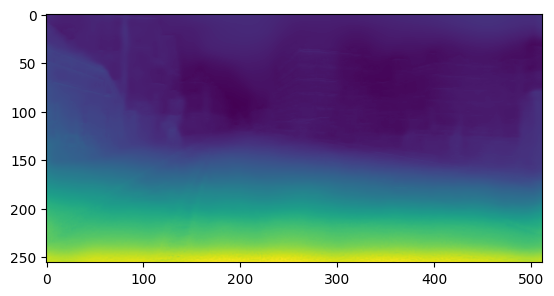

In [35]:
plt.imshow(disp.cpu().numpy().transpose(1,2,0))

In [16]:
torch.load('/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/depth_rgb/1418132439921278_augment.pt', map_location=torch.device('cuda'))

tensor([[[0.0763, 0.0749, 0.0782,  ..., 0.2573, 0.2588, 0.2616],
         [0.0759, 0.0747, 0.0776,  ..., 0.2544, 0.2563, 0.2592],
         [0.0769, 0.0755, 0.0768,  ..., 0.2558, 0.2571, 0.2594],
         ...,
         [0.6551, 0.6559, 0.6583,  ..., 0.6153, 0.6162, 0.6177],
         [0.6514, 0.6472, 0.6497,  ..., 0.6144, 0.6140, 0.6153],
         [0.6517, 0.6474, 0.6495,  ..., 0.6254, 0.6238, 0.6251]]],
       device='cuda:0')

# Test load images

In [7]:
import time
import cv2
from PIL import Image
import imageio

def load_with_opencv(image_path):
    return cv2.imread(image_path)

def load_with_pillow(image_path):
    return Image.open(image_path)

def load_with_imageio(image_path):
    return imageio.imread(image_path)

image_path = "/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262433909.png"
image_path2 = "/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262308920.png"
image_path3 = "/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262246448.png"

# Measure loading time for OpenCV
start_time = time.time()
for i in range(30):
    opencv_image = cv2.imread(image_path)
opencv_loading_time = time.time() - start_time

# Measure loading time for Pillow
start_time = time.time()
for i in range(30):
    pillow_image = load_with_pillow(image_path)
    pillow_image = np.array(pillow_image)
pillow_loading_time = time.time() - start_time

# # Measure loading time for imageio
# start_time = time.time()
# for i in range(200):
#     imageio_image = load_with_imageio(image_path)
# imageio_loading_time = time.time() - start_time

print(f"OpenCV Loading Time: {opencv_loading_time:.4f} seconds")
print(f"Pillow Loading Time: {pillow_loading_time:.4f} seconds")
# print(f"imageio Loading Time: {imageio_loading_time:.4f} seconds")


OpenCV Loading Time: 0.6091 seconds
Pillow Loading Time: 0.6407 seconds


In [10]:
import cv2
import time

image_paths = [image_path, image_path2, image_path3]
target_width = 800
target_height = 600

loaded_images = []

# Measure loading and resizing time using a for loop
start_time = time.time()
for i in range(100):
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
    #             resized_image = cv2.resize(image, (target_width, target_height))
            loaded_images.append(image)
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time
print(f"Total time taken: {total_time:.4f} seconds")


Total time taken: 6.3287 seconds


In [70]:
image_paths

['/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262433909.png',
 '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262308920.png',
 '/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418133262246448.png']

In [11]:
def load_image_concurrent(image_paths):
    def load_image(image_path):
        return cv2.imread(image_path)

    # Use parallel processing to load images
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_image, path) for path in image_paths]

        # Iterate over futures as they complete
        for future, image_path in zip(concurrent.futures.as_completed(futures), image_paths):
            image = future.result()
            if image is not None:
                loaded_images.append(image)
    return loaded_images


In [13]:
import concurrent.futures

image_paths = [image_path, image_path2, image_path3]

# Resize images to a smaller resolution if needed
target_width = 800
target_height = 600

# Use parallel processing to load images
loaded_images = []

start_time = time.time()
for i in range(100):
    load_image_concurrent(image_paths)
                
end_time = time.time()           
# Calculate the total time taken
total_time = end_time - start_time
print(f"Total time taken: {total_time:.4f} seconds")

Total time taken: 2.1537 seconds


In [14]:
loaded_images_concur = load_image_concurrent(image_paths)

In [81]:
loaded_images[0] - loaded_images_concur[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [75]:
loaded_images_concur[0]

TypeError: 'NoneType' object is not subscriptable

In [78]:
loaded_images_concur